In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

from scipy import stats

seed = 42
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [5]:
#pd.set_option("display.max_columns",3754)
car=pd.read_csv("C:/Users/JUNIOR/Favorites/Links/new/jUPYTER/projjjjjjjjjject/real word projects/Mine/CarPrice_Assignment.csv")
car.head()
car11=car.copy()


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

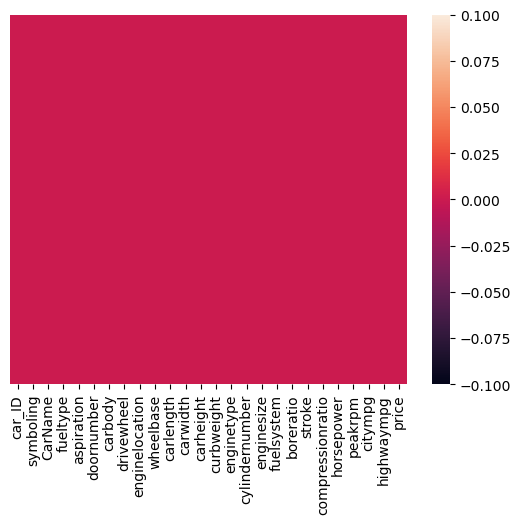

In [7]:
#CHECKING THE NUMBER OF NULL VALUES 
sns.heatmap(car.isnull(),cbar=True,xticklabels=True,yticklabels=False)
#IT LOOKS LIKE THERE ARE NO NULLL VALUES

In [8]:
car["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
car["symboling"]=car["symboling"].replace({
    -2:"very safe",
    -1:"safe",
    0:"fairly safe",
    1:"fairly risky",
    2:"risky",
    3:"very risky"
    
})

car.head()

car_ID     symboling                   CarName fueltype aspiration  \
0       1    very risky        alfa-romero giulia      gas        std   
1       2    very risky       alfa-romero stelvio      gas        std   
2       3  fairly risky  alfa-romero Quadrifoglio      gas        std   
3       4         risky               audi 100 ls      gas        std   
4       5         risky                audi 100ls      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0        two  convertible        rwd          front       88.6  ...   
1        two  convertible        rwd          front       88.6  ...   
2        two    hatchback        rwd          front       94.5  ...   
3       four        sedan        fwd          front       99.8  ...   
4       four        sedan        4wd          front       99.4  ...   

   enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0         130        mpfi       3.47    2.68              9.0        111   
1         130        mpfi       3.47    2.68              9.0        111   
2         152        mpfi       2.68    3.47              9.0        154   
3         109        mpfi       3.19    3.40             10.0        102   
4         136        mpfi       3.19    3.40              8.0        115   

   peakrpm citympg  highwaympg    price  
0     5000      21          27  13495.0  
1     5000      21          27  16500.0  
2     5000      19          26  16500.0  
3     5500      24          30  13950.0  
4     5500      18          22  17450.0  

[5 rows x 26 columns]

In [10]:
car["CarName"].nunique()

147

In [11]:
def change_names(x):
    if "Nissan" in x or "nissan" in x:
        a=x.replace("nissan","Nissan")
        return a
    elif "mazda" in x or "maxda" in x:
        a=x.replace("maxda","mazda")
        return a
    elif "porsche" in x or "porcshce" in x:
        a=x.replace("porcshce","porsche")
        return a
    elif "toyota" in x or "toyouta" in x:
        a=x.replace("toyouta","toyota")
        return a
    elif "vokswagen" in x or "volkswagen" in x:
        a=x.replace("vokswagen","volkswagen")
        return a
    elif "vw" in x:
        a=x.replace("vw","volkswagen")
        return a
    else:
        return x
        
car["CarName"]=car["CarName"].apply(change_names)
car.head()

car_ID     symboling                   CarName fueltype aspiration  \
0       1    very risky        alfa-romero giulia      gas        std   
1       2    very risky       alfa-romero stelvio      gas        std   
2       3  fairly risky  alfa-romero Quadrifoglio      gas        std   
3       4         risky               audi 100 ls      gas        std   
4       5         risky                audi 100ls      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0        two  convertible        rwd          front       88.6  ...   
1        two  convertible        rwd          front       88.6  ...   
2        two    hatchback        rwd          front       94.5  ...   
3       four        sedan        fwd          front       99.8  ...   
4       four        sedan        4wd          front       99.4  ...   

   enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0         130        mpfi       3.47    2.68              9.0        111   
1         130        mpfi       3.47    2.68              9.0        111   
2         152        mpfi       2.68    3.47              9.0        154   
3         109        mpfi       3.19    3.40             10.0        102   
4         136        mpfi       3.19    3.40              8.0        115   

   peakrpm citympg  highwaympg    price  
0     5000      21          27  13495.0  
1     5000      21          27  16500.0  
2     5000      19          26  16500.0  
3     5500      24          30  13950.0  
4     5500      18          22  17450.0  

[5 rows x 26 columns]

In [12]:
car.select_dtypes(include="object").head()

symboling                   CarName fueltype aspiration doornumber  \
0    very risky        alfa-romero giulia      gas        std        two   
1    very risky       alfa-romero stelvio      gas        std        two   
2  fairly risky  alfa-romero Quadrifoglio      gas        std        two   
3         risky               audi 100 ls      gas        std       four   
4         risky                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation enginetype cylindernumber fuelsystem  
0  convertible        rwd          front       dohc           four       mpfi  
1  convertible        rwd          front       dohc           four       mpfi  
2    hatchback        rwd          front       ohcv            six       mpfi  
3        sedan        fwd          front        ohc           four       mpfi  
4        sedan        4wd          front        ohc           five       mpfi

In [13]:
car.select_dtypes(include=["int","float"]).head()

car_ID  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       1       88.6      168.8      64.1       48.8        2548         130   
1       2       88.6      168.8      64.1       48.8        2548         130   
2       3       94.5      171.2      65.5       52.4        2823         152   
3       4       99.8      176.6      66.2       54.3        2337         109   
4       5       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [14]:
car.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
#THIS CODE SHOWS THAT THERE ARE NO MISSING VALUES

Total No. of Missing Values
car_ID                                      0
symboling                                   0
CarName                                     0
fueltype                                    0
aspiration                                  0
doornumber                                  0
carbody                                     0
drivewheel                                  0
enginelocation                              0
wheelbase                                   0
carlength                                   0
carwidth                                    0
carheight                                   0
curbweight                                  0
enginetype                                  0
cylindernumber                              0
enginesize                                  0
fuelsystem                                  0
boreratio                                   0
stroke                                      0
compressionratio                            0
horsepower                                  0
peakrpm                                     0
citympg                                     0
highwaympg                                  0
price                                       0

In [15]:
car["CarName"].nunique()

142

In [16]:
car["CarType"]=car["CarName"].apply(lambda x:x.split(" ")[0])
#car["CarType"].value_counts()

In [17]:
car["drivewheel"]=car["drivewheel"].replace({
    "fwd":"front wheel drive",
    "rwd":"rear wheel drive",
    "4wd":"4 wheel drive"
})
car.head()

car_ID     symboling                   CarName fueltype aspiration  \
0       1    very risky        alfa-romero giulia      gas        std   
1       2    very risky       alfa-romero stelvio      gas        std   
2       3  fairly risky  alfa-romero Quadrifoglio      gas        std   
3       4         risky               audi 100 ls      gas        std   
4       5         risky                audi 100ls      gas        std   

  doornumber      carbody         drivewheel enginelocation  wheelbase  ...  \
0        two  convertible   rear wheel drive          front       88.6  ...   
1        two  convertible   rear wheel drive          front       88.6  ...   
2        two    hatchback   rear wheel drive          front       94.5  ...   
3       four        sedan  front wheel drive          front       99.8  ...   
4       four        sedan      4 wheel drive          front       99.4  ...   

   fuelsystem  boreratio  stroke  compressionratio horsepower peakrpm  \
0        mpfi       3.47    2.68               9.0        111    5000   
1        mpfi       3.47    2.68               9.0        111    5000   
2        mpfi       2.68    3.47               9.0        154    5000   
3        mpfi       3.19    3.40              10.0        102    5500   
4        mpfi       3.19    3.40               8.0        115    5500   

   citympg highwaympg    price      CarType  
0       21         27  13495.0  alfa-romero  
1       21         27  16500.0  alfa-romero  
2       19         26  16500.0  alfa-romero  
3       24         30  13950.0         audi  
4       18         22  17450.0         audi  

[5 rows x 27 columns]

In [18]:
car["enginetype"]=car["enginetype"].replace({
    "ohc":"overhead camshaft",
    "ohcf":"OverHead Cam and Valve F engine",
    "ohcv":"OverHead Cam and Valve",
    "dohc":"Dual OverHead Cam",
    "dohcv":"Dual OverHead Cam and Valve",
    "l":"L engine",
    "rotor":"Rotary engine"
})
#car.head()

In [19]:
car["fuelsystem"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [20]:

car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarType'],
      dtype='object')

In [21]:
car.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'mazda rx3', 'mazda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4',
       'mazda glc custo

In [22]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarType'],
      dtype='object')

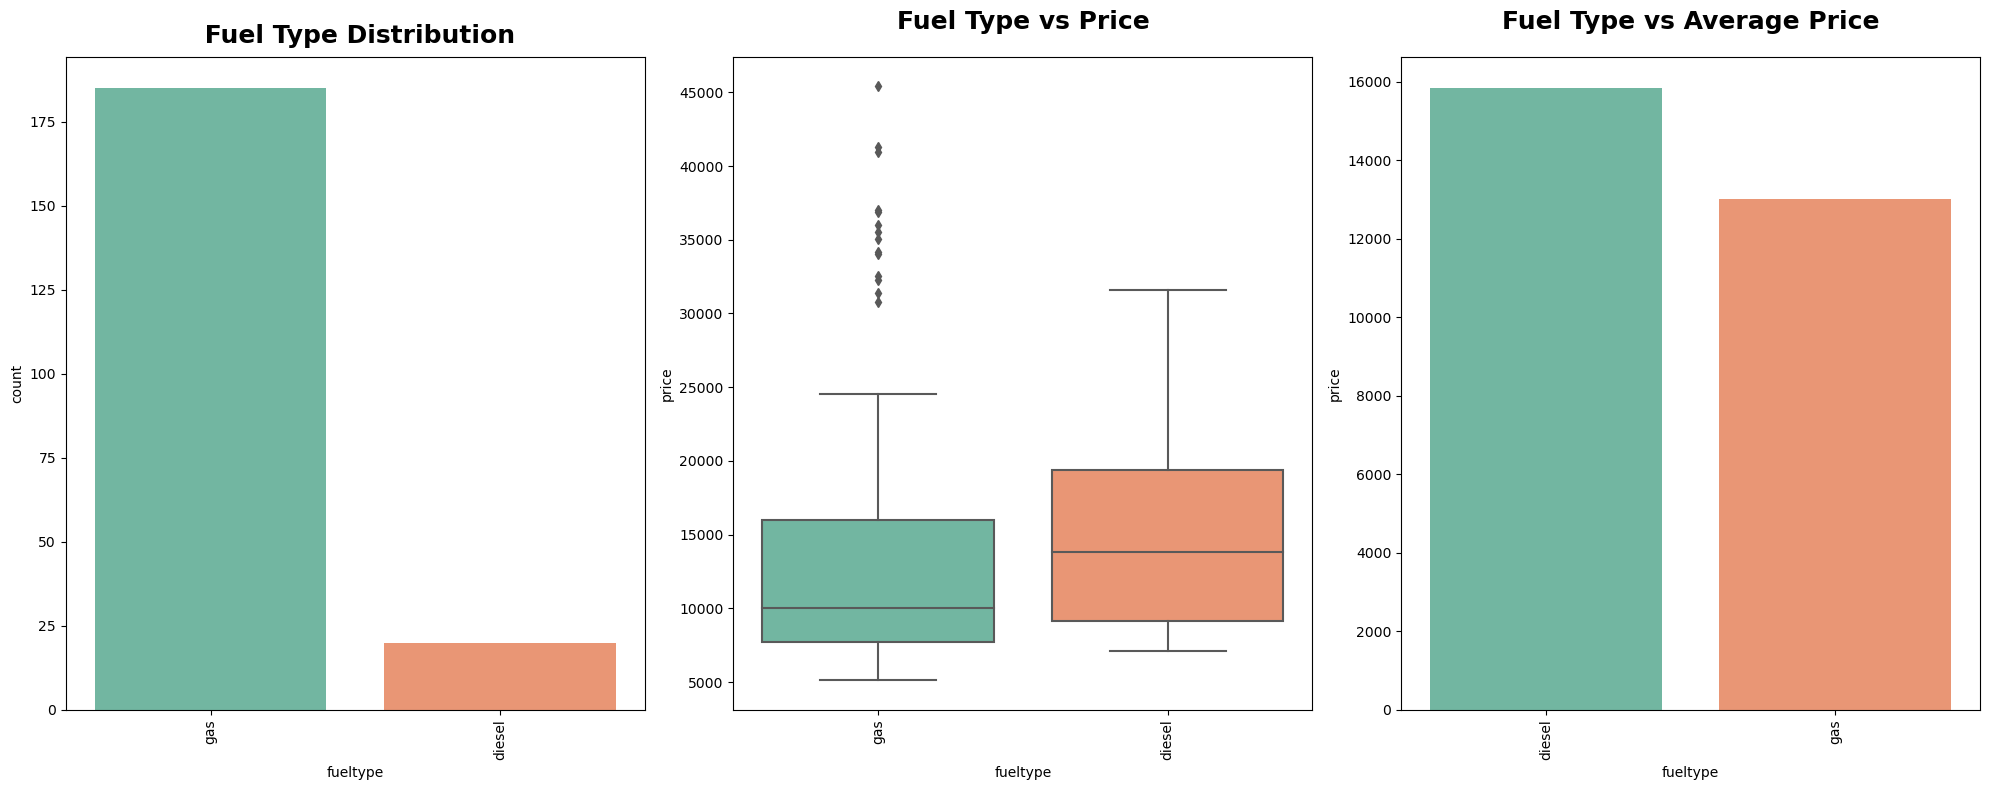

In [23]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=car,palette="Set2",order=car[cols].value_counts().index)
    plt.title(f" Fuel Type Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=car,palette="Set2")
    plt.title(f"Fuel Type vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(car.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"Fuel Type vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fueltype")

The below visualization shows that  a lot of vehicles use Gas as their Fuel type ,but comparatively, Diesel cost higher

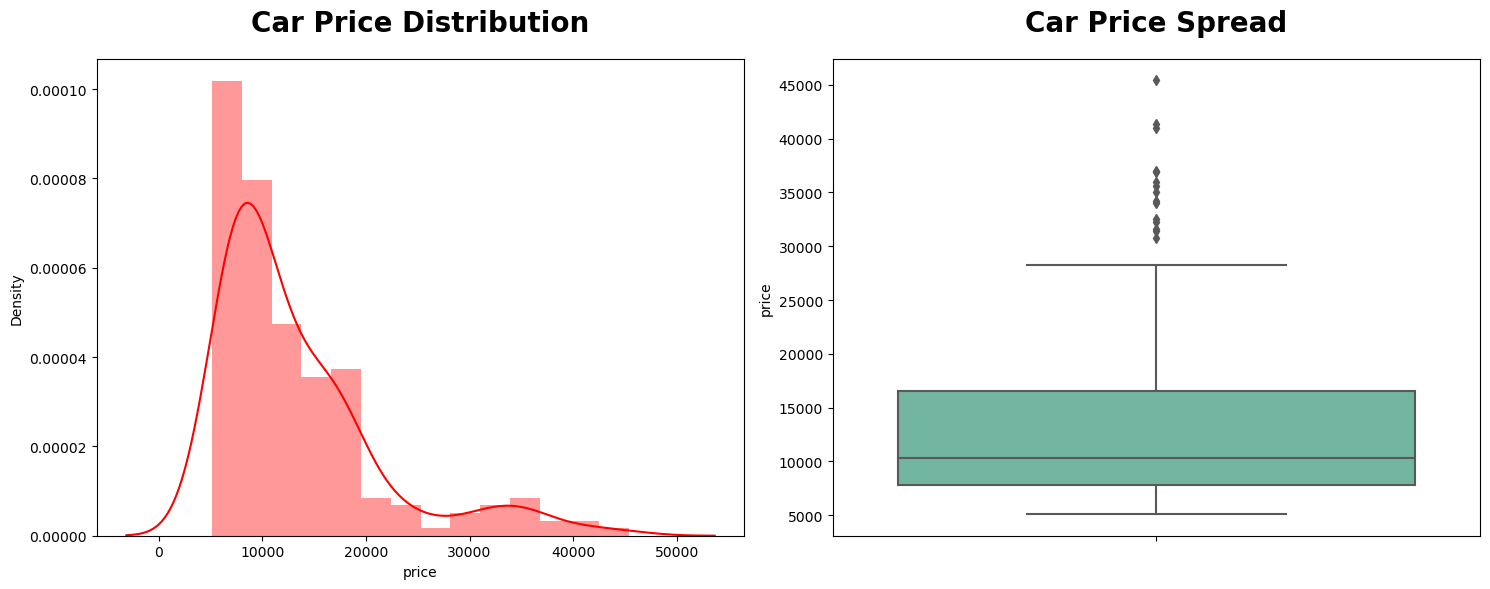

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(car["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=car["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

The below visualization shows that the median price of a car is around 10k

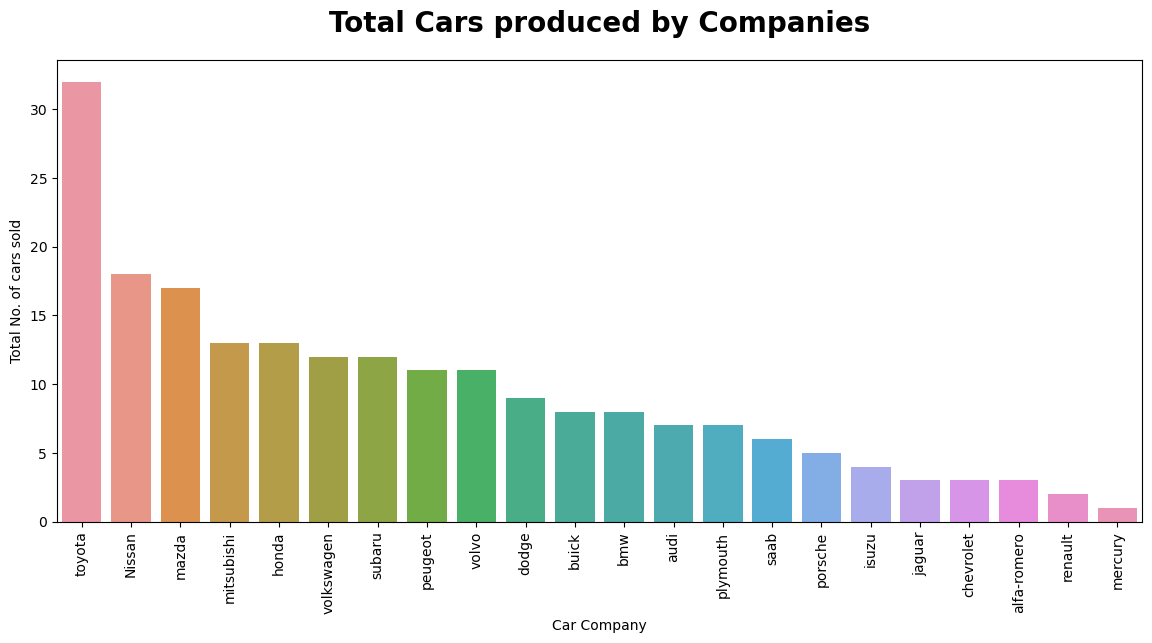

In [25]:

plt.figure(figsize=(14,6))
counts = car["CarType"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

The above visualization shows that most expesnive cars are usually Jaguar, Buick and Porsche

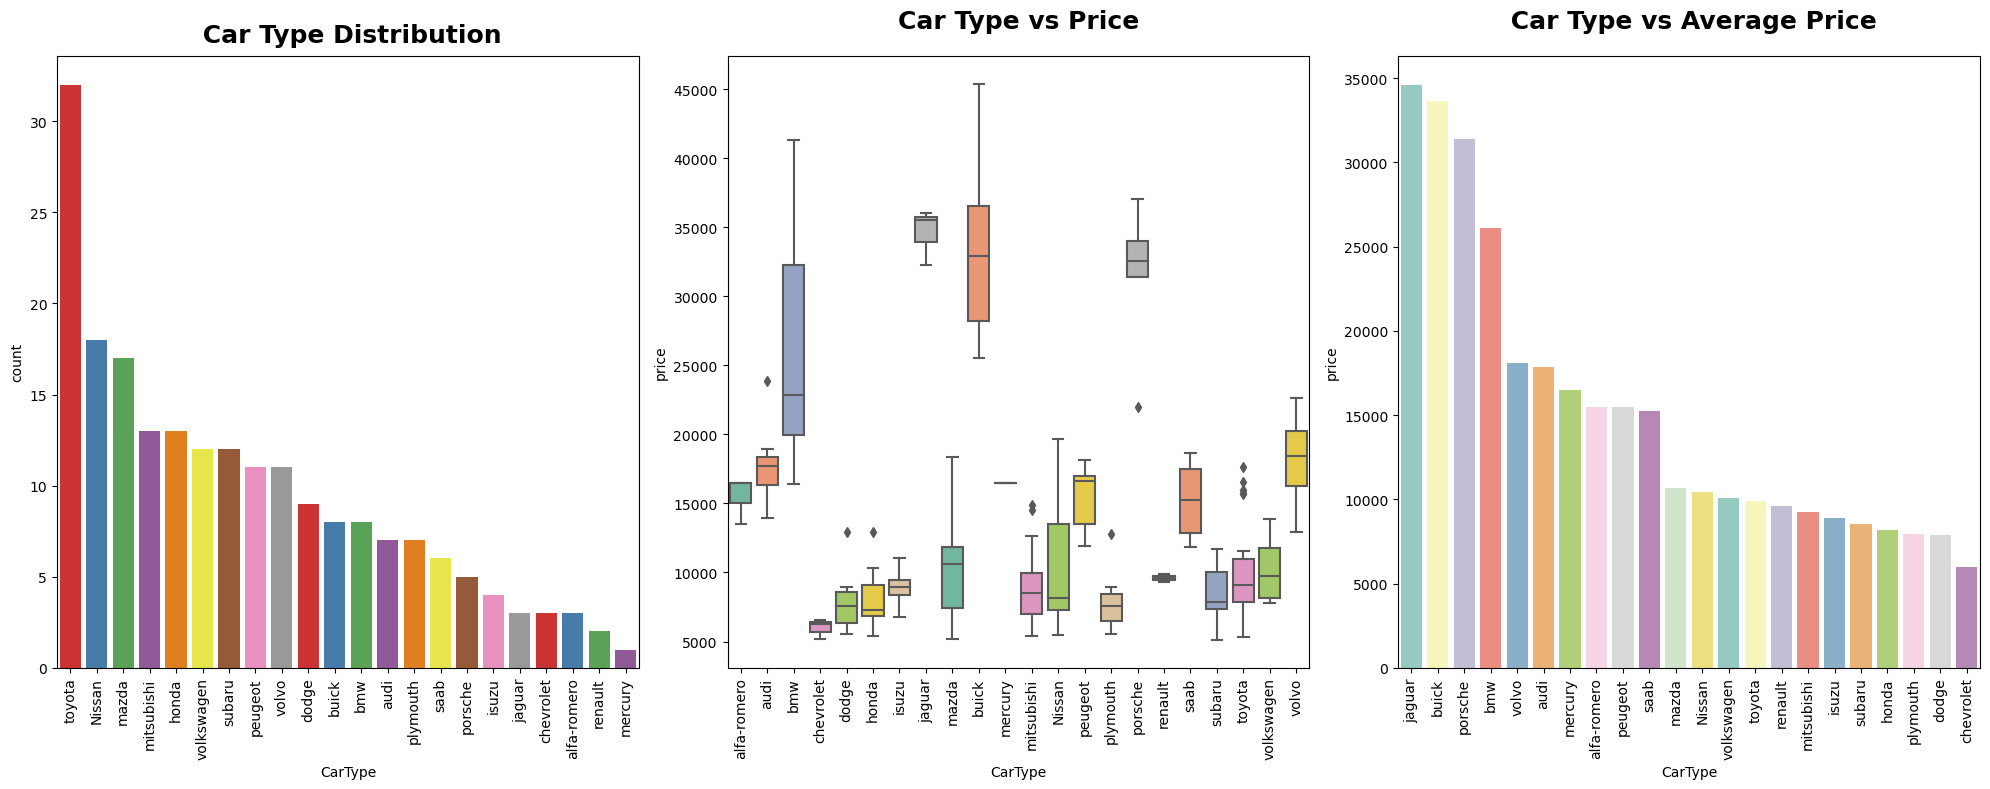

In [26]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=car,palette="Set1",order=car[cols].value_counts().index)
    plt.title(f" Car Type Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=car,palette="Set2")
    plt.title(f"Car Type vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.subplot(1,3,3)
    x=pd.DataFrame(car.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set3")
    plt.title(f" Car Type vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("CarType")
    
    

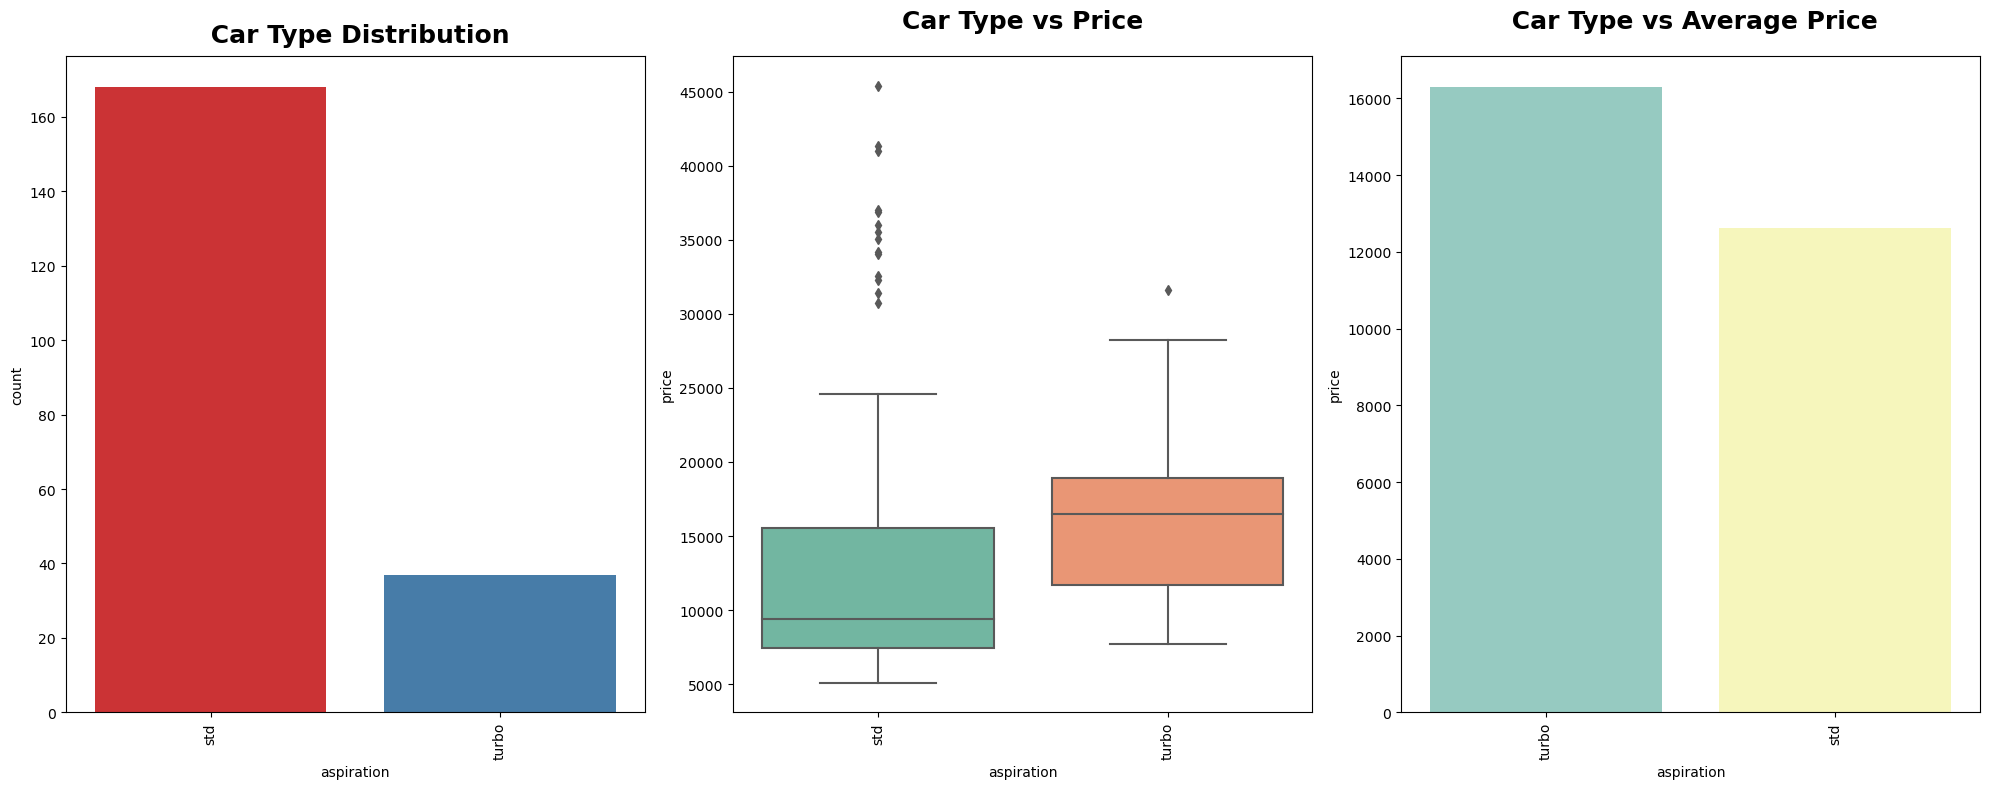

In [27]:
categorical_visualization("aspiration")

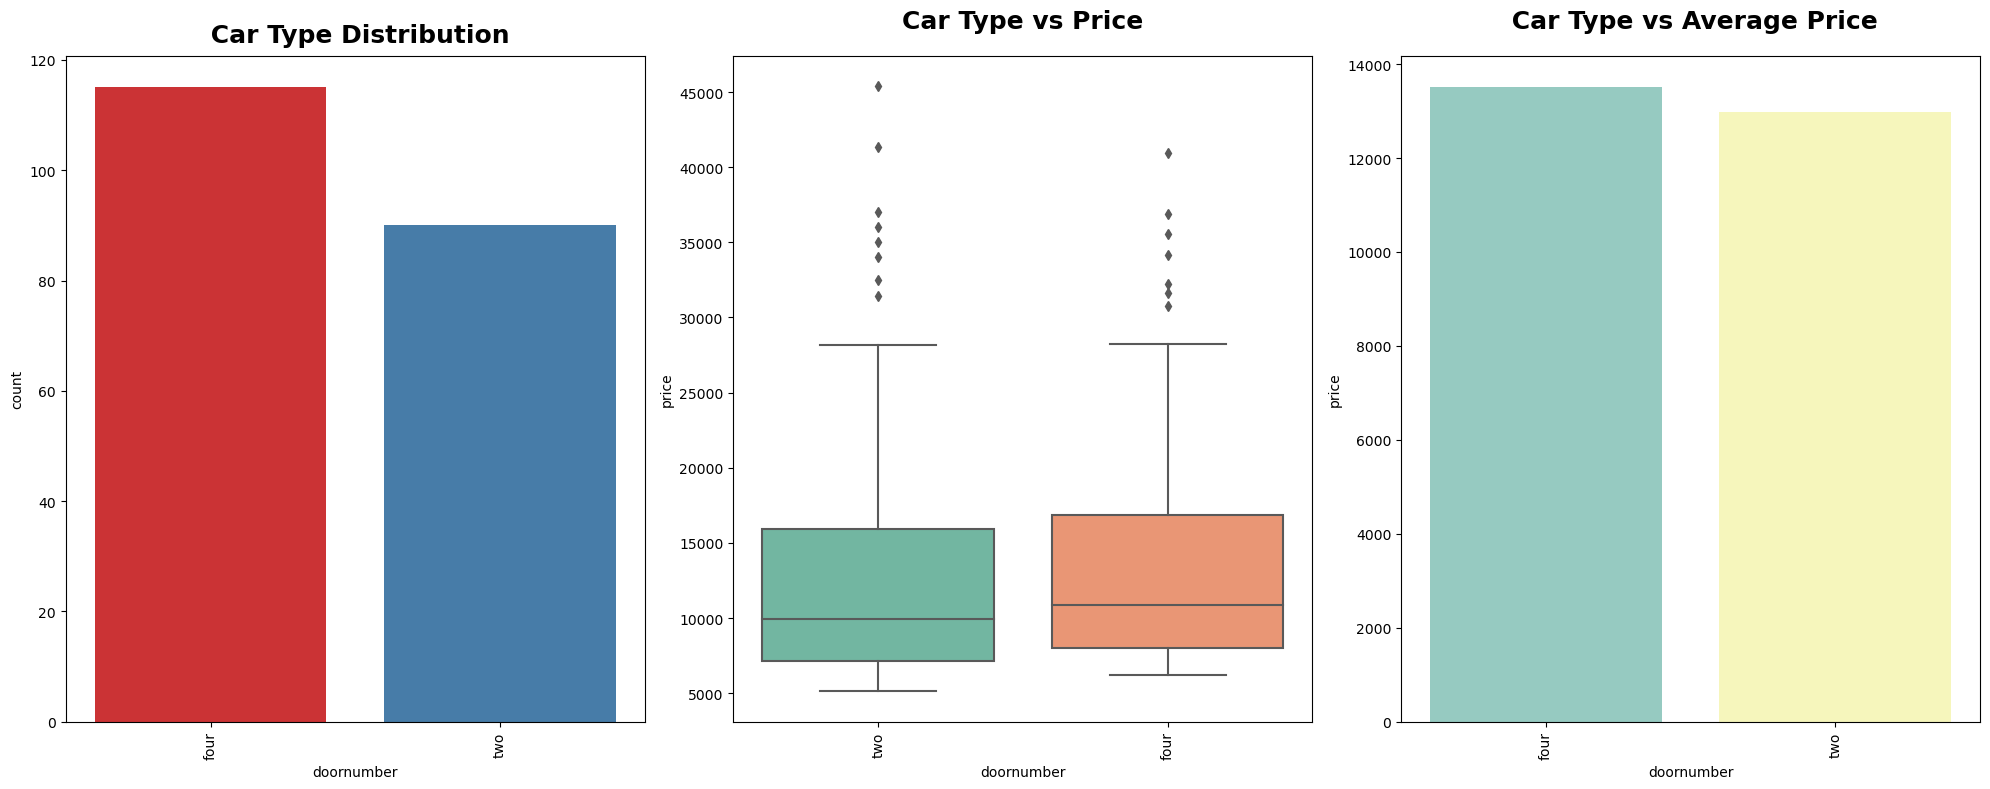

In [28]:
categorical_visualization("doornumber")

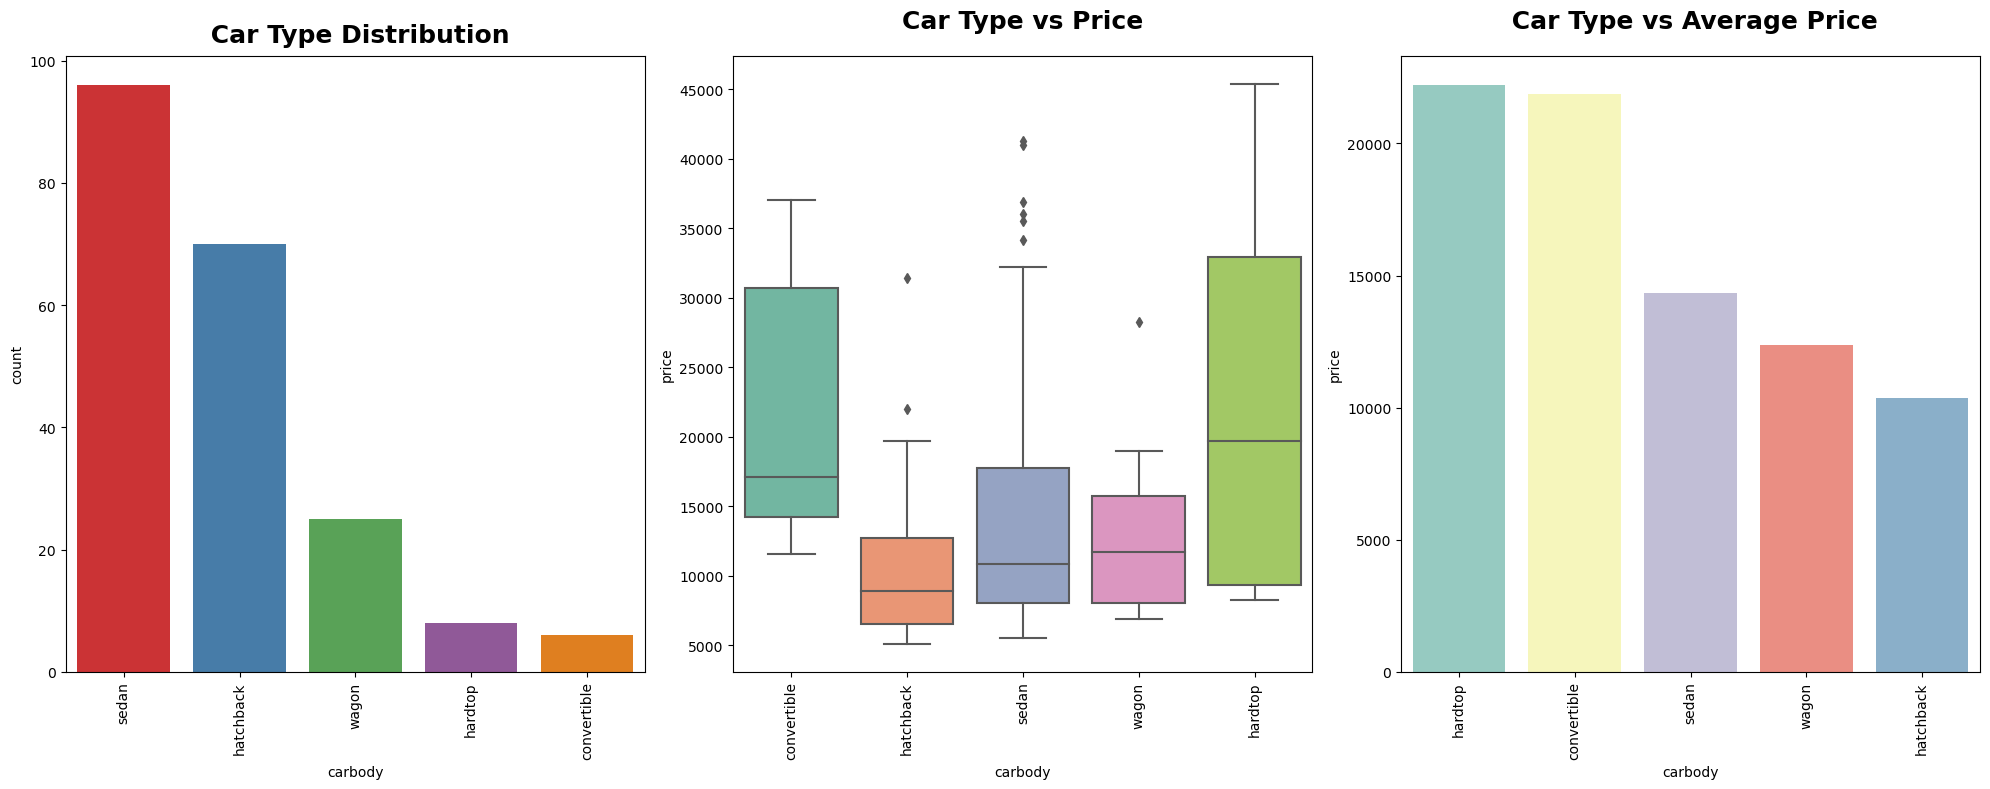

In [29]:
categorical_visualization("carbody")

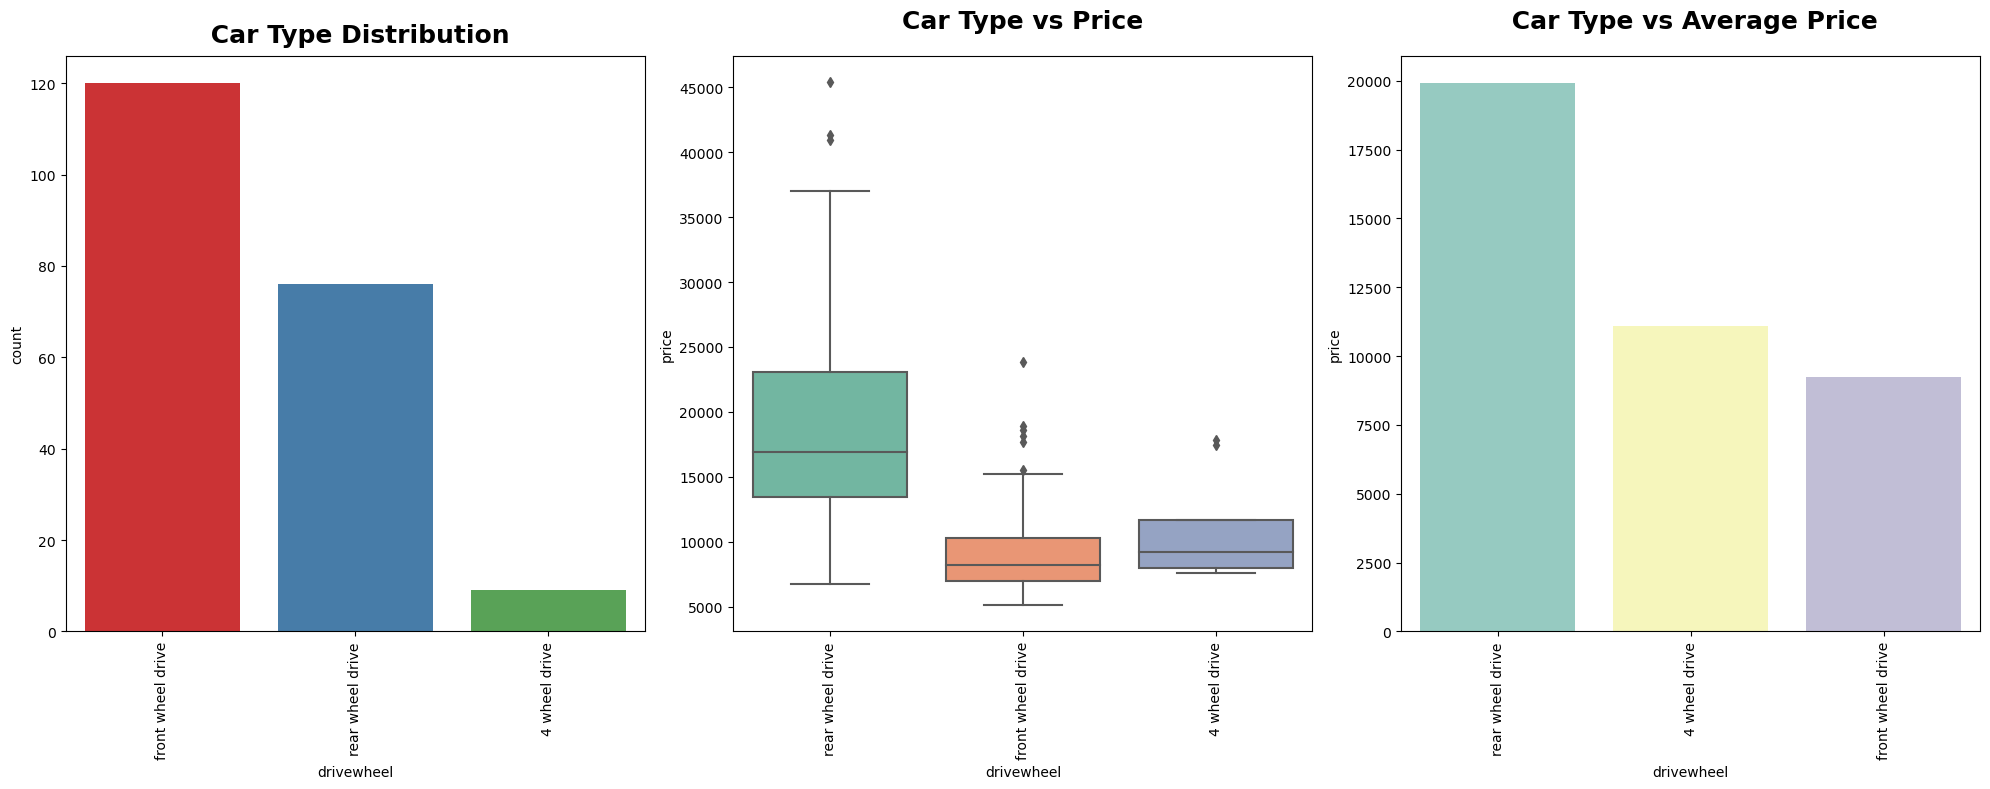

In [30]:
categorical_visualization("drivewheel")

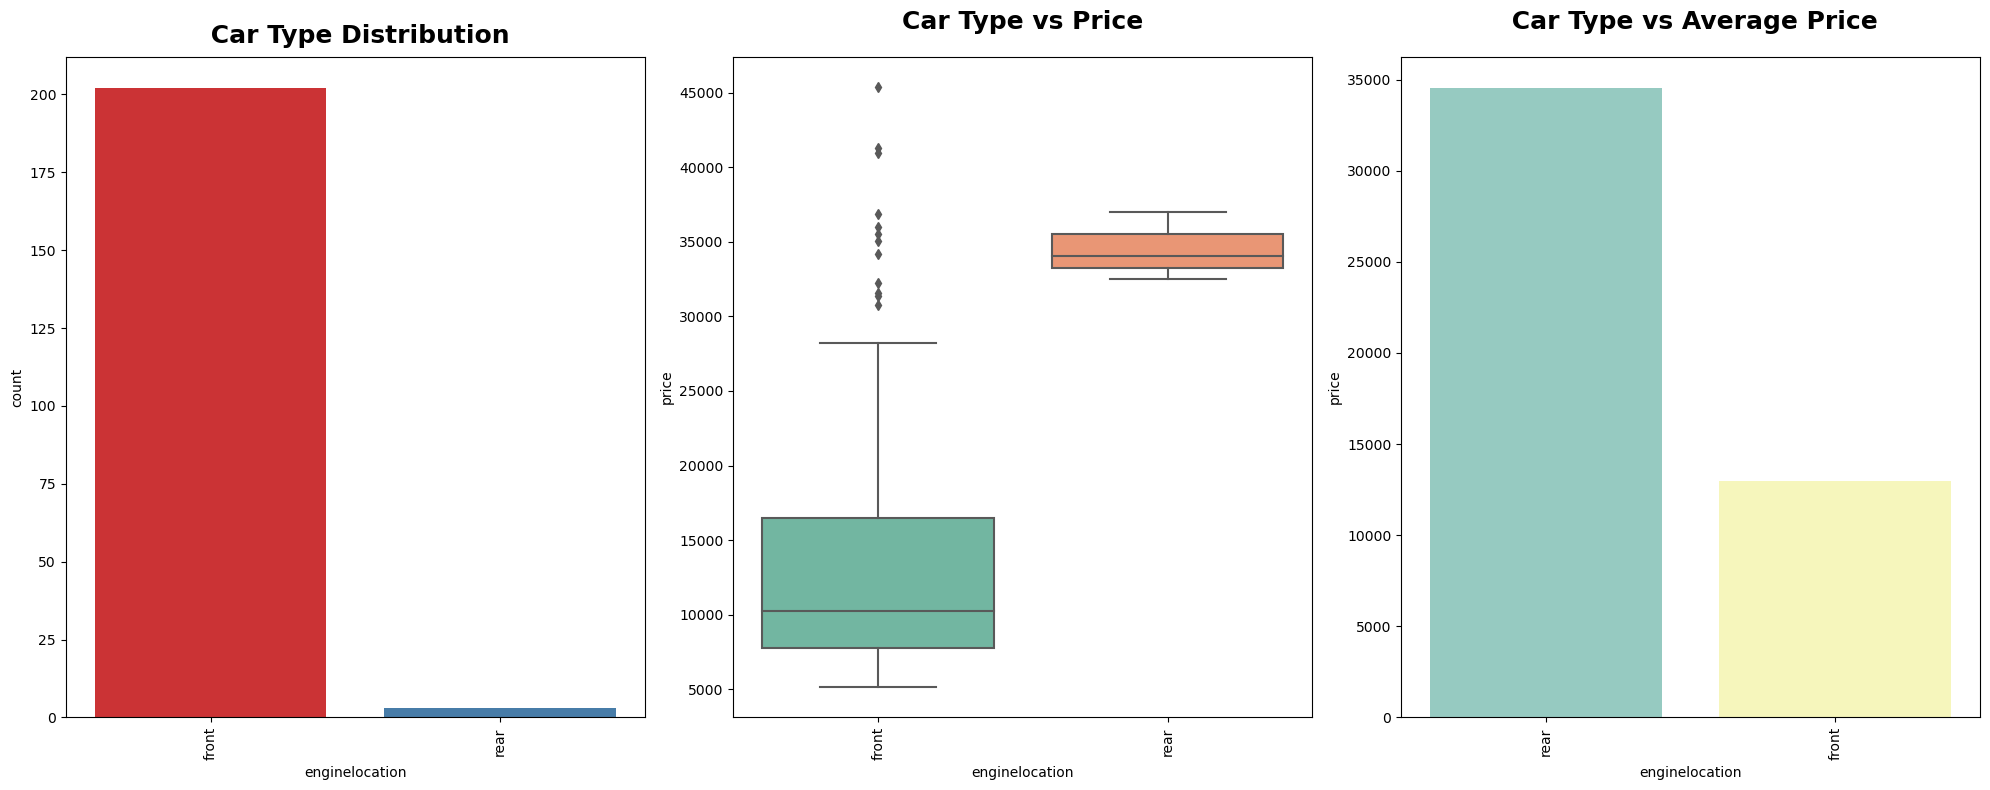

In [31]:
categorical_visualization("enginelocation")

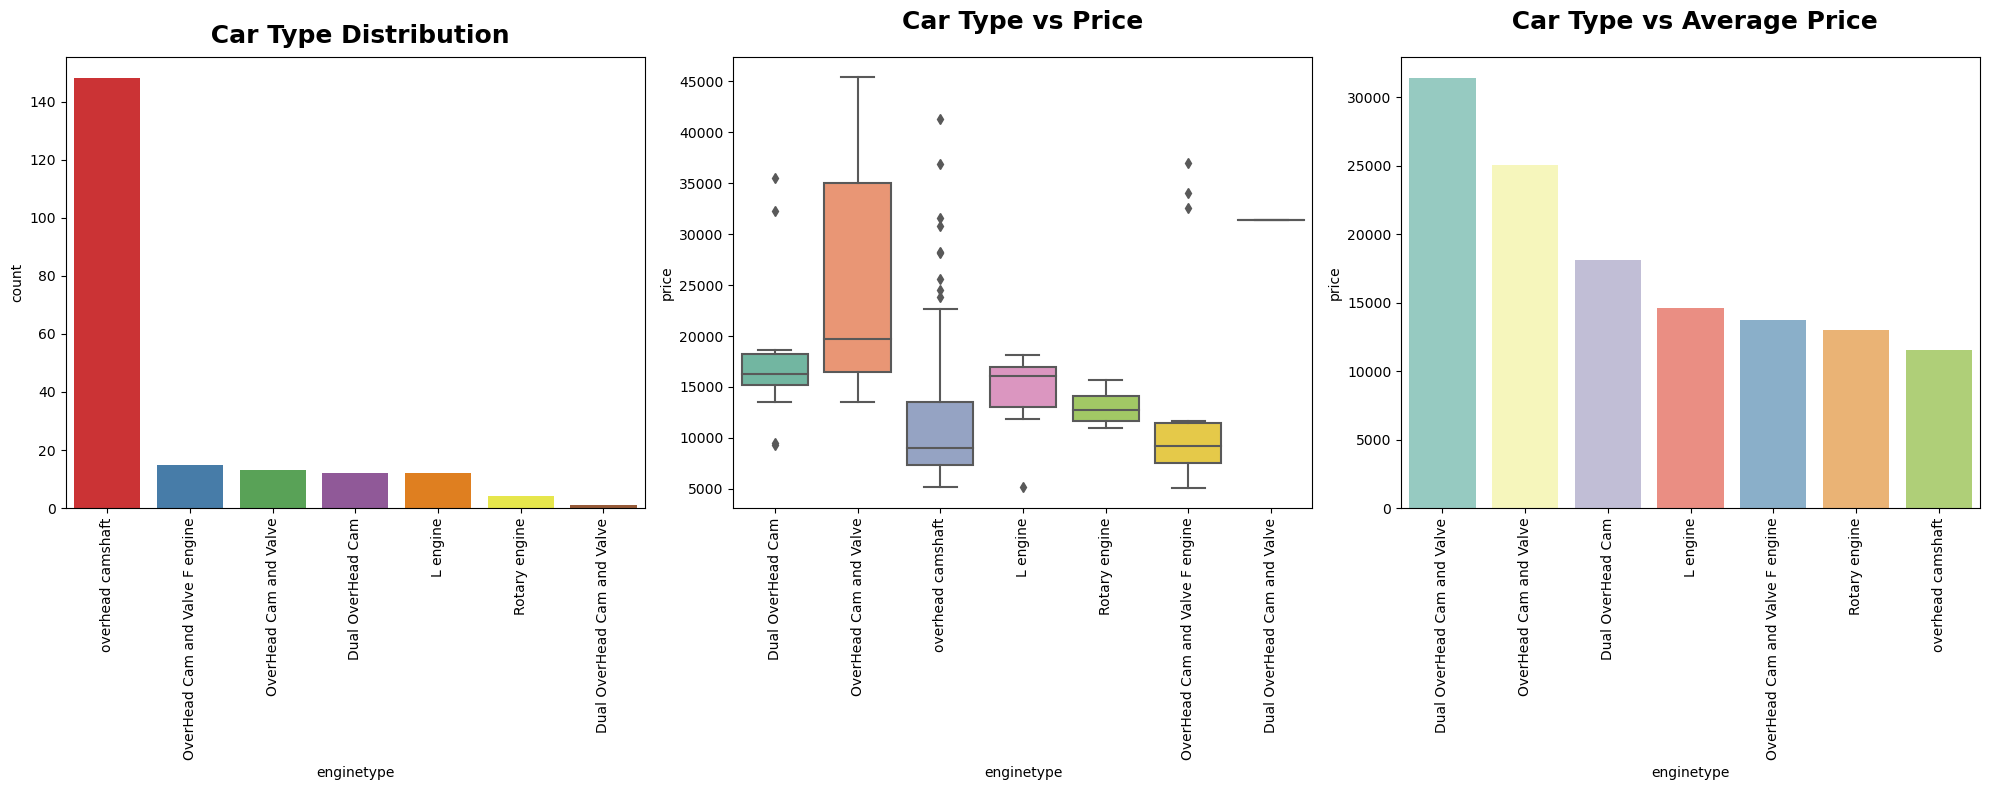

In [32]:
categorical_visualization("enginetype")

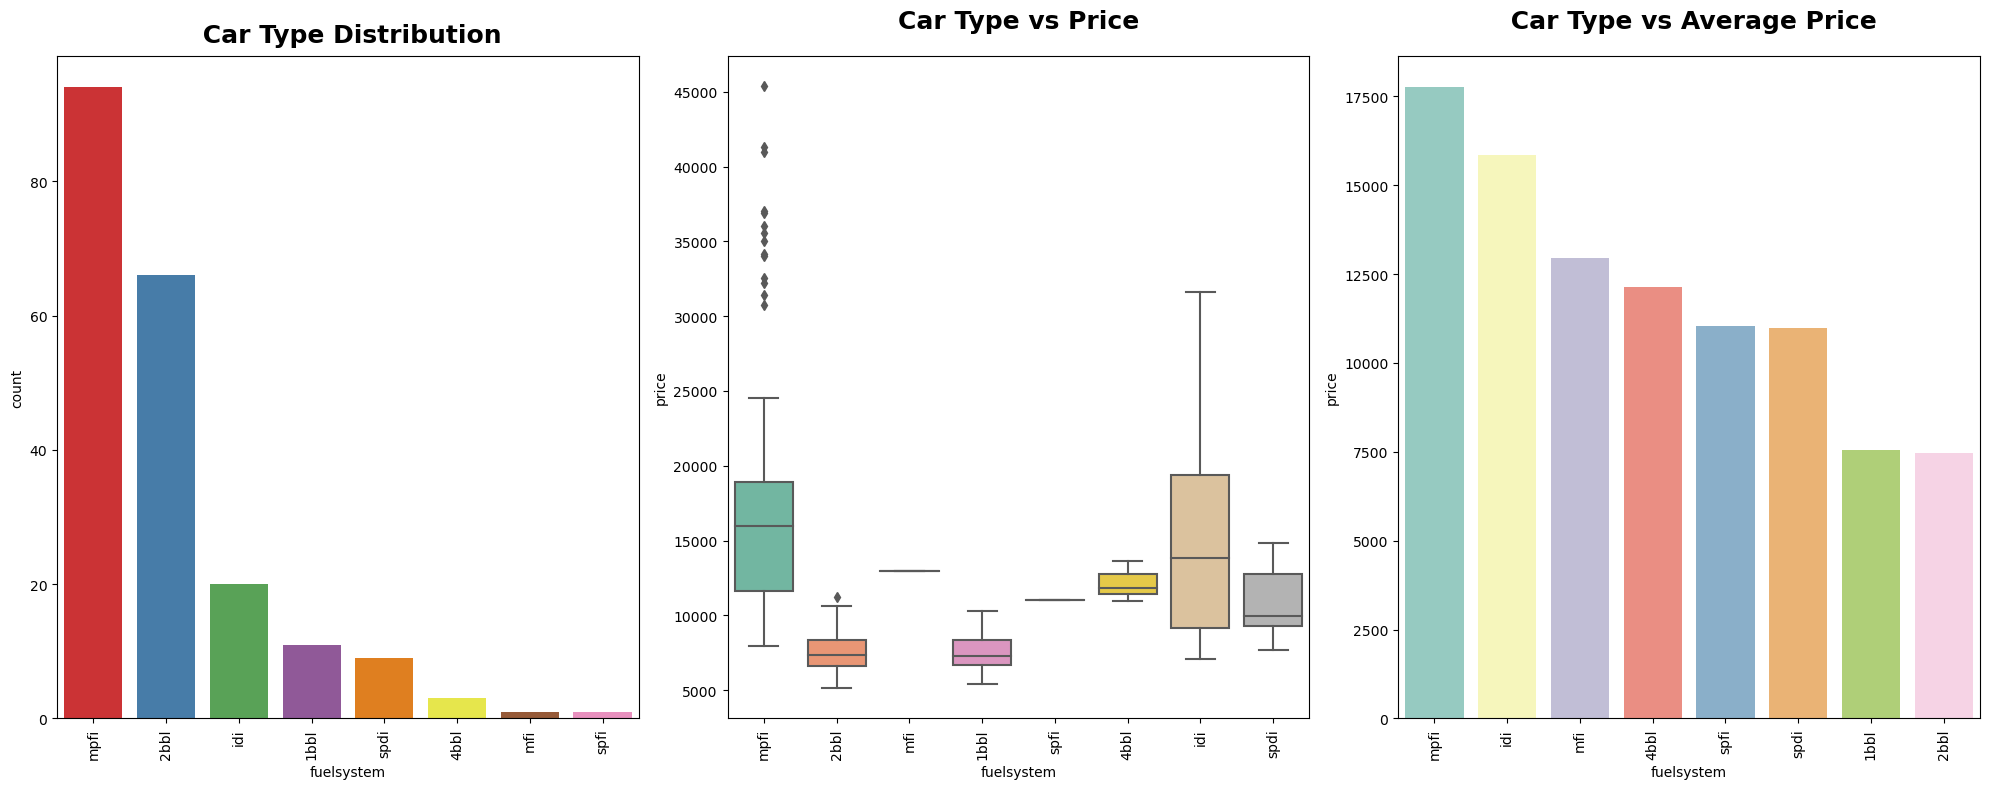

In [33]:
categorical_visualization("fuelsystem")

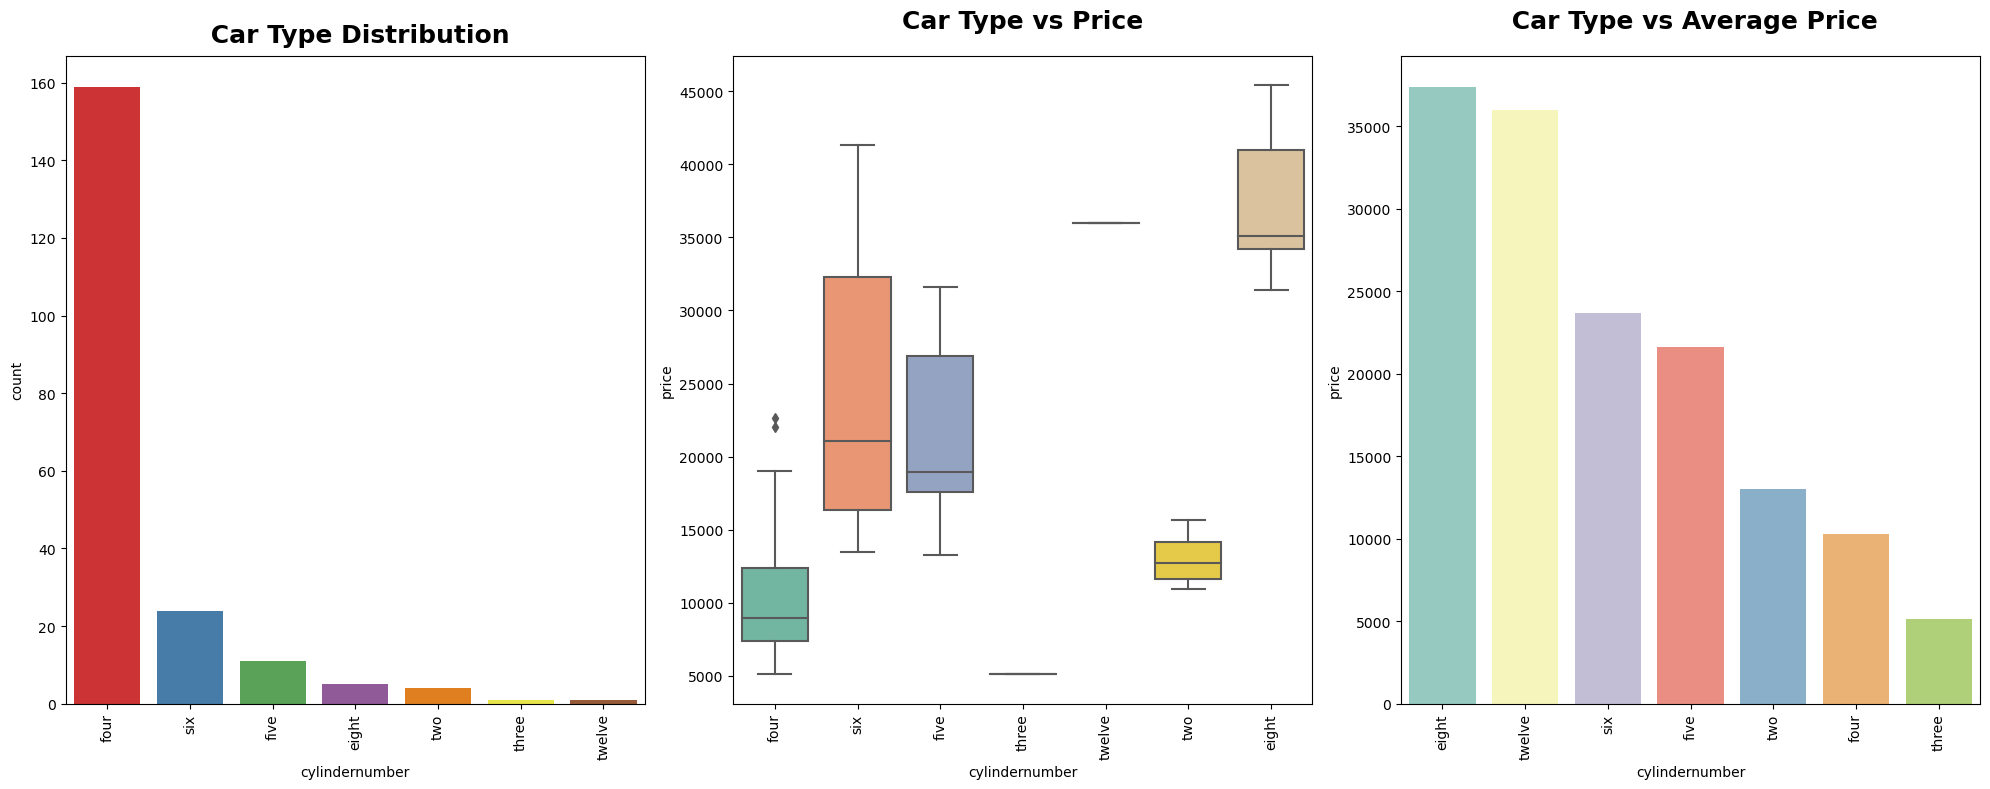

In [34]:
categorical_visualization("cylindernumber")

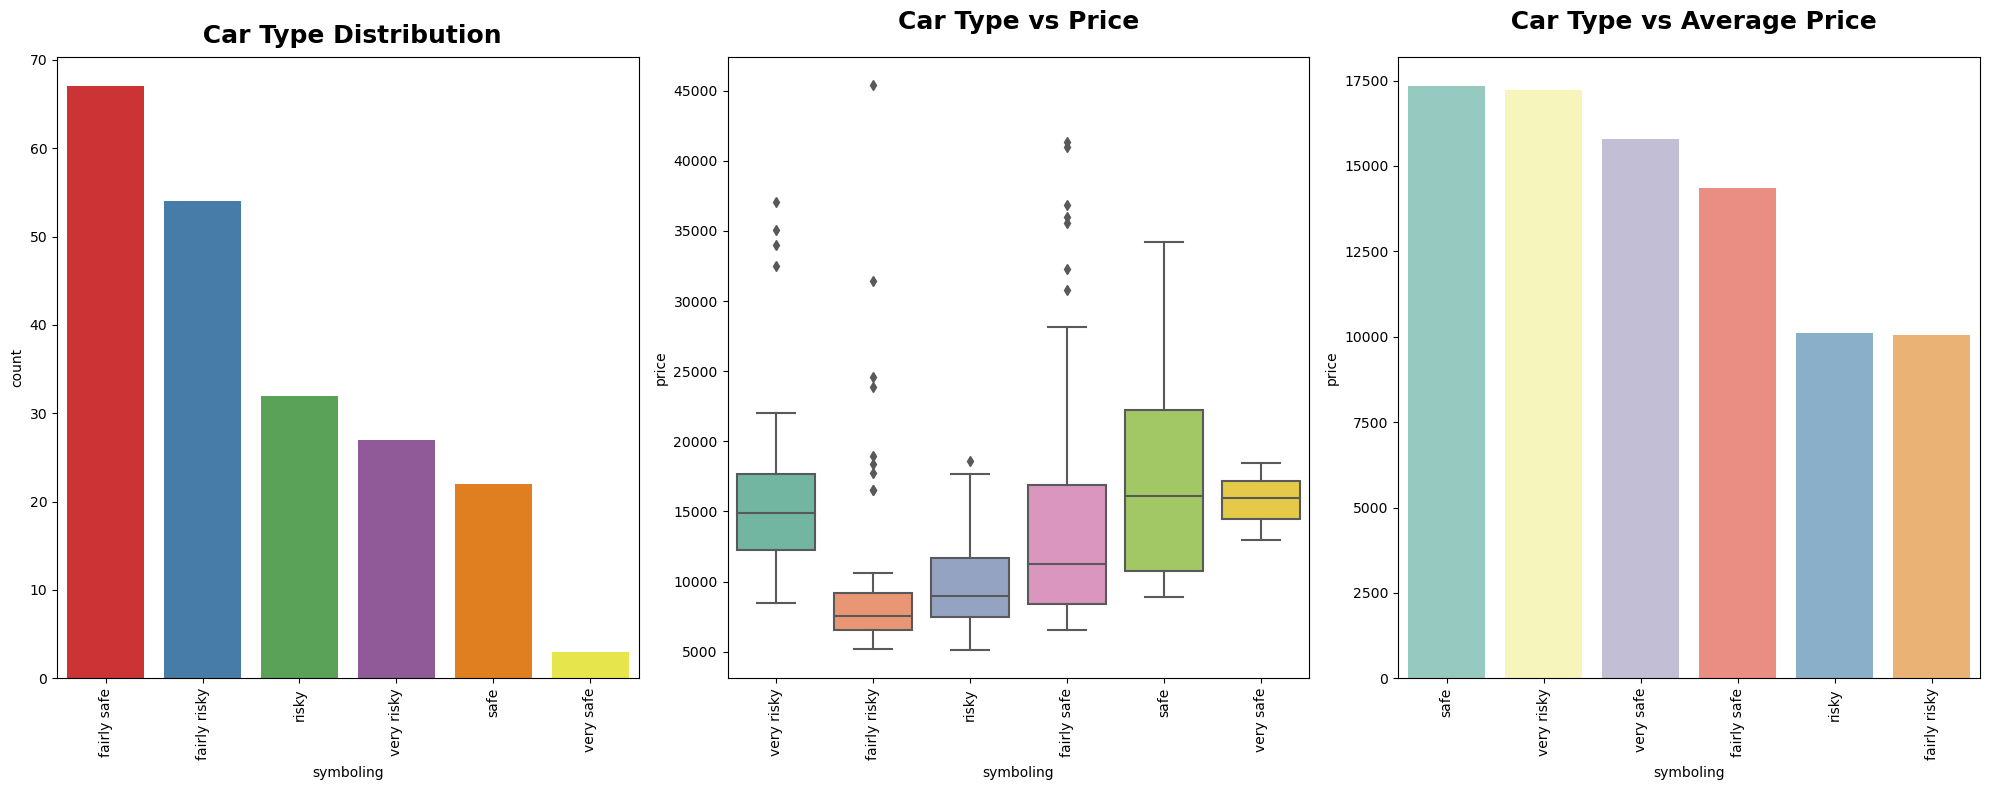

In [35]:
categorical_visualization("symboling")

In [36]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=car,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

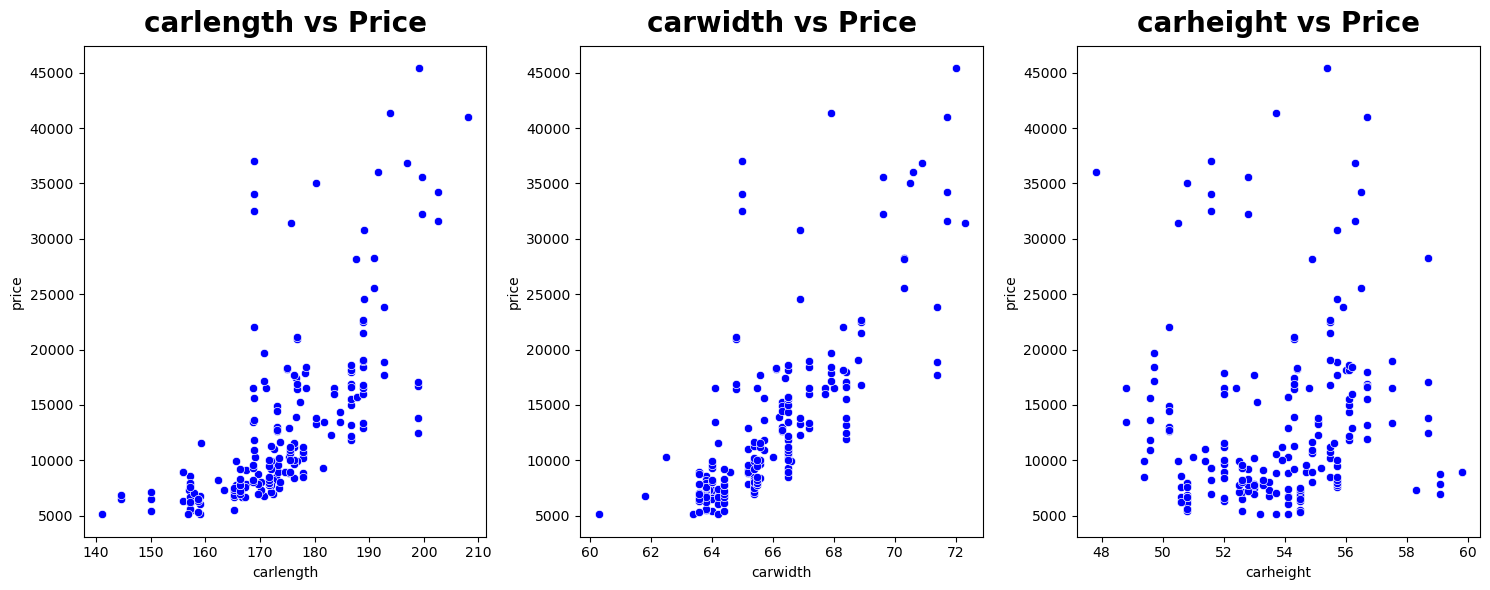

In [37]:
scatter_plot(["carlength","carwidth","carheight"])

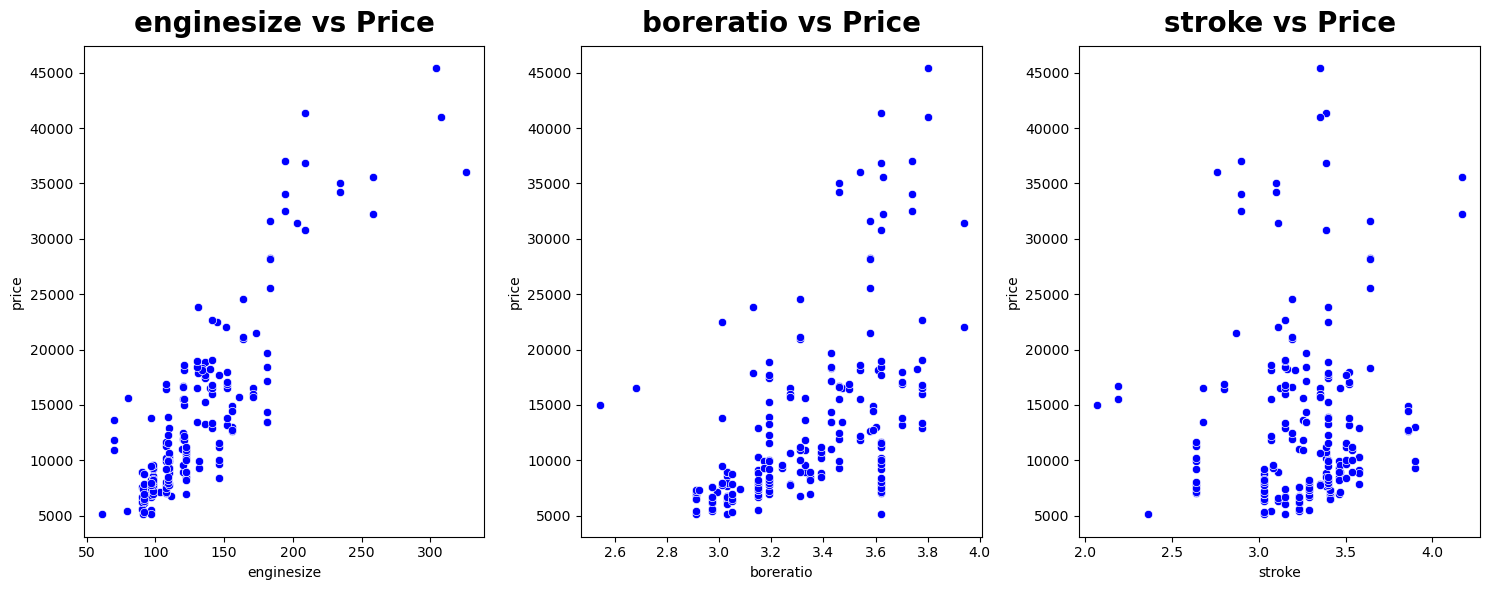

In [38]:
scatter_plot(["enginesize","boreratio","stroke"])

There is a fairly strong correlation between Enginesize and Price   

There is a weak correlation between Boreratio and Price

There is a very weak correlation between Stroke and Price

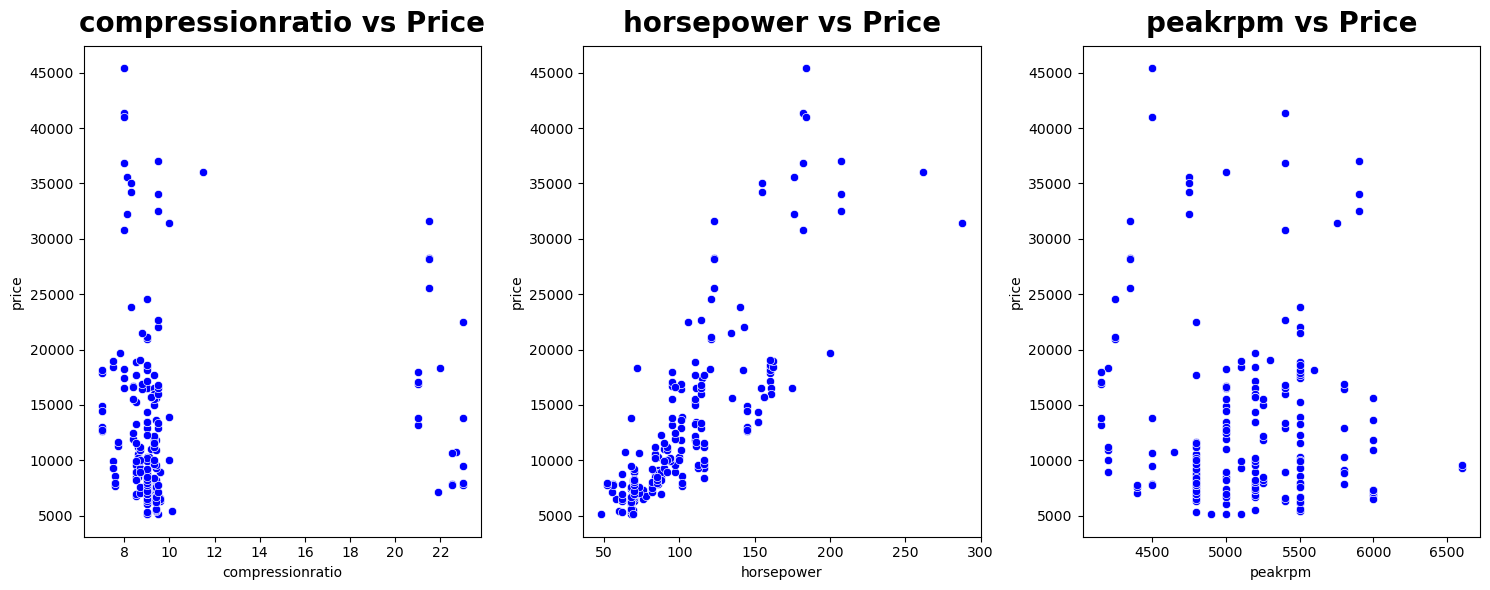

In [39]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

There is a no correlation between compressionratio and Price   

There is a fairly strong correlation between Horsepower and Price

There is no correlation between peakrpm and Price

In [40]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=car,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

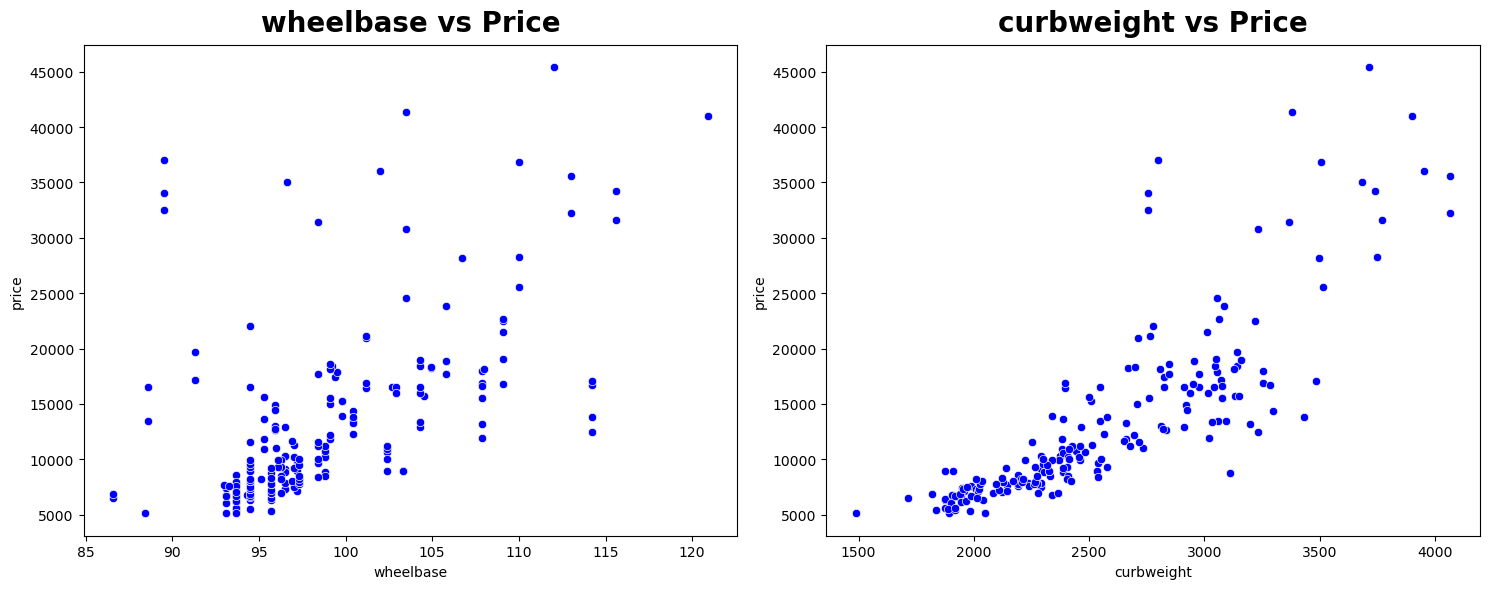

In [41]:
scatter_plot(["wheelbase","curbweight"])

There is a weak correlation  between Wheelbase and Price   

There is a strong correlation between Curbweight and Price



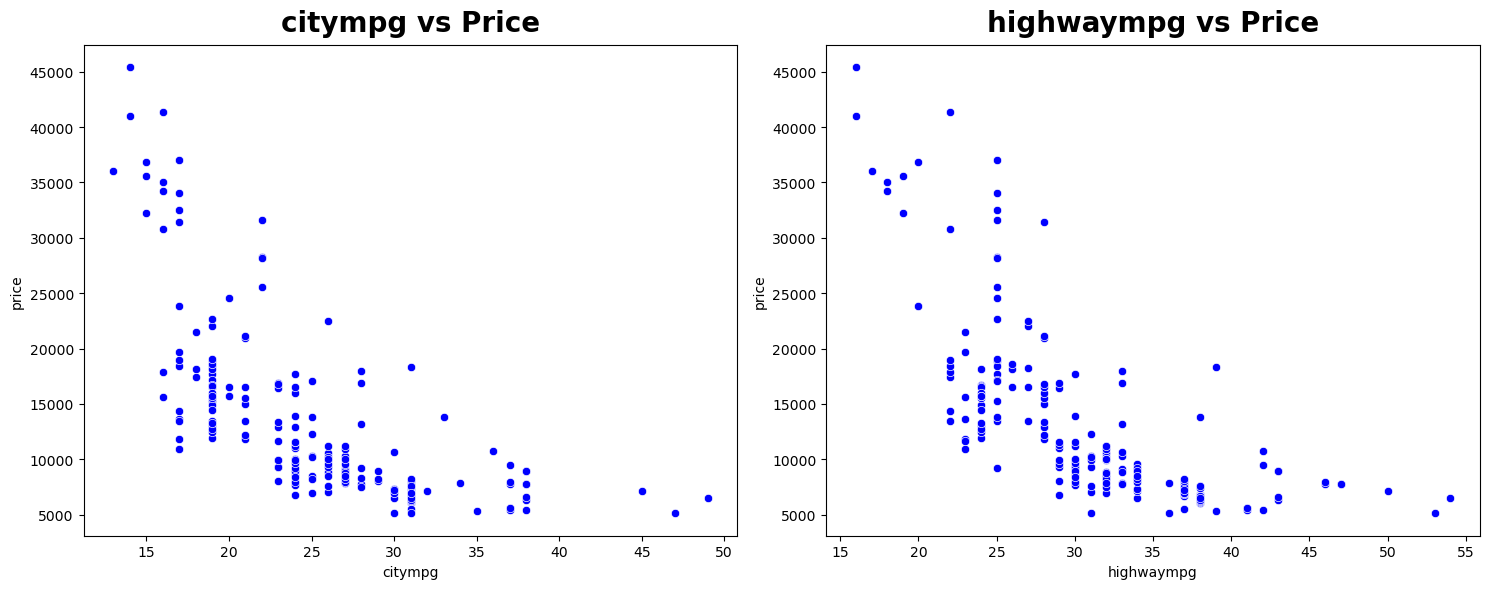

In [42]:
scatter_plot(["citympg","highwaympg"])

There is a fairly strong correlation between citympg and Price   

There is a fairly strong correlation highwaympg Boreratio and Price



In [43]:
car["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

min          mean   median      max          std      skew
price  5118.0  13276.710571  10295.0  45400.0  7988.852332  1.777678

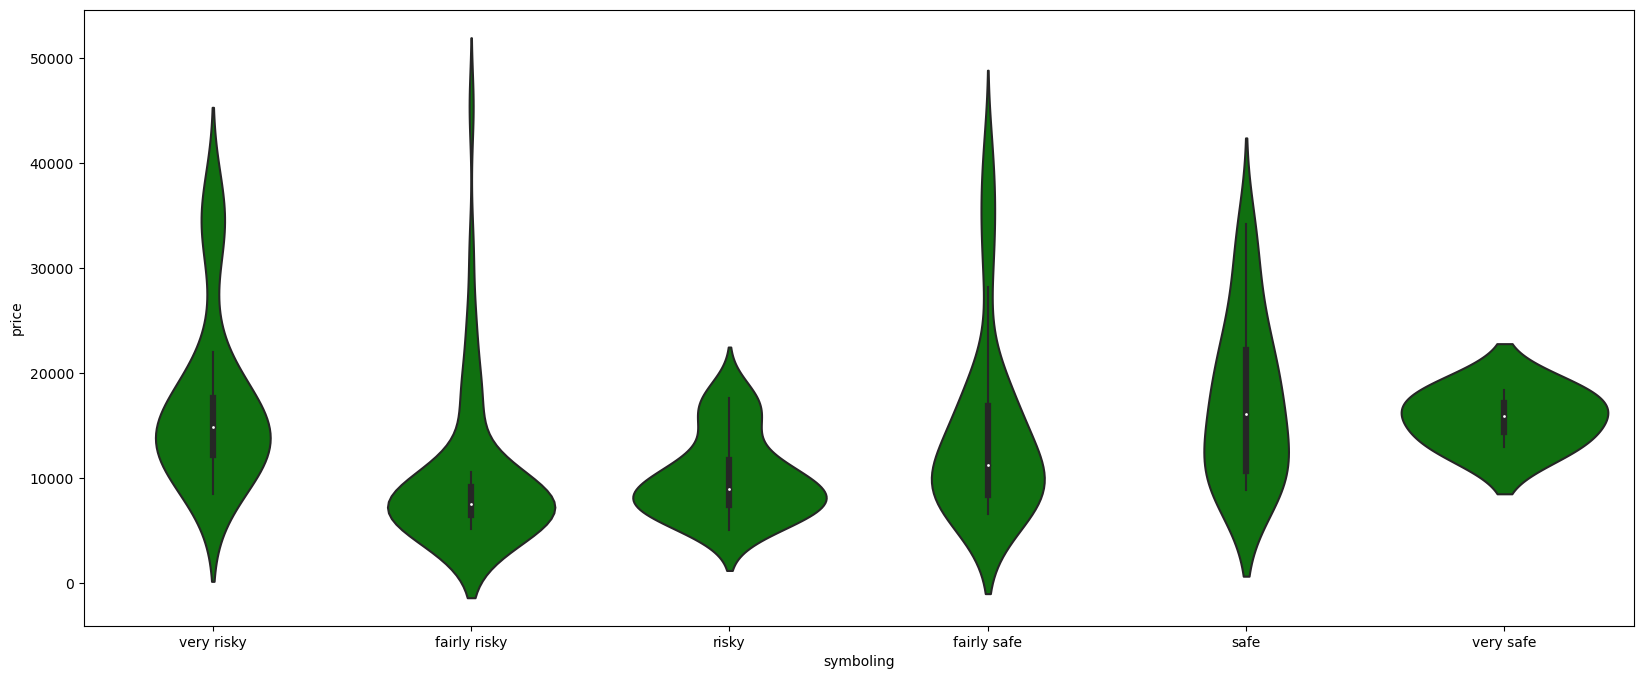

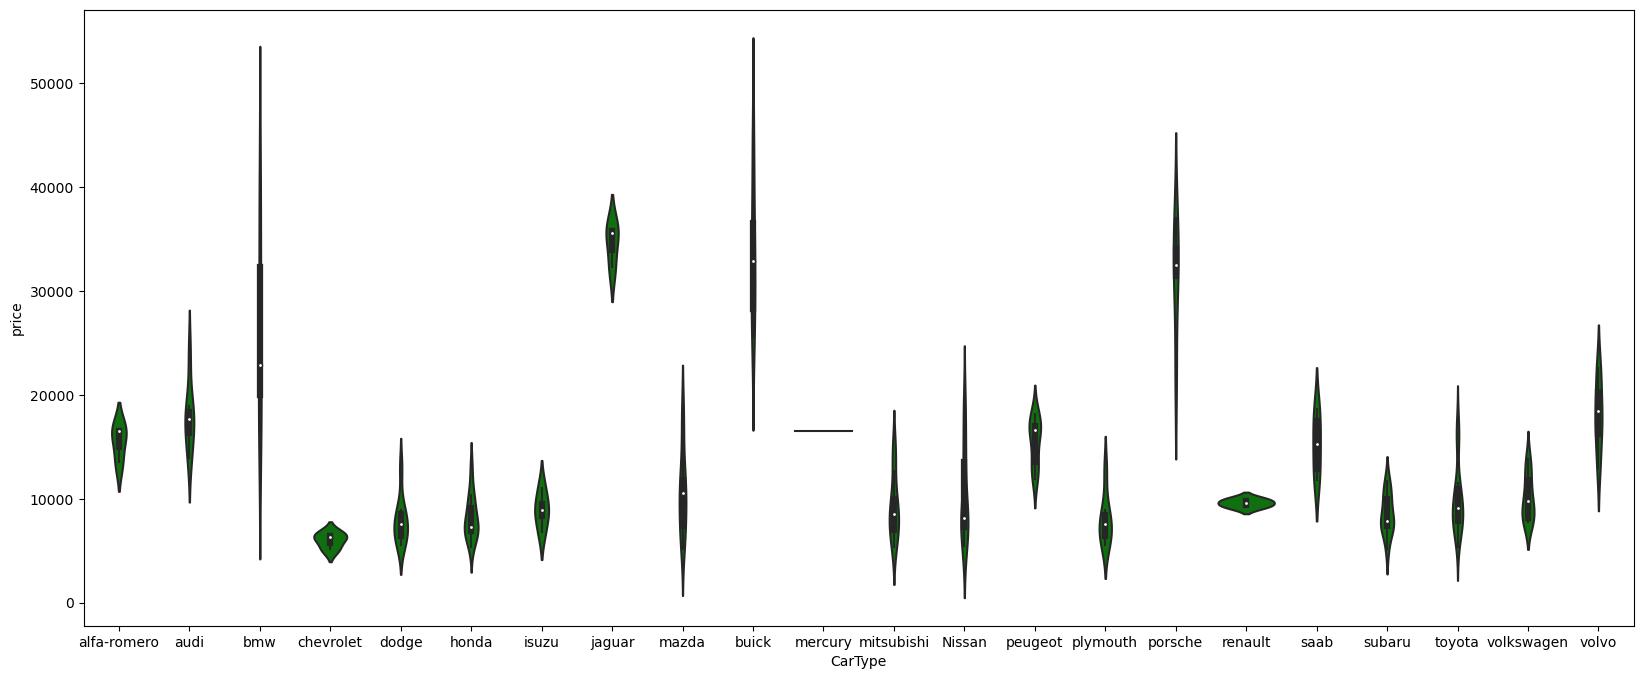

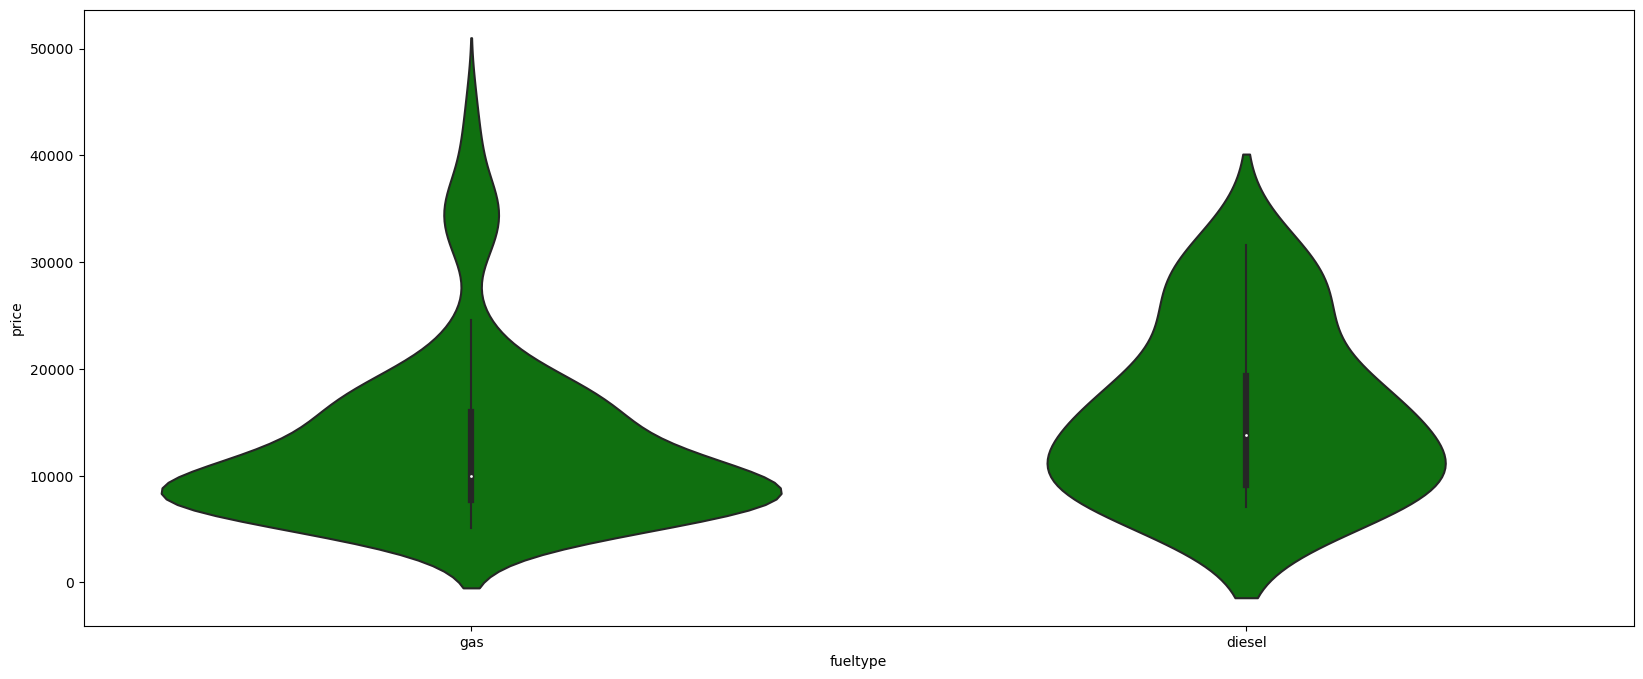

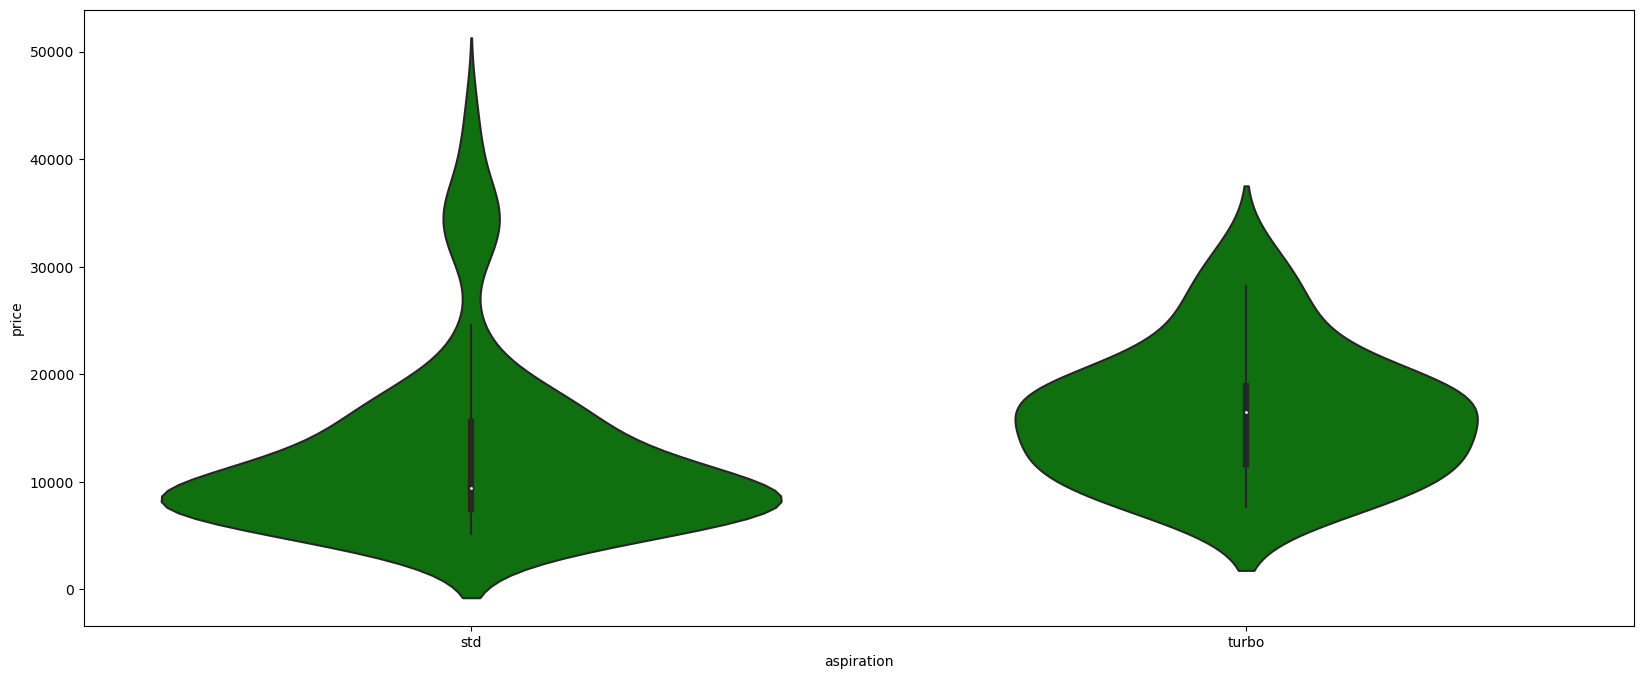

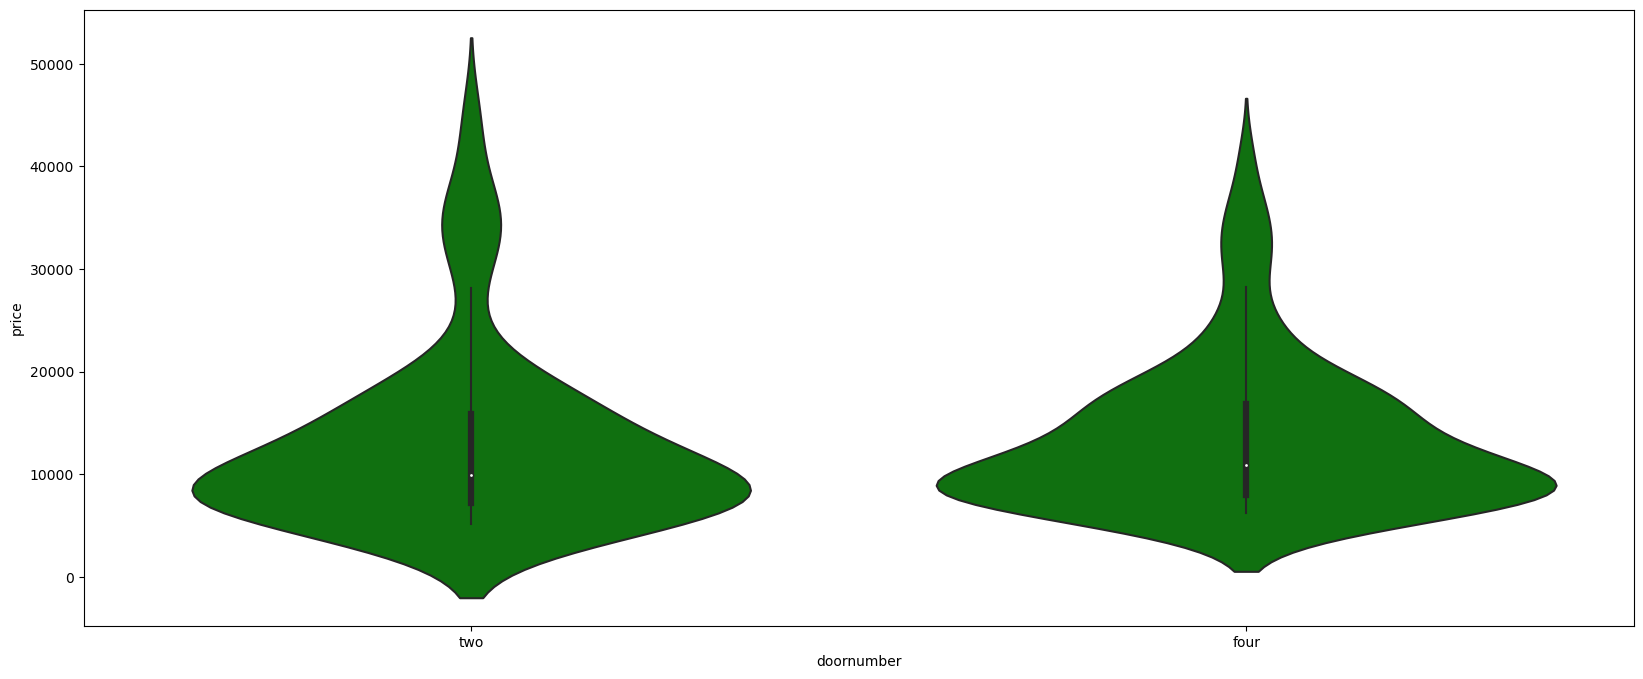

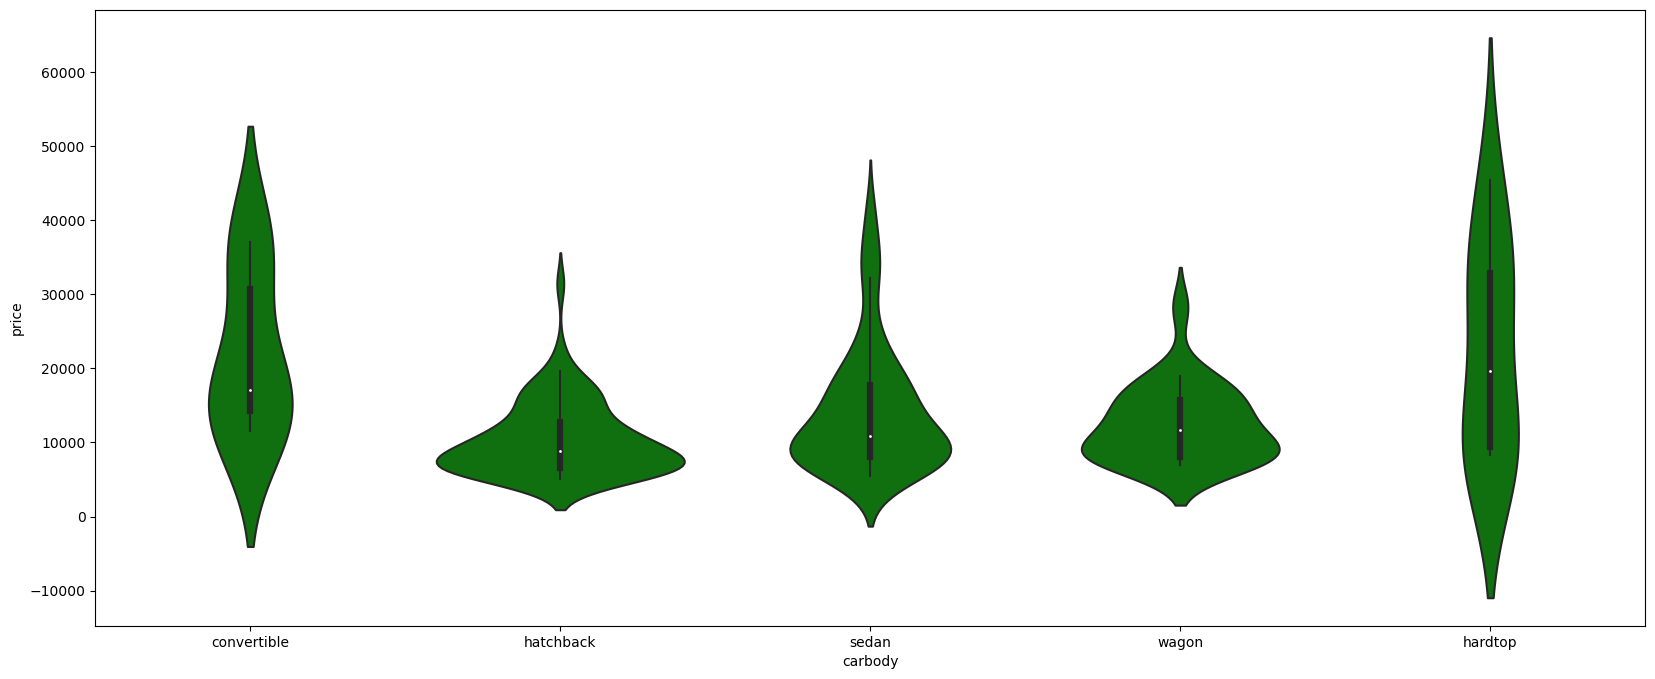

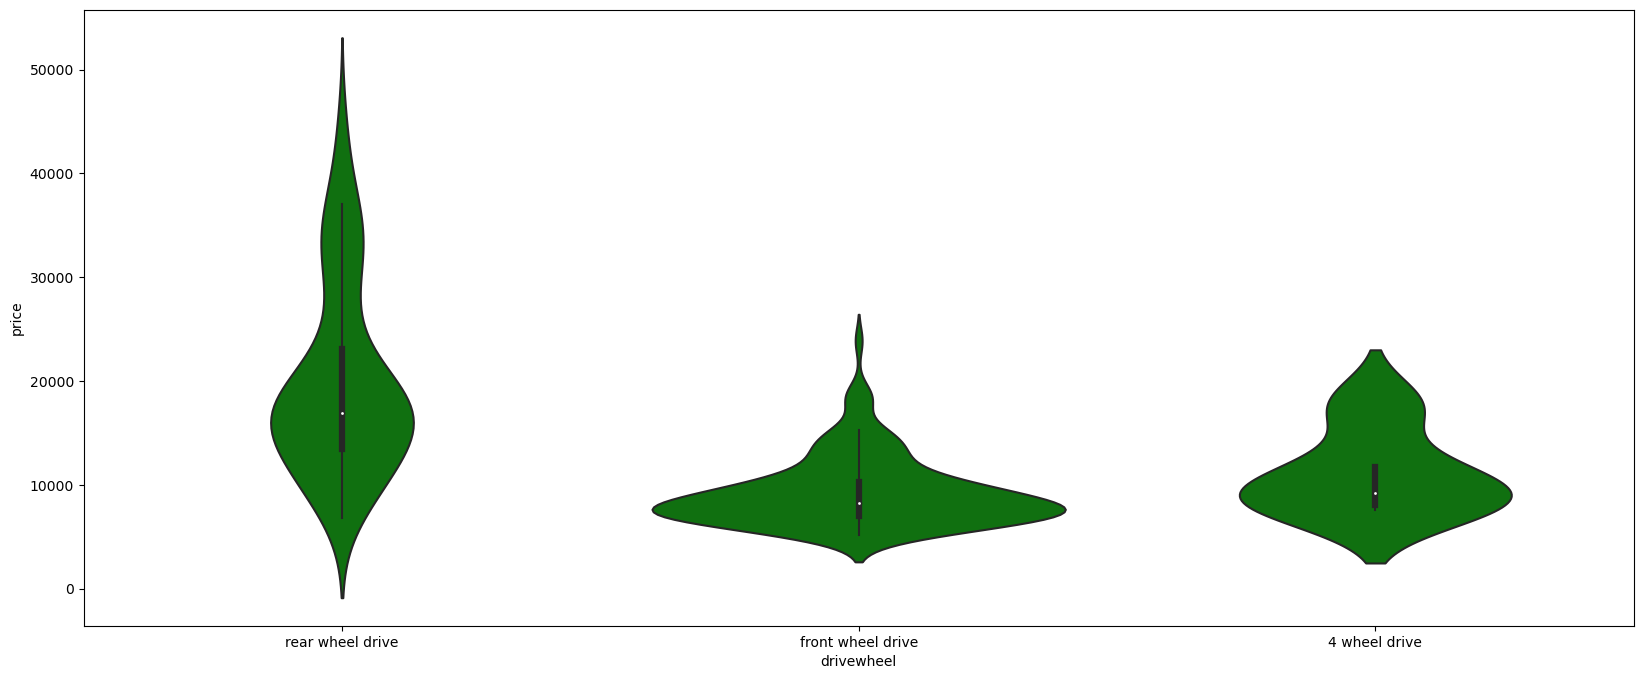

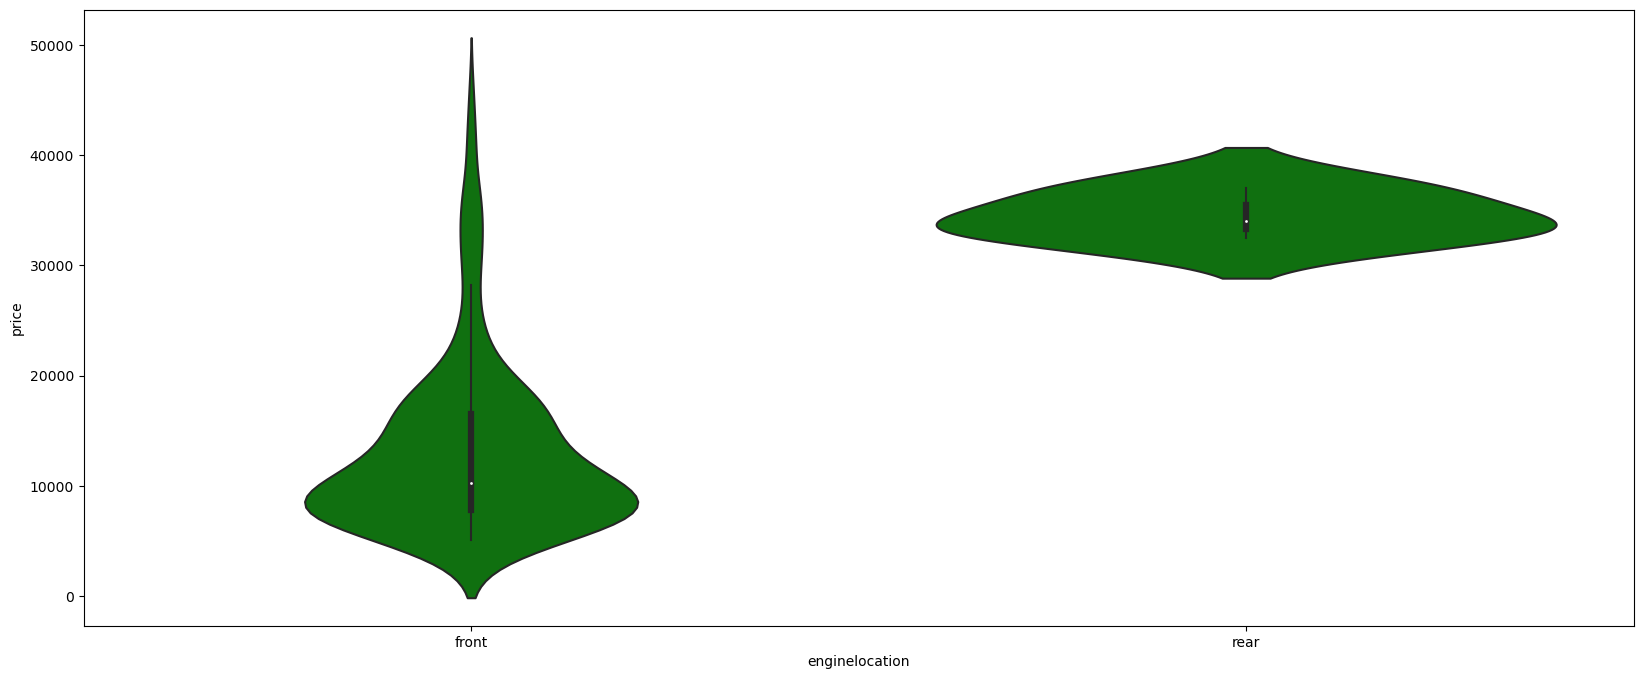

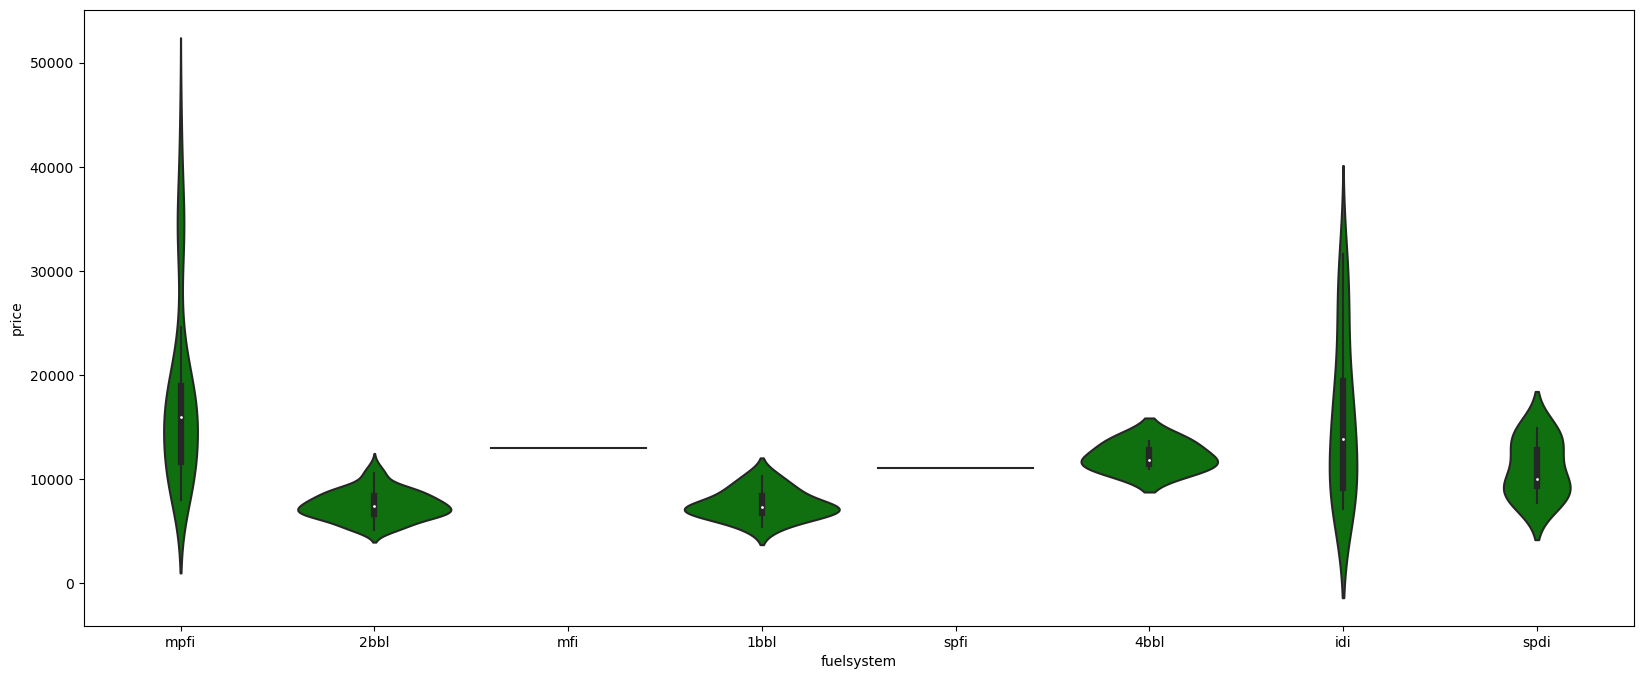

In [44]:
cols=['symboling', 'CarType', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation','fuelsystem']
for col in car[cols]:
    f,ax=plt.subplots(figsize=(20,8))
    sns.violinplot(x=col,y="price",data=car,color="g")

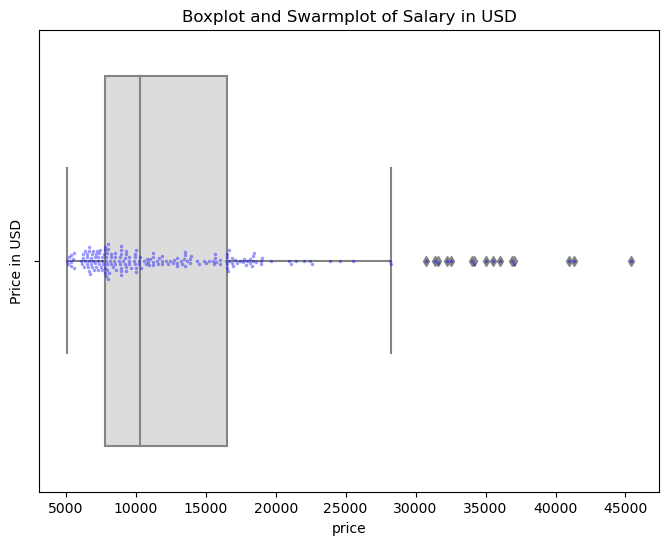

In [45]:
# apply formatting to describe method for 'adjusted_salary' column
formatted_data = car.loc[:, 'price'].describe().apply(lambda x: f'{x:.2f}')

# create boxplot and swarmplot for 'adjusted_salary' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=car['price'], palette='coolwarm')
sns.swarmplot(x=car['price'], color='blue', alpha=0.4, size=2.5)
plt.ylabel('Price in USD')
plt.title('Boxplot and Swarmplot of Salary in USD')
plt.show()

# apply styling to formatted data
styled_data = formatted_data.to_frame().style \
    .background_gradient(cmap='Blues') \
    .set_properties(**{'text-align': 'center', 'border': '1px solid black'})

# display styled data
display(styled_data)

In [46]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'g', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

In [47]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarType'],
      dtype='object')

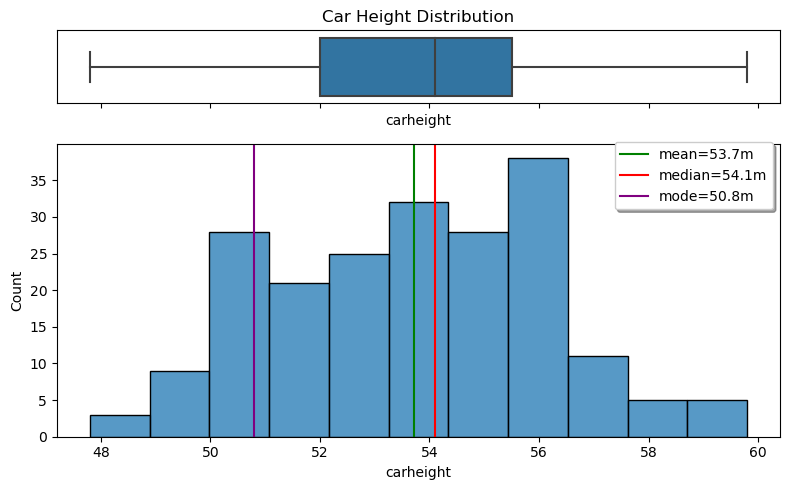

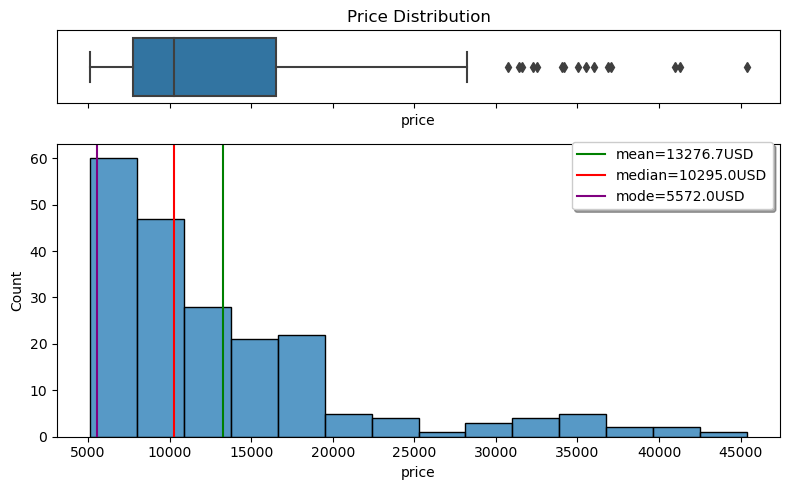

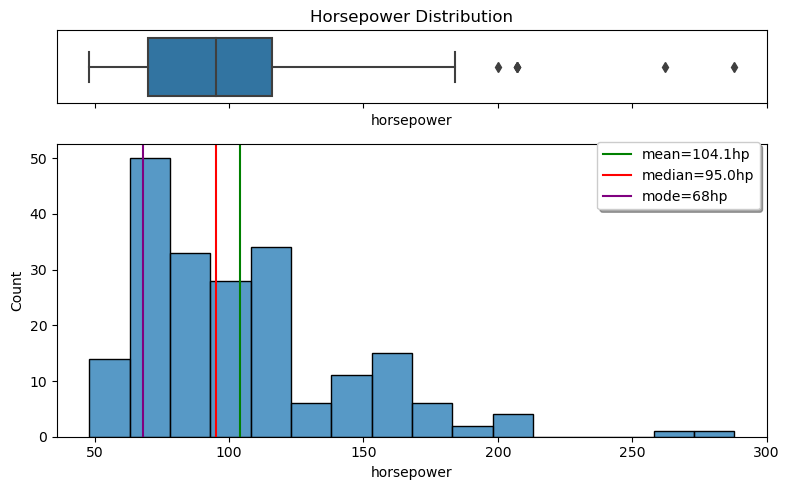

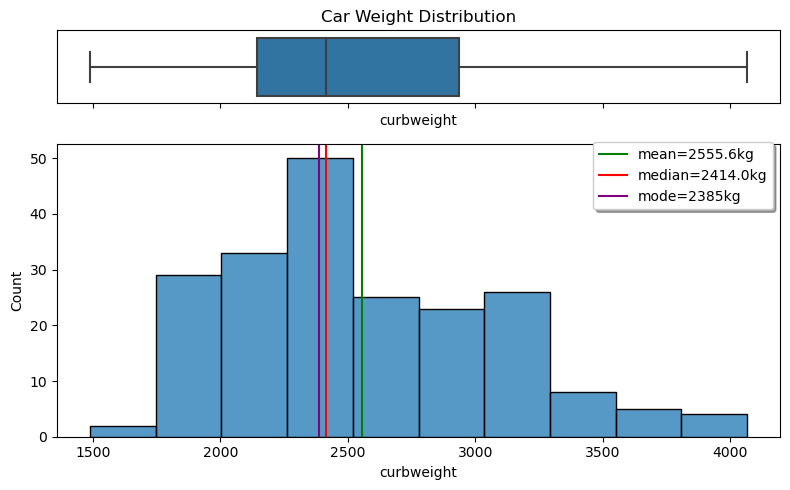

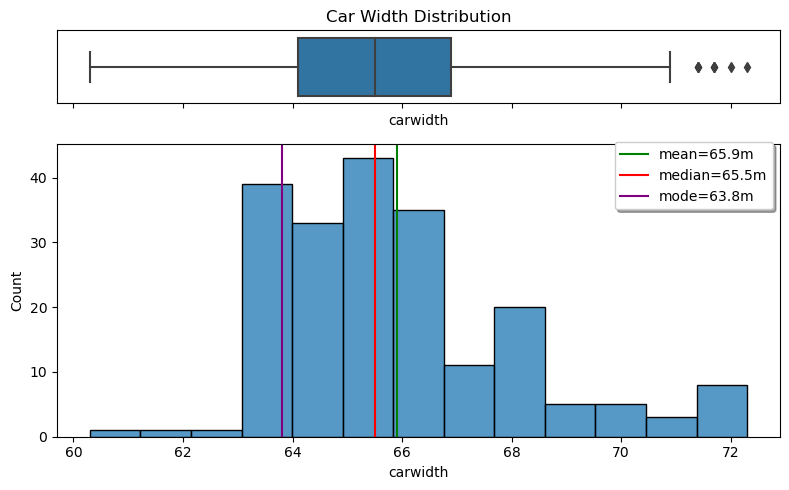

In [48]:
num_plot(car, 'carheight', 'Car Height Distribution','m')
num_plot(car, 'price','Price Distribution','USD')
num_plot(car, 'horsepower','Horsepower Distribution','hp')
num_plot(car, 'curbweight','Car Weight Distribution','kg')
num_plot(car, 'carwidth','Car Width Distribution','m')


In [49]:
import plotly.express as px
fig = px.box(car, y = 'price')
fig.show()

In [50]:
fig = px.box(car, y = 'carwidth')
fig.show()

In [51]:
fig = px.box(car, y = 'curbweight')
fig.show()

In [52]:
fig = px.box(car, y = 'carheight')
fig.show()

In [53]:
fig = px.box(car, y = 'horsepower')
fig.show()

In [54]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

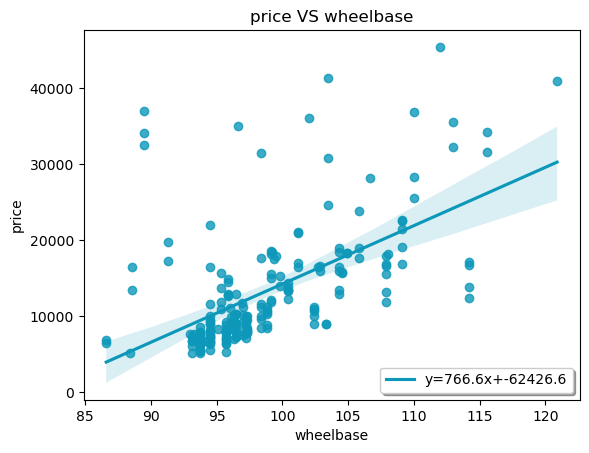

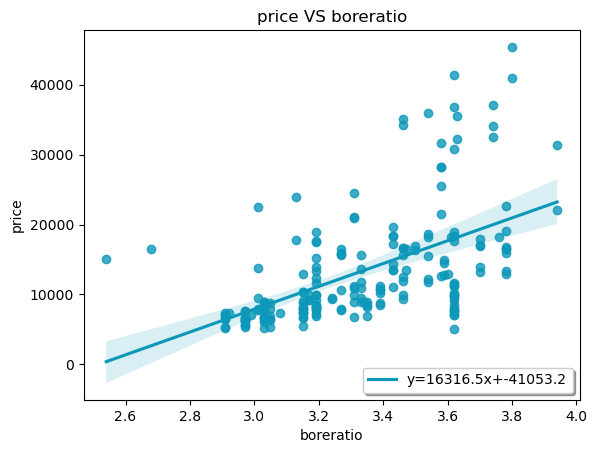

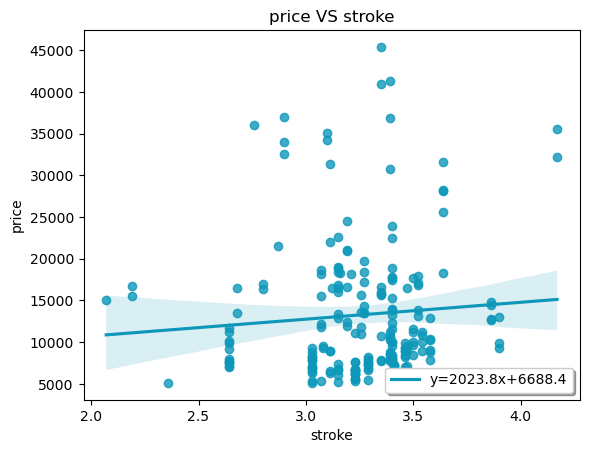

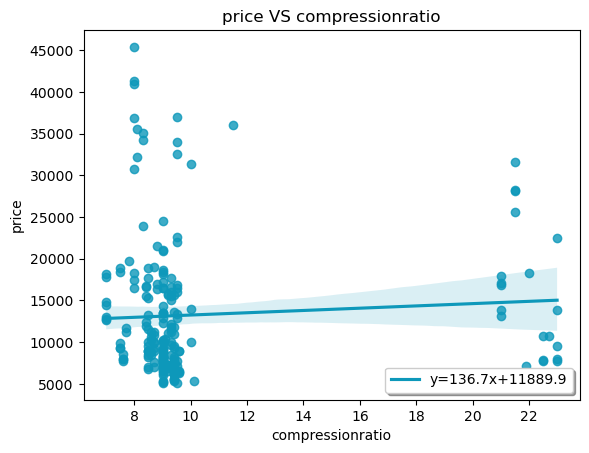

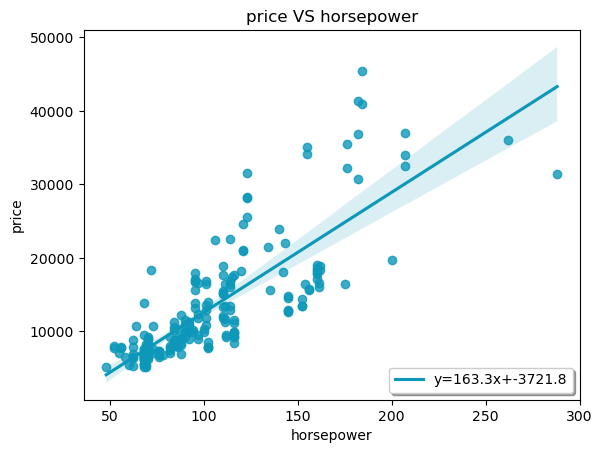

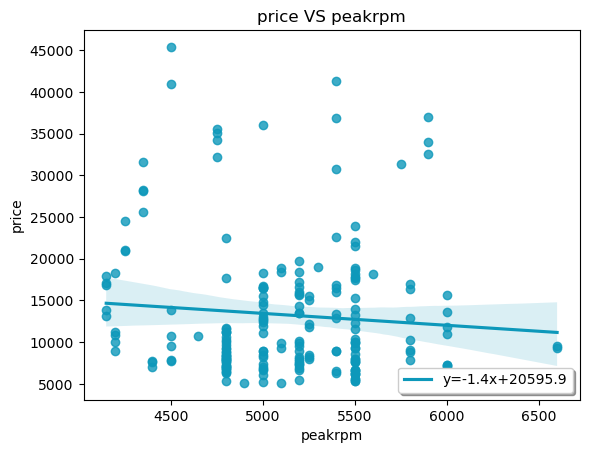

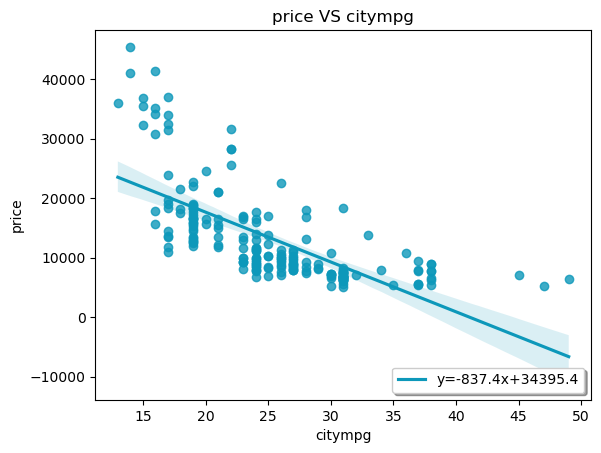

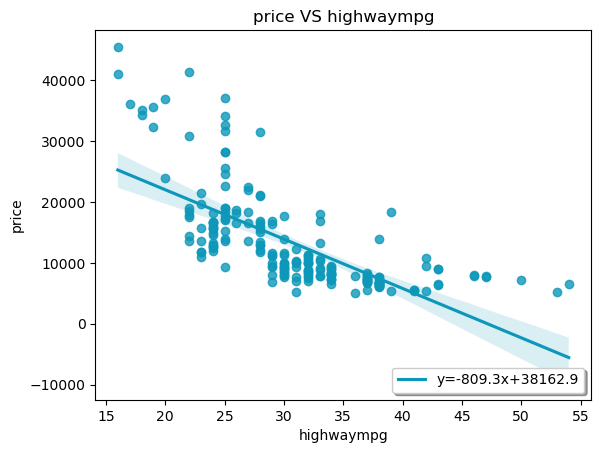

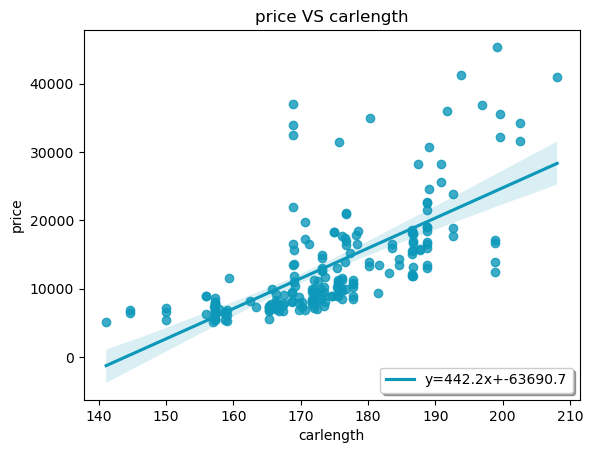

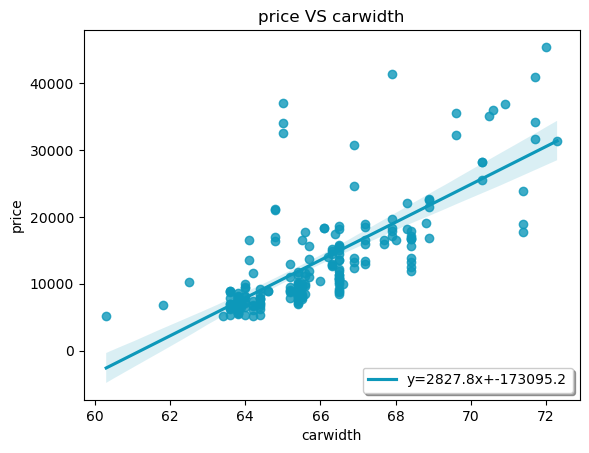

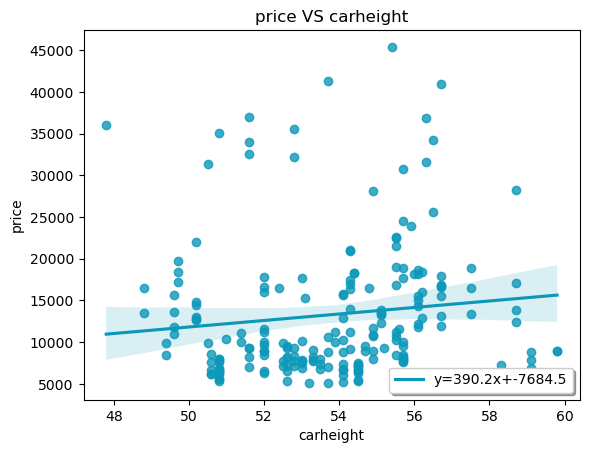

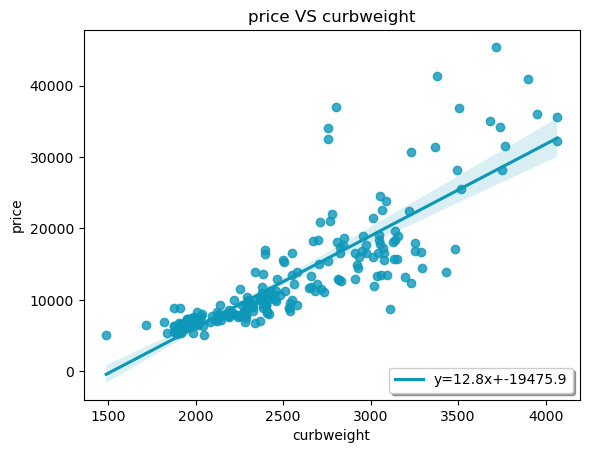

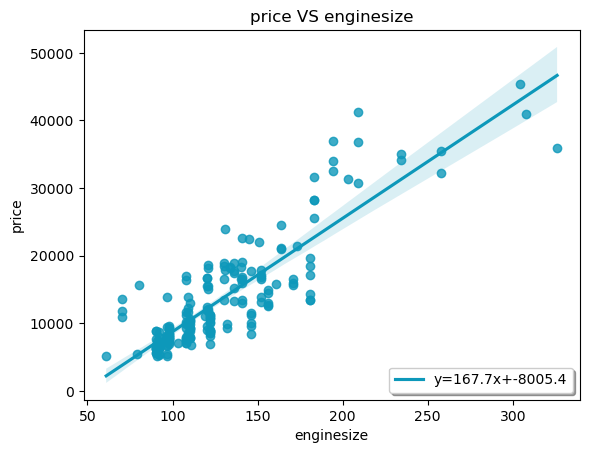

In [55]:
cols=['wheelbase','boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'carheight', 'curbweight',  'enginesize', ]
location=['lower right']
for columns in cols:
    slope, intercept = lr_plot(car,columns,'price', 'lower right')
#slope, intercept = lr_plot(lap2,'RAM (GB)','Price', 'lower right')

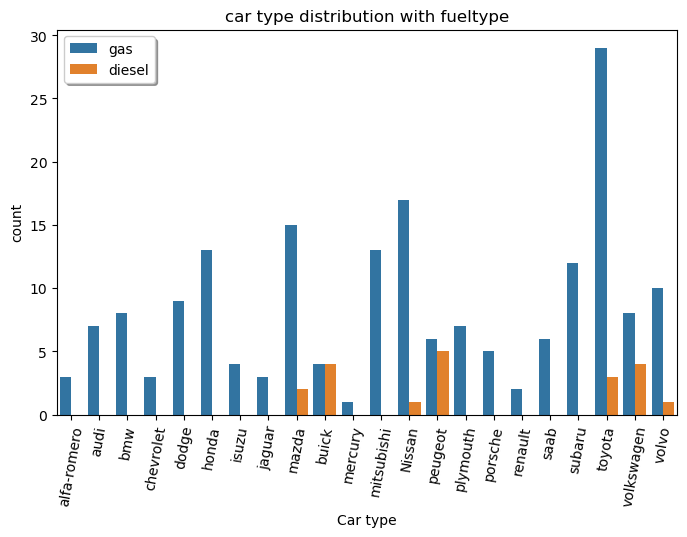

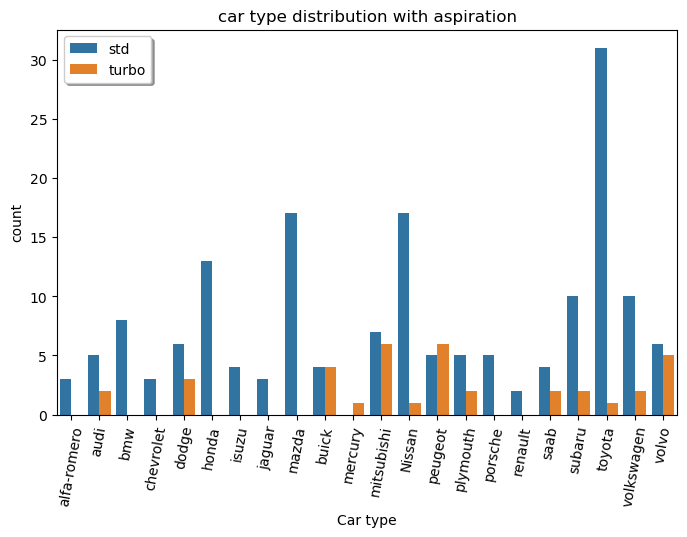

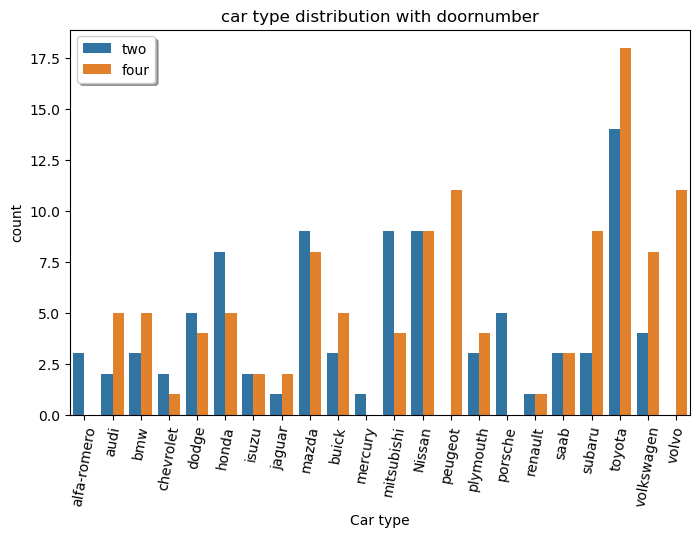

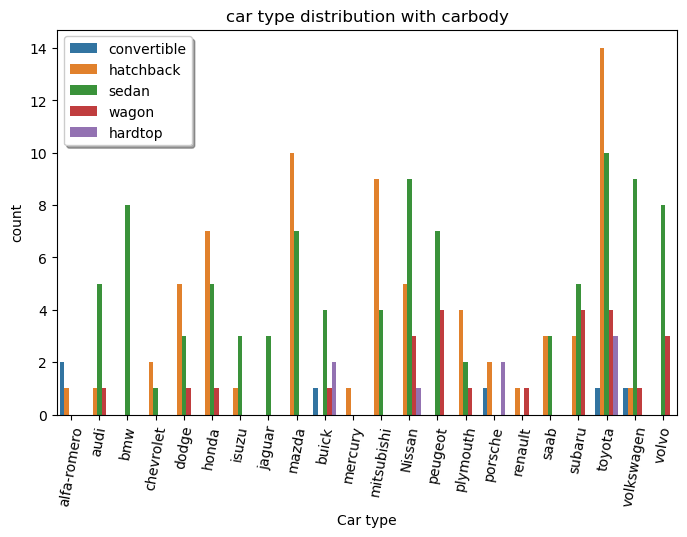

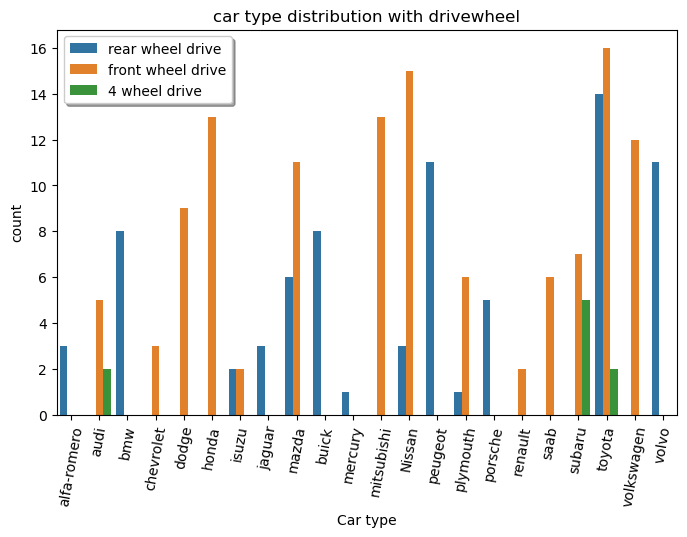

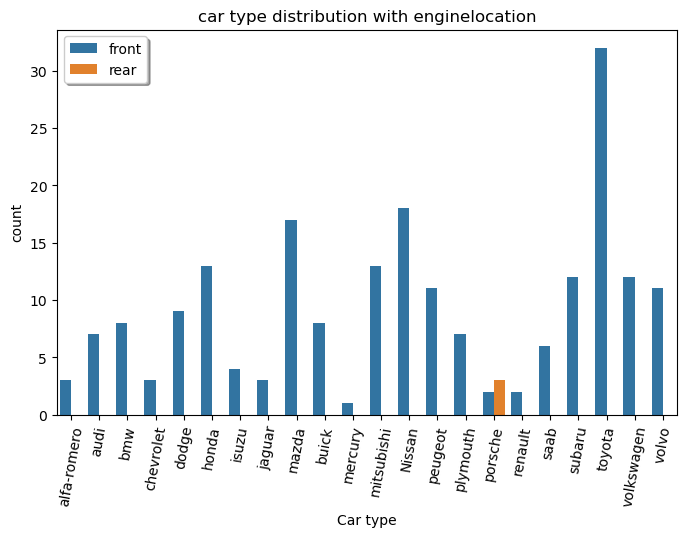

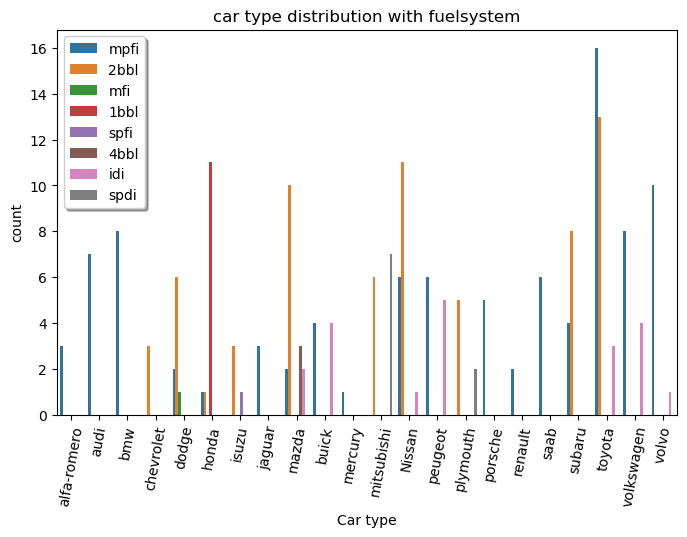

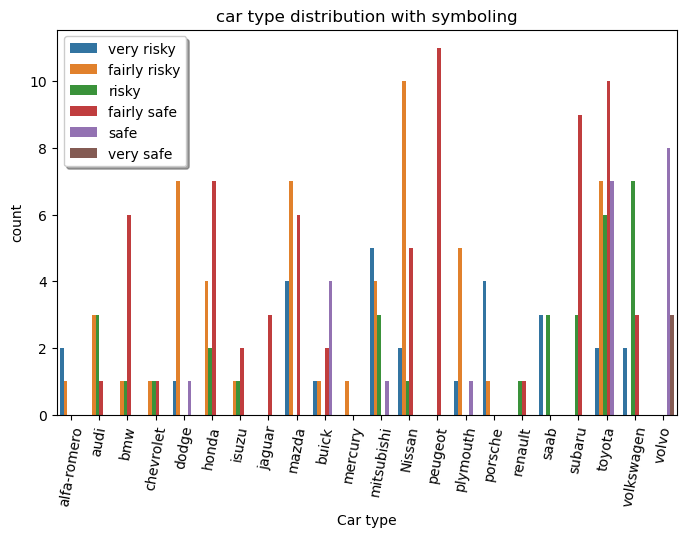

In [56]:
cols=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation','fuelsystem',"symboling"]
for columns in cols:
    fig, ax  = plt.subplots(figsize=(8,5))
    ax = sns.countplot(x = 'CarType', data = car, hue = columns)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
    ax.set_xlabel('Car type')
    plt.title(f'car type distribution with {columns}')
    plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.show()
    


In [57]:
car.head()

car_ID     symboling                   CarName fueltype aspiration  \
0       1    very risky        alfa-romero giulia      gas        std   
1       2    very risky       alfa-romero stelvio      gas        std   
2       3  fairly risky  alfa-romero Quadrifoglio      gas        std   
3       4         risky               audi 100 ls      gas        std   
4       5         risky                audi 100ls      gas        std   

  doornumber      carbody         drivewheel enginelocation  wheelbase  ...  \
0        two  convertible   rear wheel drive          front       88.6  ...   
1        two  convertible   rear wheel drive          front       88.6  ...   
2        two    hatchback   rear wheel drive          front       94.5  ...   
3       four        sedan  front wheel drive          front       99.8  ...   
4       four        sedan      4 wheel drive          front       99.4  ...   

   fuelsystem  boreratio  stroke  compressionratio horsepower peakrpm  \
0        mpfi       3.47    2.68               9.0        111    5000   
1        mpfi       3.47    2.68               9.0        111    5000   
2        mpfi       2.68    3.47               9.0        154    5000   
3        mpfi       3.19    3.40              10.0        102    5500   
4        mpfi       3.19    3.40               8.0        115    5500   

   citympg highwaympg    price      CarType  
0       21         27  13495.0  alfa-romero  
1       21         27  16500.0  alfa-romero  
2       19         26  16500.0  alfa-romero  
3       24         30  13950.0         audi  
4       18         22  17450.0         audi  

[5 rows x 27 columns]

In [58]:
car2=car.copy()
car[["CarType","price"]]

CarType    price
0    alfa-romero  13495.0
1    alfa-romero  16500.0
2    alfa-romero  16500.0
3           audi  13950.0
4           audi  17450.0
..           ...      ...
200        volvo  16845.0
201        volvo  19045.0
202        volvo  21485.0
203        volvo  22470.0
204        volvo  22625.0

[205 rows x 2 columns]

In [59]:
car.dtypes

car_ID                int64
symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CarType              object
dtype: object

MODEL TRAINING

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet


In [61]:
linear=LinearRegression()
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
bayesian_ridge = BayesianRidge()
ard_regression = ARDRegression()
lars = Lars()
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5) 
passive_aggressive_regressor = PassiveAggressiveRegressor(C=1.0, max_iter=1000, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=0)
ran=RandomForestRegressor(n_estimators=20)

gradient=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
hist=HistGradientBoostingRegressor(learning_rate=0.1,l2_regularization=0.1)
ada=AdaBoostRegressor(n_estimators=10,learning_rate=0.2,random_state=40)
knn=KNeighborsRegressor(n_neighbors=10)
el=ElasticNet(alpha=0.1)

In [62]:

car2.drop(["CarName","car_ID"],inplace=True,axis=1)
x=car2.drop("price",axis=1)
y=car2["price"]


In [63]:
numerical_data=["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","CarType" ]
pd.get_dummies(car, columns = numerical_data, drop_first = True)
car4=car2.copy()
en=LabelEncoder()
for cols in numerical_data:
    car[cols]=en.fit_transform(car[cols])

car.drop(["CarName","car_ID"],inplace=True,axis=1)
x=car.drop("price",axis=1)
y=car["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)

standard=MinMaxScaler()
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)


In [64]:
def get_score(model):
    model.fit(x_train_new,y_train)
    pred=model.predict(x_train_new)
    score=model.score(x_train_new,y_train)
    return score*100

print("These are the accuracy scores for the Trainning data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')



print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')


These are the accuracy scores for the Trainning data  

 For Linear Regression Algorithm, we had an accuracy of 92.86561264170459
 For  Ridge Algorithm, we had an accuracy of 89.89704308398892
 For Lasso Regression Algorithm, we had an accuracy of 92.86534021742673
 For Bayesian Algorithm, we had an accuracy of 92.56701915735903
 For ARDRegression Algorithm, we had an accuracy of 91.92625375782868
 For Lars Algorithm, we had an accuracy of 31.09402757146553
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 83.91452700232513
 For Passive Aggression Regressor Algorithm, we had an accuracy of 76.07447986179385
 For Decision TreeRegressor Algorithm, we had an accuracy of 99.96399042887674
 For Random Forest Regressor Algorithm, we had an accuracy of 97.74883402436915
 For Gradient Boost Regressor Algorithm, we had an accuracy of 83.88212648777615
 For Hist Regressor Algorithm, we had an accuracy of 90.66297693316275
 For Adaboost Forest Regressor Algorithm, we had an accur

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)

standard=MinMaxScaler()
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
def get_score(model):
    model.fit(x_train_new,y_train)
    pred=model.predict(x_test_new)
    score=model.score(x_test_new,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')


print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')



These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 81.47303729254378
 For  Ridge Algorithm, we had an accuracy of 80.34583262906807
 For Lasso Regression Algorithm, we had an accuracy of 81.5033026400258
 For Bayesian Algorithm, we had an accuracy of 82.2557404942881
 For ARDRegression Algorithm, we had an accuracy of 82.48646528221956
 For Lars Algorithm, we had an accuracy of -0.7527531836679646
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 75.21799405701125
 For Passive Aggression Regressor Algorithm, we had an accuracy of 65.82477428388034
 For Decision TreeRegressor Algorithm, we had an accuracy of 81.26519482643802
 For Random Forest Regressor Algorithm, we had an accuracy of 86.1443764998163
 For Gradient Boost Regressor Algorithm, we had an accuracy of 70.95779850604377
 For Hist Regressor Algorithm, we had an accuracy of 70.48903039903198
 For Adaboost Forest Regressor Algorithm, we had an accuracy

# USING FEATURE SELECTION

 For Random Forest Regressor Algorithm, we had an accuracy of 0.8756388611314423
SELECTED FEATURES FOR OUR MODEL INCLUDES Index(['symboling', 'wheelbase', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'CarType'],
      dtype='object')


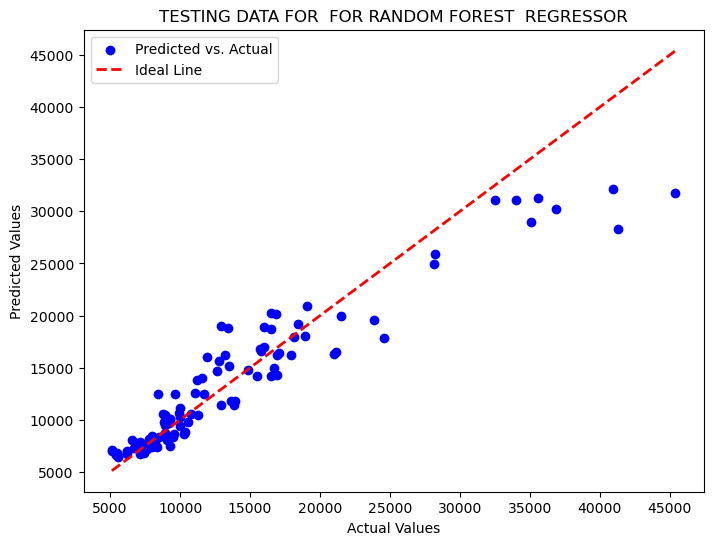

In [66]:
from sklearn.feature_selection import RFE

clf=RFE(estimator=ran,step=5,n_features_to_select=15)
clf=clf.fit(x_train_new,y_train)
selected_features2 = x.columns[clf.support_]
ran=RandomForestRegressor(random_state= 500,
 n_estimators= 1000,
 min_samples_split= 1,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth =250,
 criterion= 'squared_error')


ran.fit(x_train_new,y_train)
pred=ran.predict(x_test_new)
score=ran.score(x_test_new,y_test)
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {score}')
print(f'SELECTED FEATURES FOR OUR MODEL INCLUDES {selected_features2}')


plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR RANDOM FOREST  REGRESSOR")
plt.legend()





# RANDOM FOREST REGRESSOR

As we can see random forest performing best (with accuracy ~ 0.87)




[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 20
[LightGBM] [Info] Start training from score 12747.369294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

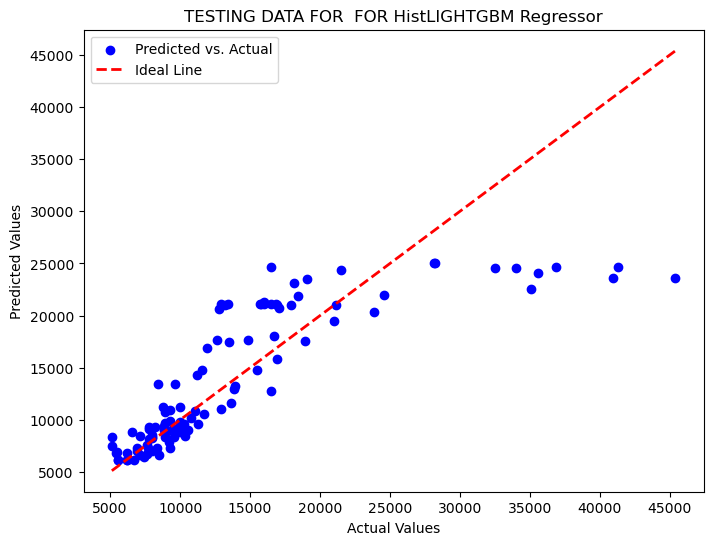

In [67]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

num_round = 100  # Number of boosting rounds

model = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10, verbose_eval=10)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR HistLIGHTGBM Regressor")
plt.legend()

0:	learn: 7317.3532385	total: 182ms	remaining: 30m 17s
1:	learn: 6989.2843263	total: 186ms	remaining: 15m 29s
2:	learn: 6562.0181552	total: 188ms	remaining: 10m 26s
3:	learn: 6192.3321583	total: 192ms	remaining: 7m 59s
4:	learn: 5871.7876104	total: 195ms	remaining: 6m 30s
5:	learn: 5593.6352707	total: 200ms	remaining: 5m 33s
6:	learn: 5296.4535822	total: 200ms	remaining: 4m 46s
7:	learn: 5001.8790900	total: 201ms	remaining: 4m 11s
8:	learn: 4786.9243284	total: 205ms	remaining: 3m 47s
9:	learn: 4575.4167609	total: 209ms	remaining: 3m 28s
10:	learn: 4388.0928937	total: 212ms	remaining: 3m 12s
11:	learn: 4196.6279216	total: 216ms	remaining: 3m
12:	learn: 4009.3825450	total: 217ms	remaining: 2m 46s
13:	learn: 3836.3489186	total: 221ms	remaining: 2m 37s
14:	learn: 3648.1301796	total: 225ms	remaining: 2m 29s
15:	learn: 3500.4990457	total: 229ms	remaining: 2m 23s
16:	learn: 3379.6967615	total: 233ms	remaining: 2m 16s
17:	learn: 3219.4496285	total: 237ms	remaining: 2m 11s
18:	learn: 3076.23568

185:	learn: 426.5619826	total: 995ms	remaining: 52.5s
186:	learn: 425.1245091	total: 1s	remaining: 52.6s
187:	learn: 423.3190332	total: 1.01s	remaining: 52.6s
188:	learn: 420.3275975	total: 1.01s	remaining: 52.6s
189:	learn: 417.8853786	total: 1.02s	remaining: 52.6s
190:	learn: 415.6041623	total: 1.02s	remaining: 52.6s
191:	learn: 414.3152140	total: 1.03s	remaining: 52.6s
192:	learn: 412.2303242	total: 1.03s	remaining: 52.6s
193:	learn: 410.4532551	total: 1.04s	remaining: 52.6s
194:	learn: 408.7373999	total: 1.05s	remaining: 52.6s
195:	learn: 406.7397430	total: 1.05s	remaining: 52.6s
196:	learn: 404.1598788	total: 1.06s	remaining: 52.6s
197:	learn: 402.3084678	total: 1.06s	remaining: 52.6s
198:	learn: 401.3466284	total: 1.07s	remaining: 52.6s
199:	learn: 399.9331358	total: 1.07s	remaining: 52.6s
200:	learn: 398.0778001	total: 1.08s	remaining: 52.6s
201:	learn: 397.4478345	total: 1.08s	remaining: 52.6s
202:	learn: 396.5913831	total: 1.09s	remaining: 52.6s
203:	learn: 394.9527666	total: 

372:	learn: 300.2620426	total: 2.01s	remaining: 51.8s
373:	learn: 300.1797606	total: 2.01s	remaining: 51.8s
374:	learn: 299.9555544	total: 2.02s	remaining: 51.8s
375:	learn: 299.8764176	total: 2.02s	remaining: 51.7s
376:	learn: 299.6390765	total: 2.02s	remaining: 51.7s
377:	learn: 299.3679418	total: 2.03s	remaining: 51.7s
378:	learn: 299.1610021	total: 2.03s	remaining: 51.6s
379:	learn: 299.0554505	total: 2.04s	remaining: 51.6s
380:	learn: 298.7453289	total: 2.04s	remaining: 51.5s
381:	learn: 298.4261393	total: 2.05s	remaining: 51.5s
382:	learn: 298.2047837	total: 2.05s	remaining: 51.5s
383:	learn: 298.0058646	total: 2.05s	remaining: 51.4s
384:	learn: 297.8868908	total: 2.06s	remaining: 51.4s
385:	learn: 297.6720960	total: 2.06s	remaining: 51.4s
386:	learn: 297.4523810	total: 2.07s	remaining: 51.4s
387:	learn: 297.3692050	total: 2.07s	remaining: 51.3s
388:	learn: 297.2591058	total: 2.08s	remaining: 51.3s
389:	learn: 297.0975813	total: 2.08s	remaining: 51.3s
390:	learn: 296.9162758	tota

525:	learn: 287.0475018	total: 2.63s	remaining: 47.3s
526:	learn: 287.0229770	total: 2.63s	remaining: 47.3s
527:	learn: 286.9859144	total: 2.63s	remaining: 47.3s
528:	learn: 286.9742692	total: 2.64s	remaining: 47.2s
529:	learn: 286.9417786	total: 2.64s	remaining: 47.2s
530:	learn: 286.9042114	total: 2.64s	remaining: 47.2s
531:	learn: 286.8615312	total: 2.65s	remaining: 47.2s
532:	learn: 286.8385761	total: 2.65s	remaining: 47.1s
533:	learn: 286.8137771	total: 2.66s	remaining: 47.1s
534:	learn: 286.7744062	total: 2.66s	remaining: 47.1s
535:	learn: 286.7399539	total: 2.67s	remaining: 47.1s
536:	learn: 286.6767707	total: 2.67s	remaining: 47.1s
537:	learn: 286.6467480	total: 2.68s	remaining: 47.1s
538:	learn: 286.6164351	total: 2.68s	remaining: 47.1s
539:	learn: 286.6058397	total: 2.69s	remaining: 47s
540:	learn: 286.5575928	total: 2.69s	remaining: 47s
541:	learn: 286.5063461	total: 2.69s	remaining: 47s
542:	learn: 286.4593667	total: 2.7s	remaining: 47s
543:	learn: 286.4378299	total: 2.7s	r

678:	learn: 284.1915601	total: 3.42s	remaining: 47s
679:	learn: 284.1747841	total: 3.43s	remaining: 47s
680:	learn: 284.1700845	total: 3.44s	remaining: 47s
681:	learn: 284.1654974	total: 3.45s	remaining: 47.1s
682:	learn: 284.1571891	total: 3.45s	remaining: 47.1s
683:	learn: 284.1546339	total: 3.46s	remaining: 47.1s
684:	learn: 284.1484259	total: 3.47s	remaining: 47.1s
685:	learn: 284.1399267	total: 3.47s	remaining: 47.1s
686:	learn: 284.1362702	total: 3.48s	remaining: 47.1s
687:	learn: 284.1286139	total: 3.48s	remaining: 47.1s
688:	learn: 284.1203017	total: 3.48s	remaining: 47.1s
689:	learn: 284.1069032	total: 3.49s	remaining: 47.1s
690:	learn: 284.0984276	total: 3.5s	remaining: 47.1s
691:	learn: 284.0868820	total: 3.5s	remaining: 47.1s
692:	learn: 284.0842433	total: 3.51s	remaining: 47.1s
693:	learn: 284.0719105	total: 3.51s	remaining: 47.1s
694:	learn: 284.0581791	total: 3.52s	remaining: 47.1s
695:	learn: 284.0443945	total: 3.52s	remaining: 47.1s
696:	learn: 284.0370377	total: 3.53s

832:	learn: 283.5526878	total: 4.23s	remaining: 46.6s
833:	learn: 283.5505318	total: 4.24s	remaining: 46.6s
834:	learn: 283.5493518	total: 4.25s	remaining: 46.6s
835:	learn: 283.5457160	total: 4.25s	remaining: 46.6s
836:	learn: 283.5433148	total: 4.26s	remaining: 46.6s
837:	learn: 283.5406894	total: 4.27s	remaining: 46.7s
838:	learn: 283.5406525	total: 4.27s	remaining: 46.7s
839:	learn: 283.5387939	total: 4.28s	remaining: 46.7s
840:	learn: 283.5373145	total: 4.29s	remaining: 46.7s
841:	learn: 283.5367100	total: 4.29s	remaining: 46.7s
842:	learn: 283.5354555	total: 4.3s	remaining: 46.7s
843:	learn: 283.5311922	total: 4.3s	remaining: 46.7s
844:	learn: 283.5307623	total: 4.31s	remaining: 46.7s
845:	learn: 283.5295921	total: 4.31s	remaining: 46.7s
846:	learn: 283.5270221	total: 4.32s	remaining: 46.7s
847:	learn: 283.5263649	total: 4.33s	remaining: 46.7s
848:	learn: 283.5244389	total: 4.33s	remaining: 46.7s
849:	learn: 283.5215814	total: 4.34s	remaining: 46.7s
850:	learn: 283.5187170	total:

991:	learn: 283.4002983	total: 5.05s	remaining: 45.8s
992:	learn: 283.3998179	total: 5.05s	remaining: 45.8s
993:	learn: 283.3997751	total: 5.05s	remaining: 45.8s
994:	learn: 283.3994721	total: 5.06s	remaining: 45.8s
995:	learn: 283.3989792	total: 5.06s	remaining: 45.8s
996:	learn: 283.3982932	total: 5.07s	remaining: 45.8s
997:	learn: 283.3980849	total: 5.07s	remaining: 45.8s
998:	learn: 283.3974138	total: 5.08s	remaining: 45.8s
999:	learn: 283.3973164	total: 5.08s	remaining: 45.7s
1000:	learn: 283.3966121	total: 5.08s	remaining: 45.7s
1001:	learn: 283.3964901	total: 5.09s	remaining: 45.7s
1002:	learn: 283.3961579	total: 5.09s	remaining: 45.7s
1003:	learn: 283.3954886	total: 5.1s	remaining: 45.7s
1004:	learn: 283.3952693	total: 5.1s	remaining: 45.7s
1005:	learn: 283.3945965	total: 5.11s	remaining: 45.7s
1006:	learn: 283.3940737	total: 5.11s	remaining: 45.7s
1007:	learn: 283.3938005	total: 5.12s	remaining: 45.7s
1008:	learn: 283.3935442	total: 5.12s	remaining: 45.6s
1009:	learn: 283.3932

1157:	learn: 283.3653949	total: 5.86s	remaining: 44.7s
1158:	learn: 283.3652916	total: 5.86s	remaining: 44.7s
1159:	learn: 283.3651114	total: 5.86s	remaining: 44.7s
1160:	learn: 283.3649770	total: 5.87s	remaining: 44.7s
1161:	learn: 283.3648033	total: 5.87s	remaining: 44.7s
1162:	learn: 283.3646570	total: 5.88s	remaining: 44.7s
1163:	learn: 283.3644812	total: 5.88s	remaining: 44.7s
1164:	learn: 283.3642765	total: 5.89s	remaining: 44.6s
1165:	learn: 283.3642150	total: 5.89s	remaining: 44.6s
1166:	learn: 283.3641534	total: 5.9s	remaining: 44.6s
1167:	learn: 283.3640257	total: 5.9s	remaining: 44.6s
1168:	learn: 283.3640060	total: 5.9s	remaining: 44.6s
1169:	learn: 283.3639067	total: 5.91s	remaining: 44.6s
1170:	learn: 283.3638591	total: 5.92s	remaining: 44.6s
1171:	learn: 283.3637801	total: 5.92s	remaining: 44.6s
1172:	learn: 283.3636102	total: 5.93s	remaining: 44.6s
1173:	learn: 283.3634893	total: 5.94s	remaining: 44.6s
1174:	learn: 283.3633851	total: 5.94s	remaining: 44.6s
1175:	learn: 

1333:	learn: 283.3564293	total: 6.67s	remaining: 43.4s
1334:	learn: 283.3563954	total: 6.68s	remaining: 43.4s
1335:	learn: 283.3563891	total: 6.69s	remaining: 43.4s
1336:	learn: 283.3563831	total: 6.7s	remaining: 43.4s
1337:	learn: 283.3563681	total: 6.7s	remaining: 43.4s
1338:	learn: 283.3563601	total: 6.71s	remaining: 43.4s
1339:	learn: 283.3563551	total: 6.71s	remaining: 43.4s
1340:	learn: 283.3563480	total: 6.71s	remaining: 43.4s
1341:	learn: 283.3563290	total: 6.72s	remaining: 43.4s
1342:	learn: 283.3562976	total: 6.73s	remaining: 43.4s
1343:	learn: 283.3562825	total: 6.73s	remaining: 43.3s
1344:	learn: 283.3562643	total: 6.74s	remaining: 43.3s
1345:	learn: 283.3562544	total: 6.74s	remaining: 43.4s
1346:	learn: 283.3562427	total: 6.75s	remaining: 43.3s
1347:	learn: 283.3562116	total: 6.75s	remaining: 43.3s
1348:	learn: 283.3561836	total: 6.76s	remaining: 43.3s
1349:	learn: 283.3561723	total: 6.76s	remaining: 43.3s
1350:	learn: 283.3561713	total: 6.77s	remaining: 43.3s
1351:	learn:

1505:	learn: 283.3548221	total: 7.46s	remaining: 42.1s
1506:	learn: 283.3548212	total: 7.46s	remaining: 42.1s
1507:	learn: 283.3548207	total: 7.47s	remaining: 42s
1508:	learn: 283.3548165	total: 7.47s	remaining: 42s
1509:	learn: 283.3548136	total: 7.47s	remaining: 42s
1510:	learn: 283.3548083	total: 7.48s	remaining: 42s
1511:	learn: 283.3548058	total: 7.48s	remaining: 42s
1512:	learn: 283.3548024	total: 7.49s	remaining: 42s
1513:	learn: 283.3548018	total: 7.49s	remaining: 42s
1514:	learn: 283.3547981	total: 7.5s	remaining: 42s
1515:	learn: 283.3547951	total: 7.5s	remaining: 42s
1516:	learn: 283.3547916	total: 7.5s	remaining: 42s
1517:	learn: 283.3547849	total: 7.51s	remaining: 42s
1518:	learn: 283.3547819	total: 7.51s	remaining: 42s
1519:	learn: 283.3547789	total: 7.52s	remaining: 42s
1520:	learn: 283.3547740	total: 7.52s	remaining: 41.9s
1521:	learn: 283.3547718	total: 7.53s	remaining: 41.9s
1522:	learn: 283.3547684	total: 7.53s	remaining: 41.9s
1523:	learn: 283.3547681	total: 7.54s	r

1658:	learn: 283.3545084	total: 8.27s	remaining: 41.6s
1659:	learn: 283.3545083	total: 8.28s	remaining: 41.6s
1660:	learn: 283.3545074	total: 8.28s	remaining: 41.6s
1661:	learn: 283.3545056	total: 8.29s	remaining: 41.6s
1662:	learn: 283.3545054	total: 8.29s	remaining: 41.6s
1663:	learn: 283.3545053	total: 8.29s	remaining: 41.6s
1664:	learn: 283.3545037	total: 8.3s	remaining: 41.5s
1665:	learn: 283.3545024	total: 8.3s	remaining: 41.5s
1666:	learn: 283.3545014	total: 8.31s	remaining: 41.5s
1667:	learn: 283.3544996	total: 8.31s	remaining: 41.5s
1668:	learn: 283.3544991	total: 8.31s	remaining: 41.5s
1669:	learn: 283.3544983	total: 8.32s	remaining: 41.5s
1670:	learn: 283.3544982	total: 8.32s	remaining: 41.5s
1671:	learn: 283.3544969	total: 8.33s	remaining: 41.5s
1672:	learn: 283.3544949	total: 8.33s	remaining: 41.5s
1673:	learn: 283.3544941	total: 8.34s	remaining: 41.5s
1674:	learn: 283.3544934	total: 8.34s	remaining: 41.5s
1675:	learn: 283.3544931	total: 8.35s	remaining: 41.4s
1676:	learn:

1815:	learn: 283.3544196	total: 9.09s	remaining: 41s
1816:	learn: 283.3544196	total: 9.1s	remaining: 41s
1817:	learn: 283.3544192	total: 9.1s	remaining: 41s
1818:	learn: 283.3544192	total: 9.1s	remaining: 40.9s
1819:	learn: 283.3544192	total: 9.11s	remaining: 40.9s
1820:	learn: 283.3544186	total: 9.11s	remaining: 40.9s
1821:	learn: 283.3544181	total: 9.12s	remaining: 40.9s
1822:	learn: 283.3544181	total: 9.12s	remaining: 40.9s
1823:	learn: 283.3544180	total: 9.12s	remaining: 40.9s
1824:	learn: 283.3544178	total: 9.13s	remaining: 40.9s
1825:	learn: 283.3544175	total: 9.13s	remaining: 40.9s
1826:	learn: 283.3544173	total: 9.13s	remaining: 40.9s
1827:	learn: 283.3544172	total: 9.14s	remaining: 40.9s
1828:	learn: 283.3544171	total: 9.15s	remaining: 40.9s
1829:	learn: 283.3544171	total: 9.15s	remaining: 40.9s
1830:	learn: 283.3544169	total: 9.16s	remaining: 40.9s
1831:	learn: 283.3544167	total: 9.16s	remaining: 40.9s
1832:	learn: 283.3544165	total: 9.17s	remaining: 40.8s
1833:	learn: 283.35

1986:	learn: 283.3543966	total: 9.92s	remaining: 40s
1987:	learn: 283.3543966	total: 9.93s	remaining: 40s
1988:	learn: 283.3543966	total: 9.93s	remaining: 40s
1989:	learn: 283.3543965	total: 9.93s	remaining: 40s
1990:	learn: 283.3543964	total: 9.94s	remaining: 40s
1991:	learn: 283.3543964	total: 9.94s	remaining: 40s
1992:	learn: 283.3543964	total: 9.94s	remaining: 39.9s
1993:	learn: 283.3543963	total: 9.95s	remaining: 39.9s
1994:	learn: 283.3543963	total: 9.95s	remaining: 39.9s
1995:	learn: 283.3543963	total: 9.96s	remaining: 39.9s
1996:	learn: 283.3543962	total: 9.96s	remaining: 39.9s
1997:	learn: 283.3543961	total: 9.96s	remaining: 39.9s
1998:	learn: 283.3543961	total: 9.96s	remaining: 39.9s
1999:	learn: 283.3543961	total: 9.97s	remaining: 39.9s
2000:	learn: 283.3543960	total: 9.97s	remaining: 39.9s
2001:	learn: 283.3543960	total: 9.98s	remaining: 39.9s
2002:	learn: 283.3543959	total: 9.98s	remaining: 39.9s
2003:	learn: 283.3543959	total: 9.99s	remaining: 39.9s
2004:	learn: 283.35439

2152:	learn: 283.3543917	total: 10.7s	remaining: 39s
2153:	learn: 283.3543917	total: 10.7s	remaining: 39s
2154:	learn: 283.3543917	total: 10.7s	remaining: 39s
2155:	learn: 283.3543917	total: 10.7s	remaining: 39s
2156:	learn: 283.3543916	total: 10.7s	remaining: 39s
2157:	learn: 283.3543916	total: 10.7s	remaining: 38.9s
2158:	learn: 283.3543916	total: 10.7s	remaining: 38.9s
2159:	learn: 283.3543916	total: 10.7s	remaining: 38.9s
2160:	learn: 283.3543916	total: 10.7s	remaining: 38.9s
2161:	learn: 283.3543916	total: 10.7s	remaining: 38.9s
2162:	learn: 283.3543916	total: 10.7s	remaining: 38.9s
2163:	learn: 283.3543916	total: 10.7s	remaining: 38.9s
2164:	learn: 283.3543915	total: 10.8s	remaining: 38.9s
2165:	learn: 283.3543915	total: 10.8s	remaining: 38.9s
2166:	learn: 283.3543915	total: 10.8s	remaining: 38.9s
2167:	learn: 283.3543915	total: 10.8s	remaining: 38.9s
2168:	learn: 283.3543915	total: 10.8s	remaining: 38.9s
2169:	learn: 283.3543915	total: 10.8s	remaining: 38.9s
2170:	learn: 283.354

2319:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2320:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2321:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2322:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2323:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2324:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2325:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2326:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2327:	learn: 283.3543904	total: 11.5s	remaining: 38.1s
2328:	learn: 283.3543904	total: 11.6s	remaining: 38s
2329:	learn: 283.3543904	total: 11.6s	remaining: 38s
2330:	learn: 283.3543904	total: 11.6s	remaining: 38s
2331:	learn: 283.3543904	total: 11.6s	remaining: 38s
2332:	learn: 283.3543904	total: 11.6s	remaining: 38s
2333:	learn: 283.3543904	total: 11.6s	remaining: 38s
2334:	learn: 283.3543904	total: 11.6s	remaining: 38s
2335:	learn: 283.3543904	total: 11.6s	remaining: 38s
2336:	learn: 283.3543904	total: 11.6s	remaining: 38s
2337:	learn: 283.3543904	tot

2480:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2481:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2482:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2483:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2484:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2485:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2486:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2487:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2488:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2489:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2490:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2491:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2492:	learn: 283.3543902	total: 12.3s	remaining: 37.2s
2493:	learn: 283.3543901	total: 12.4s	remaining: 37.2s
2494:	learn: 283.3543901	total: 12.4s	remaining: 37.2s
2495:	learn: 283.3543901	total: 12.4s	remaining: 37.2s
2496:	learn: 283.3543901	total: 12.4s	remaining: 37.2s
2497:	learn: 283.3543901	total: 12.4s	remaining: 37.2s
2498:	lear

2654:	learn: 283.3543901	total: 13.1s	remaining: 36.3s
2655:	learn: 283.3543901	total: 13.1s	remaining: 36.3s
2656:	learn: 283.3543901	total: 13.1s	remaining: 36.3s
2657:	learn: 283.3543901	total: 13.1s	remaining: 36.3s
2658:	learn: 283.3543901	total: 13.1s	remaining: 36.3s
2659:	learn: 283.3543901	total: 13.1s	remaining: 36.3s
2660:	learn: 283.3543901	total: 13.1s	remaining: 36.2s
2661:	learn: 283.3543901	total: 13.1s	remaining: 36.2s
2662:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2663:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2664:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2665:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2666:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2667:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2668:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2669:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2670:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2671:	learn: 283.3543901	total: 13.2s	remaining: 36.2s
2672:	lear

2827:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2828:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2829:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2830:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2831:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2832:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2833:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2834:	learn: 283.3543901	total: 13.9s	remaining: 35.3s
2835:	learn: 283.3543901	total: 14s	remaining: 35.2s
2836:	learn: 283.3543901	total: 14s	remaining: 35.2s
2837:	learn: 283.3543901	total: 14s	remaining: 35.2s
2838:	learn: 283.3543901	total: 14s	remaining: 35.2s
2839:	learn: 283.3543901	total: 14s	remaining: 35.2s
2840:	learn: 283.3543901	total: 14s	remaining: 35.2s
2841:	learn: 283.3543901	total: 14s	remaining: 35.2s
2842:	learn: 283.3543901	total: 14s	remaining: 35.2s
2843:	learn: 283.3543901	total: 14s	remaining: 35.2s
2844:	learn: 283.3543901	total: 14s	remaining: 35.2s
2845:	learn: 283.3543901	total

3020:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3021:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3022:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3023:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3024:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3025:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3026:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3027:	learn: 283.3543901	total: 14.8s	remaining: 34.1s
3028:	learn: 283.3543901	total: 14.8s	remaining: 34s
3029:	learn: 283.3543901	total: 14.8s	remaining: 34s
3030:	learn: 283.3543901	total: 14.8s	remaining: 34s
3031:	learn: 283.3543901	total: 14.8s	remaining: 34s
3032:	learn: 283.3543901	total: 14.8s	remaining: 34s
3033:	learn: 283.3543901	total: 14.8s	remaining: 34s
3034:	learn: 283.3543901	total: 14.8s	remaining: 34s
3035:	learn: 283.3543901	total: 14.8s	remaining: 34s
3036:	learn: 283.3543901	total: 14.8s	remaining: 34s
3037:	learn: 283.3543901	total: 14.8s	remaining: 34s
3038:	learn: 283.3543901	total

3202:	learn: 283.3543901	total: 15.6s	remaining: 33s
3203:	learn: 283.3543901	total: 15.6s	remaining: 33s
3204:	learn: 283.3543901	total: 15.6s	remaining: 33s
3205:	learn: 283.3543901	total: 15.6s	remaining: 33s
3206:	learn: 283.3543901	total: 15.6s	remaining: 33s
3207:	learn: 283.3543901	total: 15.6s	remaining: 33s
3208:	learn: 283.3543901	total: 15.6s	remaining: 33s
3209:	learn: 283.3543901	total: 15.6s	remaining: 33s
3210:	learn: 283.3543901	total: 15.6s	remaining: 33s
3211:	learn: 283.3543901	total: 15.6s	remaining: 33s
3212:	learn: 283.3543901	total: 15.6s	remaining: 33s
3213:	learn: 283.3543901	total: 15.6s	remaining: 33s
3214:	learn: 283.3543901	total: 15.6s	remaining: 33s
3215:	learn: 283.3543901	total: 15.6s	remaining: 33s
3216:	learn: 283.3543901	total: 15.6s	remaining: 33s
3217:	learn: 283.3543901	total: 15.6s	remaining: 33s
3218:	learn: 283.3543901	total: 15.6s	remaining: 33s
3219:	learn: 283.3543901	total: 15.7s	remaining: 33s
3220:	learn: 283.3543901	total: 15.7s	remainin

3363:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3364:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3365:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3366:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3367:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3368:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3369:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3370:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3371:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3372:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3373:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3374:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3375:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3376:	learn: 283.3543901	total: 16.4s	remaining: 32.3s
3377:	learn: 283.3543901	total: 16.5s	remaining: 32.3s
3378:	learn: 283.3543901	total: 16.5s	remaining: 32.2s
3379:	learn: 283.3543901	total: 16.5s	remaining: 32.2s
3380:	learn: 283.3543901	total: 16.5s	remaining: 32.2s
3381:	lear

3539:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3540:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3541:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3542:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3543:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3544:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3545:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3546:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3547:	learn: 283.3543901	total: 17.2s	remaining: 31.4s
3548:	learn: 283.3543901	total: 17.2s	remaining: 31.3s
3549:	learn: 283.3543901	total: 17.2s	remaining: 31.3s
3550:	learn: 283.3543901	total: 17.3s	remaining: 31.3s
3551:	learn: 283.3543901	total: 17.3s	remaining: 31.3s
3552:	learn: 283.3543901	total: 17.3s	remaining: 31.3s
3553:	learn: 283.3543901	total: 17.3s	remaining: 31.3s
3554:	learn: 283.3543901	total: 17.3s	remaining: 31.3s
3555:	learn: 283.3543901	total: 17.3s	remaining: 31.3s
3556:	learn: 283.3543901	total: 17.3s	remaining: 31.3s
3557:	lear

3703:	learn: 283.3543901	total: 18s	remaining: 30.6s
3704:	learn: 283.3543901	total: 18s	remaining: 30.6s
3705:	learn: 283.3543901	total: 18s	remaining: 30.6s
3706:	learn: 283.3543901	total: 18s	remaining: 30.6s
3707:	learn: 283.3543901	total: 18s	remaining: 30.6s
3708:	learn: 283.3543901	total: 18s	remaining: 30.6s
3709:	learn: 283.3543901	total: 18s	remaining: 30.6s
3710:	learn: 283.3543901	total: 18s	remaining: 30.6s
3711:	learn: 283.3543901	total: 18s	remaining: 30.6s
3712:	learn: 283.3543901	total: 18s	remaining: 30.6s
3713:	learn: 283.3543901	total: 18.1s	remaining: 30.6s
3714:	learn: 283.3543901	total: 18.1s	remaining: 30.5s
3715:	learn: 283.3543901	total: 18.1s	remaining: 30.5s
3716:	learn: 283.3543901	total: 18.1s	remaining: 30.5s
3717:	learn: 283.3543901	total: 18.1s	remaining: 30.5s
3718:	learn: 283.3543901	total: 18.1s	remaining: 30.5s
3719:	learn: 283.3543901	total: 18.1s	remaining: 30.5s
3720:	learn: 283.3543901	total: 18.1s	remaining: 30.5s
3721:	learn: 283.3543901	total

3868:	learn: 283.3543901	total: 18.8s	remaining: 29.8s
3869:	learn: 283.3543901	total: 18.8s	remaining: 29.8s
3870:	learn: 283.3543901	total: 18.8s	remaining: 29.8s
3871:	learn: 283.3543901	total: 18.8s	remaining: 29.8s
3872:	learn: 283.3543901	total: 18.8s	remaining: 29.8s
3873:	learn: 283.3543901	total: 18.8s	remaining: 29.8s
3874:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3875:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3876:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3877:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3878:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3879:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3880:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3881:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3882:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3883:	learn: 283.3543901	total: 18.9s	remaining: 29.8s
3884:	learn: 283.3543901	total: 18.9s	remaining: 29.7s
3885:	learn: 283.3543901	total: 18.9s	remaining: 29.7s
3886:	lear

4034:	learn: 283.3543901	total: 19.6s	remaining: 29s
4035:	learn: 283.3543901	total: 19.6s	remaining: 29s
4036:	learn: 283.3543901	total: 19.7s	remaining: 29s
4037:	learn: 283.3543901	total: 19.7s	remaining: 29s
4038:	learn: 283.3543901	total: 19.7s	remaining: 29s
4039:	learn: 283.3543901	total: 19.7s	remaining: 29s
4040:	learn: 283.3543901	total: 19.7s	remaining: 29s
4041:	learn: 283.3543901	total: 19.7s	remaining: 29s
4042:	learn: 283.3543901	total: 19.7s	remaining: 29s
4043:	learn: 283.3543901	total: 19.7s	remaining: 29s
4044:	learn: 283.3543901	total: 19.7s	remaining: 29s
4045:	learn: 283.3543901	total: 19.7s	remaining: 29s
4046:	learn: 283.3543901	total: 19.7s	remaining: 29s
4047:	learn: 283.3543901	total: 19.7s	remaining: 29s
4048:	learn: 283.3543901	total: 19.7s	remaining: 29s
4049:	learn: 283.3543901	total: 19.7s	remaining: 29s
4050:	learn: 283.3543901	total: 19.7s	remaining: 29s
4051:	learn: 283.3543901	total: 19.7s	remaining: 29s
4052:	learn: 283.3543901	total: 19.7s	remainin

4200:	learn: 283.3543901	total: 20.4s	remaining: 28.2s
4201:	learn: 283.3543901	total: 20.4s	remaining: 28.2s
4202:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4203:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4204:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4205:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4206:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4207:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4208:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4209:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4210:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4211:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4212:	learn: 283.3543901	total: 20.5s	remaining: 28.2s
4213:	learn: 283.3543901	total: 20.5s	remaining: 28.1s
4214:	learn: 283.3543901	total: 20.5s	remaining: 28.1s
4215:	learn: 283.3543901	total: 20.5s	remaining: 28.1s
4216:	learn: 283.3543901	total: 20.5s	remaining: 28.1s
4217:	learn: 283.3543901	total: 20.5s	remaining: 28.1s
4218:	lear

4353:	learn: 283.3543901	total: 21.2s	remaining: 27.6s
4354:	learn: 283.3543901	total: 21.3s	remaining: 27.6s
4355:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4356:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4357:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4358:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4359:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4360:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4361:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4362:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4363:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4364:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4365:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4366:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4367:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4368:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4369:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4370:	learn: 283.3543901	total: 21.3s	remaining: 27.5s
4371:	lear

4511:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4512:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4513:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4514:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4515:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4516:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4517:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4518:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4519:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4520:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4521:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4522:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4523:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4524:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4525:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4526:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4527:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4528:	learn: 283.3543901	total: 22.1s	remaining: 26.8s
4529:	lear

4669:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4670:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4671:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4672:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4673:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4674:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4675:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4676:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4677:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4678:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4679:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4680:	learn: 283.3543901	total: 22.9s	remaining: 26.1s
4681:	learn: 283.3543901	total: 23s	remaining: 26.1s
4682:	learn: 283.3543901	total: 23s	remaining: 26.1s
4683:	learn: 283.3543901	total: 23s	remaining: 26.1s
4684:	learn: 283.3543901	total: 23s	remaining: 26.1s
4685:	learn: 283.3543901	total: 23s	remaining: 26s
4686:	learn: 283.3543901	total: 23s	remaining: 26s
4687:	learn: 283.3543901	t

4824:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4825:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4826:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4827:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4828:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4829:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4830:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4831:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4832:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4833:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4834:	learn: 283.3543901	total: 23.7s	remaining: 25.4s
4835:	learn: 283.3543901	total: 23.7s	remaining: 25.3s
4836:	learn: 283.3543901	total: 23.7s	remaining: 25.3s
4837:	learn: 283.3543901	total: 23.7s	remaining: 25.3s
4838:	learn: 283.3543901	total: 23.7s	remaining: 25.3s
4839:	learn: 283.3543901	total: 23.8s	remaining: 25.3s
4840:	learn: 283.3543901	total: 23.8s	remaining: 25.3s
4841:	learn: 283.3543901	total: 23.8s	remaining: 25.3s
4842:	lear

5003:	learn: 283.3543901	total: 24.5s	remaining: 24.5s
5004:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5005:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5006:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5007:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5008:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5009:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5010:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5011:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5012:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5013:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5014:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5015:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5016:	learn: 283.3543901	total: 24.5s	remaining: 24.4s
5017:	learn: 283.3543901	total: 24.6s	remaining: 24.4s
5018:	learn: 283.3543901	total: 24.6s	remaining: 24.4s
5019:	learn: 283.3543901	total: 24.6s	remaining: 24.4s
5020:	learn: 283.3543901	total: 24.6s	remaining: 24.4s
5021:	lear

5183:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5184:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5185:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5186:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5187:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5188:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5189:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5190:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5191:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5192:	learn: 283.3543901	total: 25.3s	remaining: 23.5s
5193:	learn: 283.3543901	total: 25.3s	remaining: 23.4s
5194:	learn: 283.3543901	total: 25.3s	remaining: 23.4s
5195:	learn: 283.3543901	total: 25.4s	remaining: 23.4s
5196:	learn: 283.3543901	total: 25.4s	remaining: 23.4s
5197:	learn: 283.3543901	total: 25.4s	remaining: 23.4s
5198:	learn: 283.3543901	total: 25.4s	remaining: 23.4s
5199:	learn: 283.3543901	total: 25.4s	remaining: 23.4s
5200:	learn: 283.3543901	total: 25.4s	remaining: 23.4s
5201:	lear

5346:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5347:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5348:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5349:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5350:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5351:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5352:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5353:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5354:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5355:	learn: 283.3543901	total: 26.1s	remaining: 22.7s
5356:	learn: 283.3543901	total: 26.2s	remaining: 22.7s
5357:	learn: 283.3543901	total: 26.2s	remaining: 22.7s
5358:	learn: 283.3543901	total: 26.2s	remaining: 22.7s
5359:	learn: 283.3543901	total: 26.2s	remaining: 22.7s
5360:	learn: 283.3543901	total: 26.2s	remaining: 22.6s
5361:	learn: 283.3543901	total: 26.2s	remaining: 22.6s
5362:	learn: 283.3543901	total: 26.2s	remaining: 22.6s
5363:	learn: 283.3543901	total: 26.2s	remaining: 22.6s
5364:	lear

5507:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5508:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5509:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5510:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5511:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5512:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5513:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5514:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5515:	learn: 283.3543901	total: 26.9s	remaining: 21.9s
5516:	learn: 283.3543901	total: 27s	remaining: 21.9s
5517:	learn: 283.3543901	total: 27s	remaining: 21.9s
5518:	learn: 283.3543901	total: 27s	remaining: 21.9s
5519:	learn: 283.3543901	total: 27s	remaining: 21.9s
5520:	learn: 283.3543901	total: 27s	remaining: 21.9s
5521:	learn: 283.3543901	total: 27s	remaining: 21.9s
5522:	learn: 283.3543901	total: 27s	remaining: 21.9s
5523:	learn: 283.3543901	total: 27s	remaining: 21.9s
5524:	learn: 283.3543901	total: 27s	remaining: 21.9s
5525:	learn: 283.3543901	tot

5670:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5671:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5672:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5673:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5674:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5675:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5676:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5677:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5678:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5679:	learn: 283.3543901	total: 27.7s	remaining: 21.1s
5680:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5681:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5682:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5683:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5684:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5685:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5686:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5687:	learn: 283.3543901	total: 27.8s	remaining: 21.1s
5688:	lear

5824:	learn: 283.3543901	total: 28.5s	remaining: 20.4s
5825:	learn: 283.3543901	total: 28.5s	remaining: 20.4s
5826:	learn: 283.3543901	total: 28.5s	remaining: 20.4s
5827:	learn: 283.3543901	total: 28.5s	remaining: 20.4s
5828:	learn: 283.3543901	total: 28.5s	remaining: 20.4s
5829:	learn: 283.3543901	total: 28.5s	remaining: 20.4s
5830:	learn: 283.3543901	total: 28.5s	remaining: 20.4s
5831:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5832:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5833:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5834:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5835:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5836:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5837:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5838:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5839:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5840:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5841:	learn: 283.3543901	total: 28.6s	remaining: 20.4s
5842:	lear

6000:	learn: 283.3543901	total: 29.5s	remaining: 19.7s
6001:	learn: 283.3543901	total: 29.5s	remaining: 19.7s
6002:	learn: 283.3543901	total: 29.5s	remaining: 19.7s
6003:	learn: 283.3543901	total: 29.5s	remaining: 19.6s
6004:	learn: 283.3543901	total: 29.5s	remaining: 19.6s
6005:	learn: 283.3543901	total: 29.5s	remaining: 19.6s
6006:	learn: 283.3543901	total: 29.5s	remaining: 19.6s
6007:	learn: 283.3543901	total: 29.5s	remaining: 19.6s
6008:	learn: 283.3543901	total: 29.5s	remaining: 19.6s
6009:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6010:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6011:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6012:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6013:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6014:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6015:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6016:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6017:	learn: 283.3543901	total: 29.6s	remaining: 19.6s
6018:	lear

6170:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6171:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6172:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6173:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6174:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6175:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6176:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6177:	learn: 283.3543901	total: 30.5s	remaining: 18.9s
6178:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6179:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6180:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6181:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6182:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6183:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6184:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6185:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6186:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6187:	learn: 283.3543901	total: 30.6s	remaining: 18.9s
6188:	lear

6324:	learn: 283.3543901	total: 31.3s	remaining: 18.2s
6325:	learn: 283.3543901	total: 31.3s	remaining: 18.2s
6326:	learn: 283.3543901	total: 31.3s	remaining: 18.2s
6327:	learn: 283.3543901	total: 31.3s	remaining: 18.2s
6328:	learn: 283.3543901	total: 31.3s	remaining: 18.2s
6329:	learn: 283.3543901	total: 31.3s	remaining: 18.2s
6330:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6331:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6332:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6333:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6334:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6335:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6336:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6337:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6338:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6339:	learn: 283.3543901	total: 31.3s	remaining: 18.1s
6340:	learn: 283.3543901	total: 31.4s	remaining: 18.1s
6341:	learn: 283.3543901	total: 31.4s	remaining: 18.1s
6342:	lear

6525:	learn: 283.3543901	total: 32.1s	remaining: 17.1s
6526:	learn: 283.3543901	total: 32.1s	remaining: 17.1s
6527:	learn: 283.3543901	total: 32.1s	remaining: 17.1s
6528:	learn: 283.3543901	total: 32.1s	remaining: 17.1s
6529:	learn: 283.3543901	total: 32.1s	remaining: 17.1s
6530:	learn: 283.3543901	total: 32.1s	remaining: 17.1s
6531:	learn: 283.3543901	total: 32.1s	remaining: 17s
6532:	learn: 283.3543901	total: 32.1s	remaining: 17s
6533:	learn: 283.3543901	total: 32.1s	remaining: 17s
6534:	learn: 283.3543901	total: 32.1s	remaining: 17s
6535:	learn: 283.3543901	total: 32.1s	remaining: 17s
6536:	learn: 283.3543901	total: 32.1s	remaining: 17s
6537:	learn: 283.3543901	total: 32.1s	remaining: 17s
6538:	learn: 283.3543901	total: 32.1s	remaining: 17s
6539:	learn: 283.3543901	total: 32.1s	remaining: 17s
6540:	learn: 283.3543901	total: 32.1s	remaining: 17s
6541:	learn: 283.3543901	total: 32.2s	remaining: 17s
6542:	learn: 283.3543901	total: 32.2s	remaining: 17s
6543:	learn: 283.3543901	total: 32

6704:	learn: 283.3543901	total: 32.9s	remaining: 16.2s
6705:	learn: 283.3543901	total: 32.9s	remaining: 16.2s
6706:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6707:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6708:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6709:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6710:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6711:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6712:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6713:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6714:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6715:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6716:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6717:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6718:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6719:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6720:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6721:	learn: 283.3543901	total: 32.9s	remaining: 16.1s
6722:	lear

6894:	learn: 283.3543901	total: 33.7s	remaining: 15.2s
6895:	learn: 283.3543901	total: 33.7s	remaining: 15.2s
6896:	learn: 283.3543901	total: 33.7s	remaining: 15.2s
6897:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6898:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6899:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6900:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6901:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6902:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6903:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6904:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6905:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6906:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6907:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6908:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6909:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6910:	learn: 283.3543901	total: 33.7s	remaining: 15.1s
6911:	learn: 283.3543901	total: 33.8s	remaining: 15.1s
6912:	lear

7067:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7068:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7069:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7070:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7071:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7072:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7073:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7074:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7075:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7076:	learn: 283.3543901	total: 34.5s	remaining: 14.3s
7077:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7078:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7079:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7080:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7081:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7082:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7083:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7084:	learn: 283.3543901	total: 34.5s	remaining: 14.2s
7085:	lear

7249:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7250:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7251:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7252:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7253:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7254:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7255:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7256:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7257:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7258:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7259:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7260:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7261:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7262:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7263:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7264:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7265:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7266:	learn: 283.3543901	total: 35.5s	remaining: 13.4s
7267:	lear

7408:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7409:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7410:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7411:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7412:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7413:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7414:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7415:	learn: 283.3543901	total: 36.3s	remaining: 12.7s
7416:	learn: 283.3543901	total: 36.3s	remaining: 12.6s
7417:	learn: 283.3543901	total: 36.3s	remaining: 12.6s
7418:	learn: 283.3543901	total: 36.3s	remaining: 12.6s
7419:	learn: 283.3543901	total: 36.3s	remaining: 12.6s
7420:	learn: 283.3543901	total: 36.3s	remaining: 12.6s
7421:	learn: 283.3543901	total: 36.3s	remaining: 12.6s
7422:	learn: 283.3543901	total: 36.3s	remaining: 12.6s
7423:	learn: 283.3543901	total: 36.4s	remaining: 12.6s
7424:	learn: 283.3543901	total: 36.4s	remaining: 12.6s
7425:	learn: 283.3543901	total: 36.4s	remaining: 12.6s
7426:	lear

7594:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7595:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7596:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7597:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7598:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7599:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7600:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7601:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7602:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7603:	learn: 283.3543901	total: 37.1s	remaining: 11.7s
7604:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7605:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7606:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7607:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7608:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7609:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7610:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7611:	learn: 283.3543901	total: 37.2s	remaining: 11.7s
7612:	lear

7756:	learn: 283.3543901	total: 37.9s	remaining: 11s
7757:	learn: 283.3543901	total: 37.9s	remaining: 11s
7758:	learn: 283.3543901	total: 37.9s	remaining: 11s
7759:	learn: 283.3543901	total: 37.9s	remaining: 10.9s
7760:	learn: 283.3543901	total: 37.9s	remaining: 10.9s
7761:	learn: 283.3543901	total: 37.9s	remaining: 10.9s
7762:	learn: 283.3543901	total: 37.9s	remaining: 10.9s
7763:	learn: 283.3543901	total: 38s	remaining: 10.9s
7764:	learn: 283.3543901	total: 38s	remaining: 10.9s
7765:	learn: 283.3543901	total: 38s	remaining: 10.9s
7766:	learn: 283.3543901	total: 38s	remaining: 10.9s
7767:	learn: 283.3543901	total: 38s	remaining: 10.9s
7768:	learn: 283.3543901	total: 38s	remaining: 10.9s
7769:	learn: 283.3543901	total: 38s	remaining: 10.9s
7770:	learn: 283.3543901	total: 38s	remaining: 10.9s
7771:	learn: 283.3543901	total: 38s	remaining: 10.9s
7772:	learn: 283.3543901	total: 38s	remaining: 10.9s
7773:	learn: 283.3543901	total: 38s	remaining: 10.9s
7774:	learn: 283.3543901	total: 38s	re

7946:	learn: 283.3543901	total: 38.9s	remaining: 10.1s
7947:	learn: 283.3543901	total: 38.9s	remaining: 10.1s
7948:	learn: 283.3543901	total: 39s	remaining: 10.1s
7949:	learn: 283.3543901	total: 39s	remaining: 10s
7950:	learn: 283.3543901	total: 39s	remaining: 10s
7951:	learn: 283.3543901	total: 39s	remaining: 10s
7952:	learn: 283.3543901	total: 39s	remaining: 10s
7953:	learn: 283.3543901	total: 39s	remaining: 10s
7954:	learn: 283.3543901	total: 39s	remaining: 10s
7955:	learn: 283.3543901	total: 39s	remaining: 10s
7956:	learn: 283.3543901	total: 39s	remaining: 10s
7957:	learn: 283.3543901	total: 39s	remaining: 10s
7958:	learn: 283.3543901	total: 39s	remaining: 10s
7959:	learn: 283.3543901	total: 39s	remaining: 10s
7960:	learn: 283.3543901	total: 39s	remaining: 9.99s
7961:	learn: 283.3543901	total: 39s	remaining: 9.99s
7962:	learn: 283.3543901	total: 39s	remaining: 9.98s
7963:	learn: 283.3543901	total: 39s	remaining: 9.98s
7964:	learn: 283.3543901	total: 39s	remaining: 9.97s
7965:	learn

8114:	learn: 283.3543901	total: 39.7s	remaining: 9.23s
8115:	learn: 283.3543901	total: 39.7s	remaining: 9.22s
8116:	learn: 283.3543901	total: 39.7s	remaining: 9.22s
8117:	learn: 283.3543901	total: 39.7s	remaining: 9.21s
8118:	learn: 283.3543901	total: 39.8s	remaining: 9.21s
8119:	learn: 283.3543901	total: 39.8s	remaining: 9.2s
8120:	learn: 283.3543901	total: 39.8s	remaining: 9.2s
8121:	learn: 283.3543901	total: 39.8s	remaining: 9.2s
8122:	learn: 283.3543901	total: 39.8s	remaining: 9.19s
8123:	learn: 283.3543901	total: 39.8s	remaining: 9.19s
8124:	learn: 283.3543901	total: 39.8s	remaining: 9.18s
8125:	learn: 283.3543901	total: 39.8s	remaining: 9.18s
8126:	learn: 283.3543901	total: 39.8s	remaining: 9.17s
8127:	learn: 283.3543901	total: 39.8s	remaining: 9.17s
8128:	learn: 283.3543901	total: 39.8s	remaining: 9.16s
8129:	learn: 283.3543901	total: 39.8s	remaining: 9.16s
8130:	learn: 283.3543901	total: 39.8s	remaining: 9.15s
8131:	learn: 283.3543901	total: 39.8s	remaining: 9.15s
8132:	learn: 

8272:	learn: 283.3543901	total: 40.5s	remaining: 8.46s
8273:	learn: 283.3543901	total: 40.5s	remaining: 8.46s
8274:	learn: 283.3543901	total: 40.6s	remaining: 8.45s
8275:	learn: 283.3543901	total: 40.6s	remaining: 8.45s
8276:	learn: 283.3543901	total: 40.6s	remaining: 8.44s
8277:	learn: 283.3543901	total: 40.6s	remaining: 8.44s
8278:	learn: 283.3543901	total: 40.6s	remaining: 8.43s
8279:	learn: 283.3543901	total: 40.6s	remaining: 8.43s
8280:	learn: 283.3543901	total: 40.6s	remaining: 8.43s
8281:	learn: 283.3543901	total: 40.6s	remaining: 8.42s
8282:	learn: 283.3543901	total: 40.6s	remaining: 8.42s
8283:	learn: 283.3543901	total: 40.6s	remaining: 8.41s
8284:	learn: 283.3543901	total: 40.6s	remaining: 8.41s
8285:	learn: 283.3543901	total: 40.6s	remaining: 8.4s
8286:	learn: 283.3543901	total: 40.6s	remaining: 8.4s
8287:	learn: 283.3543901	total: 40.6s	remaining: 8.4s
8288:	learn: 283.3543901	total: 40.7s	remaining: 8.39s
8289:	learn: 283.3543901	total: 40.7s	remaining: 8.39s
8290:	learn: 

8426:	learn: 283.3543901	total: 41.3s	remaining: 7.72s
8427:	learn: 283.3543901	total: 41.4s	remaining: 7.71s
8428:	learn: 283.3543901	total: 41.4s	remaining: 7.71s
8429:	learn: 283.3543901	total: 41.4s	remaining: 7.7s
8430:	learn: 283.3543901	total: 41.4s	remaining: 7.7s
8431:	learn: 283.3543901	total: 41.4s	remaining: 7.69s
8432:	learn: 283.3543901	total: 41.4s	remaining: 7.69s
8433:	learn: 283.3543901	total: 41.4s	remaining: 7.68s
8434:	learn: 283.3543901	total: 41.4s	remaining: 7.68s
8435:	learn: 283.3543901	total: 41.4s	remaining: 7.67s
8436:	learn: 283.3543901	total: 41.4s	remaining: 7.67s
8437:	learn: 283.3543901	total: 41.4s	remaining: 7.66s
8438:	learn: 283.3543901	total: 41.4s	remaining: 7.66s
8439:	learn: 283.3543901	total: 41.4s	remaining: 7.65s
8440:	learn: 283.3543901	total: 41.4s	remaining: 7.65s
8441:	learn: 283.3543901	total: 41.4s	remaining: 7.64s
8442:	learn: 283.3543901	total: 41.4s	remaining: 7.64s
8443:	learn: 283.3543901	total: 41.4s	remaining: 7.63s
8444:	learn:

8619:	learn: 283.3543901	total: 42.3s	remaining: 6.78s
8620:	learn: 283.3543901	total: 42.4s	remaining: 6.77s
8621:	learn: 283.3543901	total: 42.4s	remaining: 6.77s
8622:	learn: 283.3543901	total: 42.4s	remaining: 6.76s
8623:	learn: 283.3543901	total: 42.4s	remaining: 6.76s
8624:	learn: 283.3543901	total: 42.4s	remaining: 6.75s
8625:	learn: 283.3543901	total: 42.4s	remaining: 6.75s
8626:	learn: 283.3543901	total: 42.4s	remaining: 6.74s
8627:	learn: 283.3543901	total: 42.4s	remaining: 6.74s
8628:	learn: 283.3543901	total: 42.4s	remaining: 6.73s
8629:	learn: 283.3543901	total: 42.4s	remaining: 6.73s
8630:	learn: 283.3543901	total: 42.4s	remaining: 6.72s
8631:	learn: 283.3543901	total: 42.4s	remaining: 6.72s
8632:	learn: 283.3543901	total: 42.4s	remaining: 6.71s
8633:	learn: 283.3543901	total: 42.4s	remaining: 6.71s
8634:	learn: 283.3543901	total: 42.4s	remaining: 6.7s
8635:	learn: 283.3543901	total: 42.4s	remaining: 6.7s
8636:	learn: 283.3543901	total: 42.4s	remaining: 6.69s
8637:	learn:

8795:	learn: 283.3543901	total: 43.1s	remaining: 5.91s
8796:	learn: 283.3543901	total: 43.1s	remaining: 5.9s
8797:	learn: 283.3543901	total: 43.2s	remaining: 5.89s
8798:	learn: 283.3543901	total: 43.2s	remaining: 5.89s
8799:	learn: 283.3543901	total: 43.2s	remaining: 5.88s
8800:	learn: 283.3543901	total: 43.2s	remaining: 5.88s
8801:	learn: 283.3543901	total: 43.2s	remaining: 5.88s
8802:	learn: 283.3543901	total: 43.2s	remaining: 5.87s
8803:	learn: 283.3543901	total: 43.2s	remaining: 5.87s
8804:	learn: 283.3543901	total: 43.2s	remaining: 5.86s
8805:	learn: 283.3543901	total: 43.2s	remaining: 5.86s
8806:	learn: 283.3543901	total: 43.2s	remaining: 5.85s
8807:	learn: 283.3543901	total: 43.2s	remaining: 5.85s
8808:	learn: 283.3543901	total: 43.2s	remaining: 5.84s
8809:	learn: 283.3543901	total: 43.2s	remaining: 5.84s
8810:	learn: 283.3543901	total: 43.2s	remaining: 5.83s
8811:	learn: 283.3543901	total: 43.2s	remaining: 5.83s
8812:	learn: 283.3543901	total: 43.2s	remaining: 5.82s
8813:	learn

8962:	learn: 283.3543901	total: 44s	remaining: 5.08s
8963:	learn: 283.3543901	total: 44s	remaining: 5.08s
8964:	learn: 283.3543901	total: 44s	remaining: 5.08s
8965:	learn: 283.3543901	total: 44s	remaining: 5.07s
8966:	learn: 283.3543901	total: 44s	remaining: 5.07s
8967:	learn: 283.3543901	total: 44s	remaining: 5.06s
8968:	learn: 283.3543901	total: 44s	remaining: 5.05s
8969:	learn: 283.3543901	total: 44s	remaining: 5.05s
8970:	learn: 283.3543901	total: 44s	remaining: 5.04s
8971:	learn: 283.3543901	total: 44s	remaining: 5.04s
8972:	learn: 283.3543901	total: 44s	remaining: 5.04s
8973:	learn: 283.3543901	total: 44s	remaining: 5.03s
8974:	learn: 283.3543901	total: 44s	remaining: 5.03s
8975:	learn: 283.3543901	total: 44s	remaining: 5.02s
8976:	learn: 283.3543901	total: 44s	remaining: 5.01s
8977:	learn: 283.3543901	total: 44s	remaining: 5.01s
8978:	learn: 283.3543901	total: 44s	remaining: 5s
8979:	learn: 283.3543901	total: 44s	remaining: 5s
8980:	learn: 283.3543901	total: 44s	remaining: 5s
89

9134:	learn: 283.3543901	total: 44.7s	remaining: 4.24s
9135:	learn: 283.3543901	total: 44.8s	remaining: 4.23s
9136:	learn: 283.3543901	total: 44.8s	remaining: 4.23s
9137:	learn: 283.3543901	total: 44.8s	remaining: 4.22s
9138:	learn: 283.3543901	total: 44.8s	remaining: 4.22s
9139:	learn: 283.3543901	total: 44.8s	remaining: 4.21s
9140:	learn: 283.3543901	total: 44.8s	remaining: 4.21s
9141:	learn: 283.3543901	total: 44.8s	remaining: 4.2s
9142:	learn: 283.3543901	total: 44.8s	remaining: 4.2s
9143:	learn: 283.3543901	total: 44.8s	remaining: 4.19s
9144:	learn: 283.3543901	total: 44.8s	remaining: 4.19s
9145:	learn: 283.3543901	total: 44.8s	remaining: 4.18s
9146:	learn: 283.3543901	total: 44.8s	remaining: 4.18s
9147:	learn: 283.3543901	total: 44.8s	remaining: 4.17s
9148:	learn: 283.3543901	total: 44.8s	remaining: 4.17s
9149:	learn: 283.3543901	total: 44.8s	remaining: 4.16s
9150:	learn: 283.3543901	total: 44.8s	remaining: 4.16s
9151:	learn: 283.3543901	total: 44.8s	remaining: 4.15s
9152:	learn:

9301:	learn: 283.3543901	total: 45.5s	remaining: 3.42s
9302:	learn: 283.3543901	total: 45.5s	remaining: 3.41s
9303:	learn: 283.3543901	total: 45.5s	remaining: 3.41s
9304:	learn: 283.3543901	total: 45.6s	remaining: 3.4s
9305:	learn: 283.3543901	total: 45.6s	remaining: 3.4s
9306:	learn: 283.3543901	total: 45.6s	remaining: 3.39s
9307:	learn: 283.3543901	total: 45.6s	remaining: 3.39s
9308:	learn: 283.3543901	total: 45.6s	remaining: 3.38s
9309:	learn: 283.3543901	total: 45.6s	remaining: 3.38s
9310:	learn: 283.3543901	total: 45.6s	remaining: 3.37s
9311:	learn: 283.3543901	total: 45.6s	remaining: 3.37s
9312:	learn: 283.3543901	total: 45.6s	remaining: 3.36s
9313:	learn: 283.3543901	total: 45.6s	remaining: 3.36s
9314:	learn: 283.3543901	total: 45.6s	remaining: 3.35s
9315:	learn: 283.3543901	total: 45.6s	remaining: 3.35s
9316:	learn: 283.3543901	total: 45.6s	remaining: 3.34s
9317:	learn: 283.3543901	total: 45.6s	remaining: 3.34s
9318:	learn: 283.3543901	total: 45.6s	remaining: 3.33s
9319:	learn:

9454:	learn: 283.3543901	total: 46.3s	remaining: 2.67s
9455:	learn: 283.3543901	total: 46.3s	remaining: 2.67s
9456:	learn: 283.3543901	total: 46.3s	remaining: 2.66s
9457:	learn: 283.3543901	total: 46.4s	remaining: 2.66s
9458:	learn: 283.3543901	total: 46.4s	remaining: 2.65s
9459:	learn: 283.3543901	total: 46.4s	remaining: 2.65s
9460:	learn: 283.3543901	total: 46.4s	remaining: 2.64s
9461:	learn: 283.3543901	total: 46.4s	remaining: 2.64s
9462:	learn: 283.3543901	total: 46.4s	remaining: 2.63s
9463:	learn: 283.3543901	total: 46.4s	remaining: 2.63s
9464:	learn: 283.3543901	total: 46.4s	remaining: 2.62s
9465:	learn: 283.3543901	total: 46.4s	remaining: 2.62s
9466:	learn: 283.3543901	total: 46.4s	remaining: 2.61s
9467:	learn: 283.3543901	total: 46.4s	remaining: 2.61s
9468:	learn: 283.3543901	total: 46.4s	remaining: 2.6s
9469:	learn: 283.3543901	total: 46.4s	remaining: 2.6s
9470:	learn: 283.3543901	total: 46.4s	remaining: 2.59s
9471:	learn: 283.3543901	total: 46.4s	remaining: 2.59s
9472:	learn:

9610:	learn: 283.3543901	total: 47.1s	remaining: 1.91s
9611:	learn: 283.3543901	total: 47.1s	remaining: 1.9s
9612:	learn: 283.3543901	total: 47.1s	remaining: 1.9s
9613:	learn: 283.3543901	total: 47.1s	remaining: 1.89s
9614:	learn: 283.3543901	total: 47.2s	remaining: 1.89s
9615:	learn: 283.3543901	total: 47.2s	remaining: 1.88s
9616:	learn: 283.3543901	total: 47.2s	remaining: 1.88s
9617:	learn: 283.3543901	total: 47.2s	remaining: 1.87s
9618:	learn: 283.3543901	total: 47.2s	remaining: 1.87s
9619:	learn: 283.3543901	total: 47.2s	remaining: 1.86s
9620:	learn: 283.3543901	total: 47.2s	remaining: 1.86s
9621:	learn: 283.3543901	total: 47.2s	remaining: 1.85s
9622:	learn: 283.3543901	total: 47.2s	remaining: 1.85s
9623:	learn: 283.3543901	total: 47.2s	remaining: 1.84s
9624:	learn: 283.3543901	total: 47.2s	remaining: 1.84s
9625:	learn: 283.3543901	total: 47.2s	remaining: 1.83s
9626:	learn: 283.3543901	total: 47.2s	remaining: 1.83s
9627:	learn: 283.3543901	total: 47.2s	remaining: 1.82s
9628:	learn:

9766:	learn: 283.3543901	total: 47.9s	remaining: 1.14s
9767:	learn: 283.3543901	total: 47.9s	remaining: 1.14s
9768:	learn: 283.3543901	total: 48s	remaining: 1.13s
9769:	learn: 283.3543901	total: 48s	remaining: 1.13s
9770:	learn: 283.3543901	total: 48s	remaining: 1.12s
9771:	learn: 283.3543901	total: 48s	remaining: 1.12s
9772:	learn: 283.3543901	total: 48s	remaining: 1.11s
9773:	learn: 283.3543901	total: 48s	remaining: 1.11s
9774:	learn: 283.3543901	total: 48s	remaining: 1.1s
9775:	learn: 283.3543901	total: 48s	remaining: 1.1s
9776:	learn: 283.3543901	total: 48s	remaining: 1.09s
9777:	learn: 283.3543901	total: 48s	remaining: 1.09s
9778:	learn: 283.3543901	total: 48s	remaining: 1.08s
9779:	learn: 283.3543901	total: 48s	remaining: 1.08s
9780:	learn: 283.3543901	total: 48s	remaining: 1.07s
9781:	learn: 283.3543901	total: 48s	remaining: 1.07s
9782:	learn: 283.3543901	total: 48.1s	remaining: 1.06s
9783:	learn: 283.3543901	total: 48.1s	remaining: 1.06s
9784:	learn: 283.3543901	total: 48.1s	re

9957:	learn: 283.3543901	total: 48.9s	remaining: 206ms
9958:	learn: 283.3543901	total: 48.9s	remaining: 201ms
9959:	learn: 283.3543901	total: 48.9s	remaining: 197ms
9960:	learn: 283.3543901	total: 48.9s	remaining: 192ms
9961:	learn: 283.3543901	total: 49s	remaining: 187ms
9962:	learn: 283.3543901	total: 49s	remaining: 182ms
9963:	learn: 283.3543901	total: 49s	remaining: 177ms
9964:	learn: 283.3543901	total: 49s	remaining: 172ms
9965:	learn: 283.3543901	total: 49s	remaining: 167ms
9966:	learn: 283.3543901	total: 49s	remaining: 162ms
9967:	learn: 283.3543901	total: 49s	remaining: 157ms
9968:	learn: 283.3543901	total: 49s	remaining: 152ms
9969:	learn: 283.3543901	total: 49s	remaining: 147ms
9970:	learn: 283.3543901	total: 49s	remaining: 142ms
9971:	learn: 283.3543901	total: 49s	remaining: 138ms
9972:	learn: 283.3543901	total: 49s	remaining: 133ms
9973:	learn: 283.3543901	total: 49s	remaining: 128ms
9974:	learn: 283.3543901	total: 49s	remaining: 123ms
9975:	learn: 283.3543901	total: 49s	re

0.9365583798946711

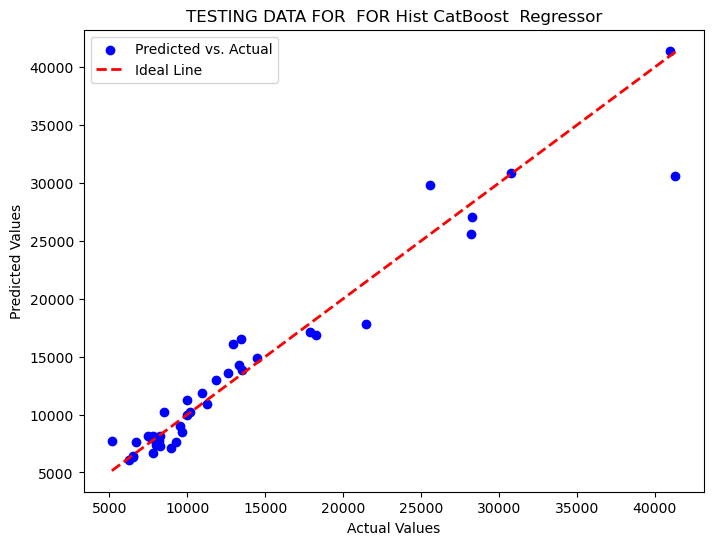

In [68]:
import catboost
from catboost import CatBoostRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=standard.fit_transform(x_train) 
x_test=standard.transform(x_test)
model = CatBoostRegressor(iterations=10000,  # Number of boosting iterations
                         learning_rate=0.1,  # Step size shrinking to prevent overfitting
                         depth=9,  # Depth of the decision tree
                         loss_function='RMSE')  # Regression loss function

model.fit(x_train, y_train)


y_pred = model.predict(x_test)
score=model.score(x_test,y_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist CatBoost  Regressor")
plt.legend()
score

Catboost did the very good job with 93% accuracy score/r2 score

(-0.5, 3839.5, 2159.5, -0.5)

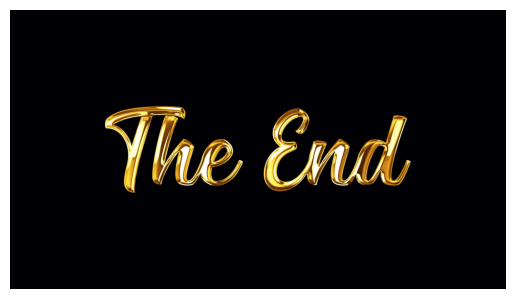

In [69]:
a=plt.imread("loop-light-glowing-effect-free-video.jpeg")
plt.imshow(a)
plt.axis('off')